# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

 Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`. Путь к файлу: `/datasets/real_estate_data.csv` и в качестве разделителя используется знак табуляции `\t`

In [1]:
# импорт библиотеки pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Выведим первые 20 строчек датафрейма `df` на экран.

In [3]:
# получение первых 20 cтрок таблицы df
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Согласно документации к данным мы имеем 22 столбцов:**
- *`airports_nearest`* — расстояние до ближайшего аэропорта в метрах (м)
- *`balcony`* — число балконов
- *`ceiling_height`* — высота потолков (м)
- *`cityCenters_nearest`* — расстояние до центра города (м)
- *`days_exposition`* — сколько дней было размещено объявление (от публикации до снятия)
- *`first_day_exposition`* — дата публикации
- *`floor`* — этаж
- *`floors_total`* — всего этажей в доме
- *`is_apartment`* — апартаменты (булев тип)
- *`kitchen_area`* — площадь кухни в квадратных метрах (м²)
- *`last_price`* — цена на момент снятия с публикации
- *`living_area`* — жилая площадь в квадратных метрах (м²)
- *`locality_name`* — название населённого пункта
- *`open_plan`* — свободная планировка (булев тип)
- *`parks_around3000`* — число парков в радиусе 3 км
- *`parks_nearest`* — расстояние до ближайшего парка (м)
- *`ponds_around3000`* — число водоёмов в радиусе 3 км
- *`ponds_nearest`* — расстояние до ближайшего водоёма (м)
- *`rooms`* — число комнат
- *`studio`* — квартира-студия (булев тип)
- *`total_area`* — общая площадь квартиры в квадратных метрах (м²)
- *`total_images`* — число фотографий квартиры в объявлении

Выведим основную информацию о датафрейме с помощью метода `info()`.

In [4]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, мы имее следующие тип данных:
- `bool` - 2 переменные;
- `float` - 14 переменные;
- `int` - 3 переменные;
- `object` - 3 переменные.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В названии `cityCenters_nearest` колонок видно нарушение стиля, а именно строчные буквы сочетаются с прописными.

Построим гистограммы для всех числовых значений

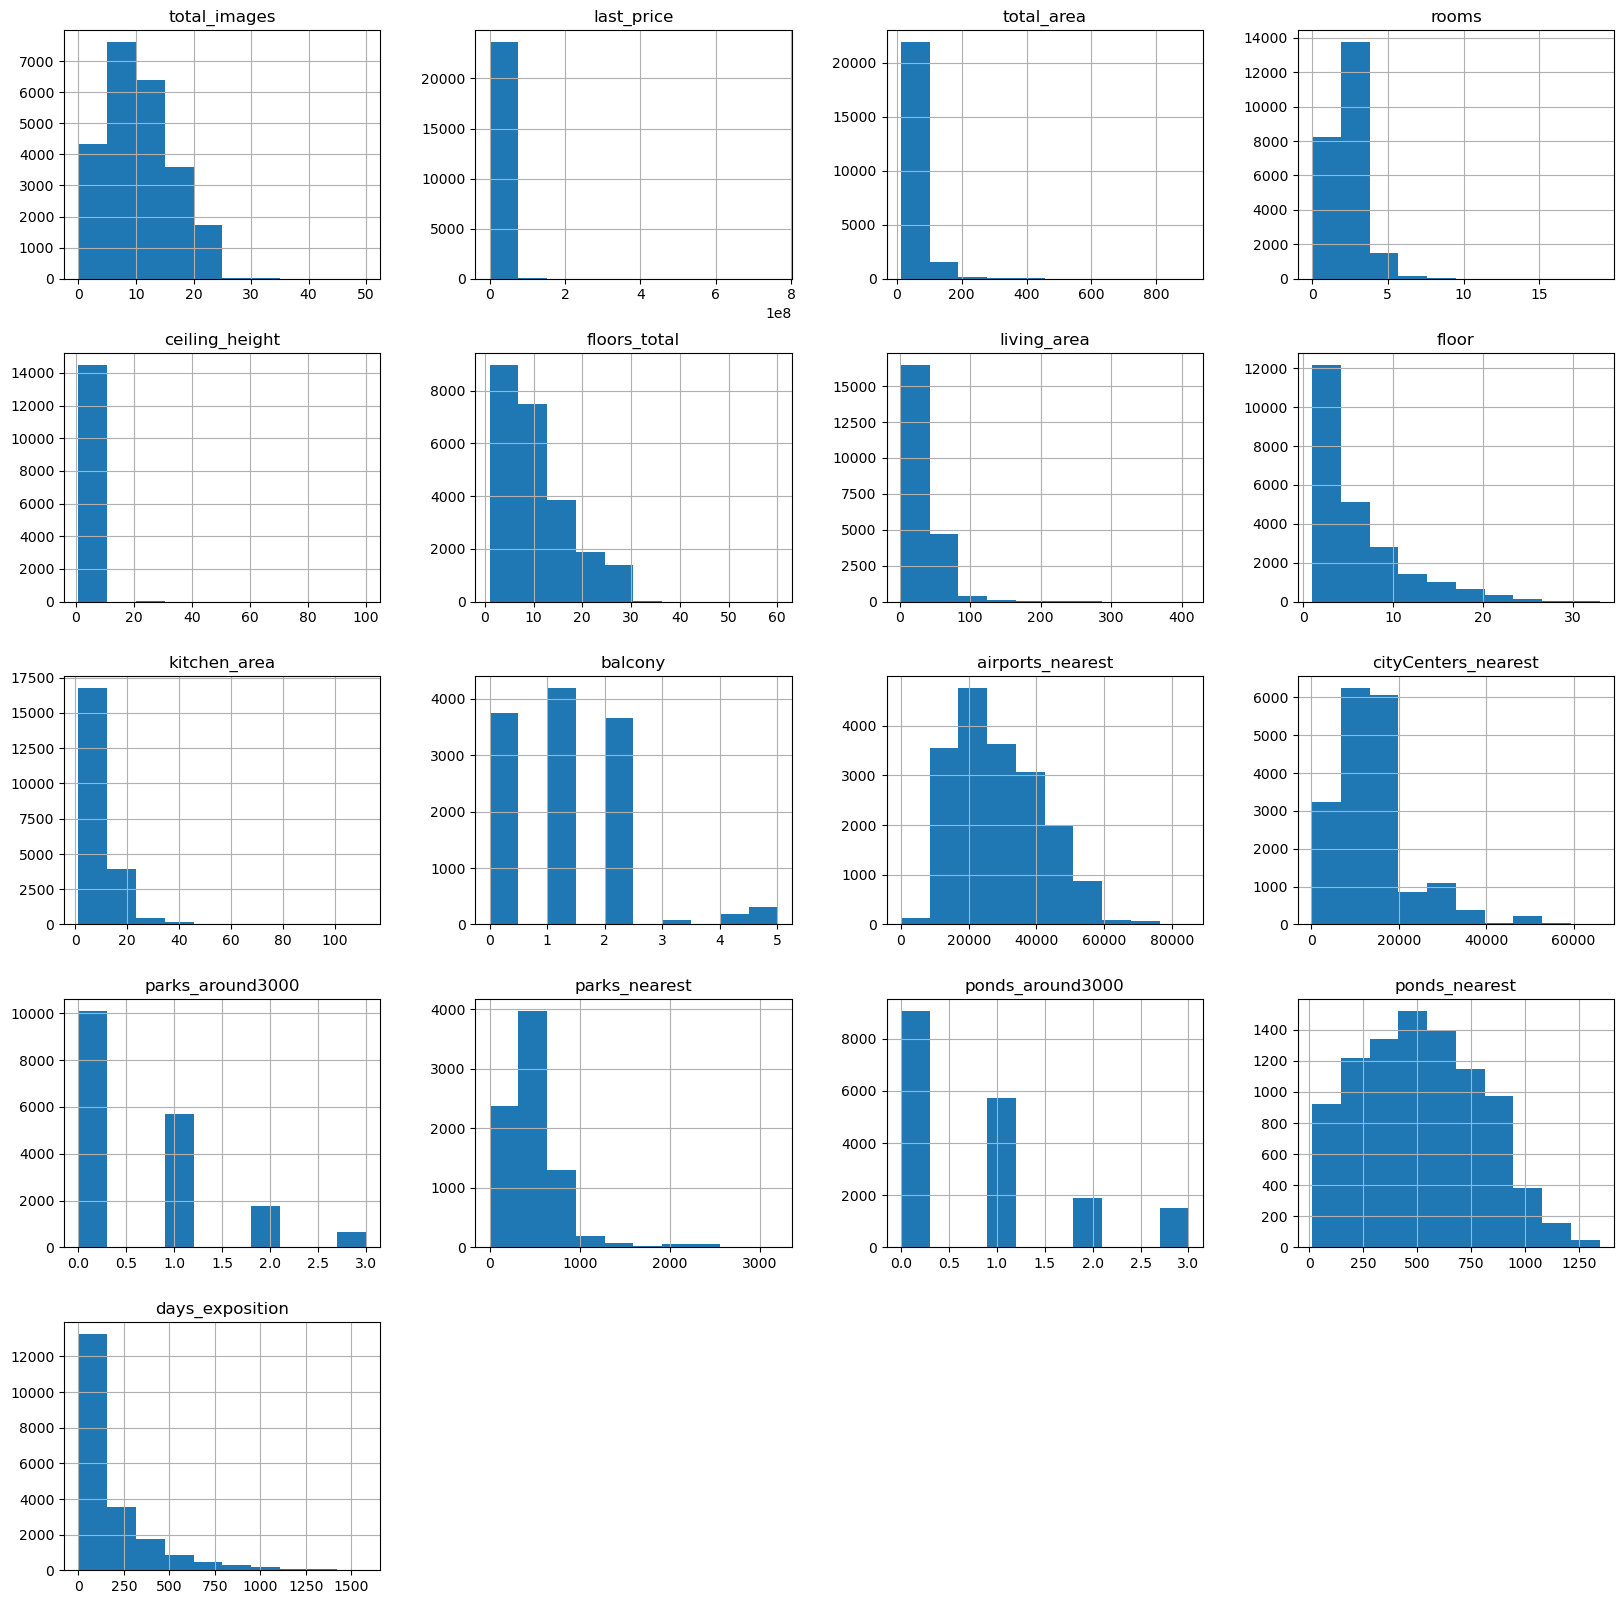

In [5]:
# Построем матрицу гистаграм с размером 20 на 20
df.hist(figsize=(20, 20));

Согласно матрице гистограмм, можно предположить наличие аномальных значнений у данных в `ceiling_height` и `floors_total`, а также редкие значнения, которые могут внести значительные искажения в анализ.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 1:** 

В каждой строке таблицы — данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Часть колонок описывает характеристики саммой невдижимости: площадь, количество комнат и т.д. Часть данных рассказывают о местоположении невдижимости: название населенного пункта, расстояние до аэропорта и т.д. Остальные данные описывают вспомогательные значения: количество этажей, дата первой публикации и т.д.

Предварительно можно утверждать, что данных достаточно для проведения анализа. Но встречаются пропуски в данных и редкие и выбивающиеся значения (аномалии), а в названиях колонок — расхождения с хорошим стилем, а также необходимо изменить у части колонок тип данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

#### Стиль заголовков

Переименуем название столбца cityCenters_nearest согласно "змеиному" стилю

In [6]:
# переименование столбца
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Проверим название всех столбцов

In [7]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Определение и замена пропущенных значений

##### Определение общего количества пропущенных значений

Выведим количество пропущенных значений для каждого столбца.

In [8]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:**
В 14 из 22 столбцов имеются пропущенные значения.
Необходимо просмотреть все столбцы и найти по возможности оптимальные значения для заполнения пропусков.

##### Замена пропущенных значений в столбцах `parks_around300` и `parks_nearest`

Заменим пропущенные значения количество парков на 0, так как пропущенные занчений предполагает их отстутсвие.
Для этого определим все уникальные значения в `parks_around300`:

In [9]:
# Выведем список уникальных значений
df['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Посчитаем количество 0 значений, а пропущенных значений равно 5518

In [10]:
# Посчитаем сумму нулевых значений 
(df['parks_around3000'] == 0).sum()

10106

Посчитаем сумму 0 значений и пропущенных значений

In [11]:
# Посчитаем сумму нулевых и пропущенных значений
(df['parks_around3000'] == 0).sum() + df['parks_around3000'].isna().sum()

15624

Пропущенных значений у `parks_nearest` = 15620, что на 4 меньше чем `parks_around3000`. Определим эти строки, для этого  пропишим условия для индексации:

In [12]:
# Выведем строки в которых нулевые или пропущенные значения в столбце parks_around3000 и не пропущенные значения в parks_nearest
df[((df['parks_around3000'] == 0) | pd.isna(df['parks_around3000'])) & ~pd.isna(df['parks_nearest'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,...,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Как мы видим в этих 4-х объявлениях парки значения `parks_nearest` указаны расстояния больше 3000

Для убедительности еще раз проверм значения `parks_nearest` больше 3000 метров:

In [13]:
# Выведем строки значения которых больше 3000 в parks_nearest
df[df['parks_nearest'] > 3000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,...,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Обнулим значения этих объявлений в столбце `parks_nearest`

In [14]:
# Присвоим нулевые значения в столбце parks_nearest, которых ранее было значение больше 3000 
df.loc[df['parks_nearest'] > 3000, 'parks_nearest'] = 0

Проверим правильность используемого метотода, посчитаем количество строк удовлеторяющие условию `parks_nearest` > 3000:

In [15]:
# Просуммируем строки значения которых больше 3000 в parks_nearest
(df['parks_nearest'] > 3000).sum()

0

Заполним пропущенные значения в столбцах `parks_nearest` и `parks_around3000` на 0

In [16]:
# Заполним пропуски в столбцах parks_nearest нулевыми значениями
df['parks_nearest'] = df['parks_nearest'].fillna(value=0)

# Заполним пропуски в столбцах parks_around3000 нулевыми значениями
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

**Вывод:**
Пропущенные значения вероятнее всего были следствием отсутвия близлижащих парков, либо система которая автоматически вносит данные по количеству и расстоянию до ближайщего парка не имеет общирную базу данных по всем имеющимся паркам.

##### Замена пропущенных значений в столбцах `ponds_around3000` и `ponds_nearest`

In [17]:
# Посчитаем сумму нулевых и пропущенных значений столбца ponds_around3000
(df['ponds_around3000'] == 0).sum() + df['ponds_around3000'].isna().sum()

14589

Пропущенных значений у ponds_nearest = 14589, что аналогично полученным значениям, тем самым смело меняем пропущенные значения в столбцах `ponds_nearest` и `ponds_around3000` на 0:

In [18]:
# Заполним пропуски в столбцах ponds_nearest нулевыми значениями
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=0)

# Заполним пропуски в столбцах ponds_around3000 нулевыми значениями
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

**Вывод:**
Вывод аналогичен выводу по пункту 2.2.2.

##### Замена пропущенных значений в столбцах `floors_total`

Проверим пропущенные значения в стлобце `floors_total`, возможно все пропущенные значения появились, так как помещения являются одноэтажными домами

In [19]:
# Выведем строки которые удовлетворяют уловию, количестов комнат больше 1 и пропущенные значения в столбце floors_total
df[(df['floor'] > 1) & pd.isna(df['floors_total'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,0.0,49.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,0.0,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.50,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,0.0,1.0,853.0,512.0
22656,4,4574160.0,64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,0.0,1.0,374.0,127.0
22808,0,14569263.0,110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,0.0,0.0,0.0,260.0
23590,0,21187872.0,123.30,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,0.0,0.0,0.0,104.0


Предположение не верно, значит заменим пропуски медианным значением, только для каждого этажа по отдельности, чтобы не получилось, что общее количество этажей дома меньше чем этаж помещения указанный в объявлении:

In [20]:
# Созададим датафрейм для будущей проверки
df_floors_nan = df[pd.isna(df['floors_total'])].sort_values(by='floor')

# перебираем каждый этаж в наборе уникальных значений столба floor
for floor in df['floor'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в floor текущий этаж и есть пропуски в floors_total 
    df.loc[(df['floor'] == floor) & (df['floors_total'].isna()), 'floors_total'] = \
    df.loc[(df['floor'] == floor), 'floors_total'].median()
    # и записываем в них медианное значение floors_total среди строк с текущим этажем
# проверяем, что все пропуски заполнены
df['floors_total'].isna().sum()

0

Теперь убедимся, что  количество этажей в доме больше чем этажа в объявлении:

In [21]:
# Цикл по уникальным значениям этажей в строках с пропущенными значениями в 'floors_total'
for floor in df_floors_nan['floor'].unique():
    # Для каждого этажа с пропущенным значением в 'floors_total'
    # Заполненяем пропущенные значения в 'floors_total' средним значением этажей в основном DataFrame
    df_floors_nan.loc[(df_floors_nan['floor'] == floor) & (df_floors_nan['floors_total'].isna()), 'floors_total'] = \
        df.loc[(df['floor'] == floor), 'floors_total'].median()

# Создаем сводную таблицу, отображающую средние значения 'floors_total' для каждого этажа
pivot_table = pd.pivot_table(df_floors_nan, values='floors_total', columns='floor', aggfunc='mean')


**Вывод:**
Закономерности в пропущенных значениях не выявлены, пропущенные значения могли быть возникнуты вследсвии отсутвии заполнения самими владелцами объявлений.

##### Замена пропущенных значений в столбцах `ceiling_height`

Заменим пропущенные значения высота потолков на медианное значение.
Для этого определим все уникальные значения в `ceiling_height`:

In [22]:
# Выведем отсортированный список уникальных значений столбца ceiling_height
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В списке мы видем как аномально малые значения высоты потолков, менее 2.1 метра (согласно ГОСТу) и аномально высокие от 10 и выше, так как в Санкт-Петербурег и Лен.областе имеются множесто построек разных эпох, можно предположить, что высота потолков может иметь достаточно большой разброс по высоте, но явно не больше 10 метров, что больше будет похоже на дворец, и явно не будут опубликованы на сайте продаж квартир. Аномальные значения обработаем чуть позже.

Посчитаем медианное значение и заменим пропуски.

In [23]:
# Посчитаем медианное значение для столбца ceiling_height, удовлетворяющий условию, что значения его больше 2.1 метр
df[(df['ceiling_height'] > 2.1)]['ceiling_height'].median()

2.65

In [24]:
# Заполним пропуски в столбце ceiling_height медианным значением для столбца ceiling_height, удовлетворяющий условию, 
# что значения его больше 2.1 метр
df['ceiling_height'] = df['ceiling_height'].fillna(value=df[(df['ceiling_height'] > 2.1)]['ceiling_height'].median())

**Вывод:**
Для более точного определения значений высоты потолков не хватает данных по году постройки, это бы позволило более гибче заполнить пропущенные значения.

##### Замена пропущенных значений в столбцах `balcony`

In [25]:
# Выведем отсортированный список уникальных значений столбца balcony
df['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Пропущенных значений состовляет чуть менее 50%, это достаточно большое количство и замена пропущенных значений может привести к искаженным результатам. Но в свою очередь, можно предположить, что отсутсвие значений предполагает, что собственник объявления не указал их в виду их отсутвия. Выберим второе предположение и заполним пропущенные значения 0.

In [26]:
# Заполним пропуски в столбце balcony нулевыми значениями
df['balcony'] = df['balcony'].fillna(value=0)

**Вывод:**
При разведеочном анализе данных, нужно будет аккуратно подходить к выводам сделанным на основе данных учитывающих наличие балконов, так как чуть менее 50% данных остутсвовали и замена их 0 значениями может приветси к неправельным выводам.

##### Замена пропущенных значений в столбцах `is_apartment`

Посмотрим уникальные занчения

In [27]:
# Определим количество уникальных значений столбца is_apartment
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Для дальнейшего анализа по выбора метода заполнения пропущенных значений посчитаем количество каждого уникального значения.

In [28]:
# Определим количесвто значений для True и False столбца is_apartment
df['is_apartment'].value_counts().reset_index()

,is_apartment,count
0,False,2725
1,True,50


Проанализируем объявления в которых указан тип помещения как апартаменты:

In [29]:
# Выведем первые 10 строк в которых is_apartment равен True
df[df['is_apartment'] == True].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,0.0,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,2.65,6.0,58.30,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,2.65,9.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,0.0,0.0,0.0,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,0.0,0.0,0.0,0.0,7.0
2975,9,4931398.0,42.9,2018-07-23T00:00:00,1,3.15,4.0,20.39,3,True,...,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,0.0,1.0,792.0,273.0
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7.0,45.00,7,True,...,25.00,2.0,Выборг,NaN,NaN,0.0,0.0,0.0,0.0,96.0
3816,4,4779000.0,53.1,2016-05-16T00:00:00,1,2.65,13.0,19.80,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,0.0,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20T00:00:00,1,3.00,11.0,17.00,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,0.0,0.0,0.0,NaN
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


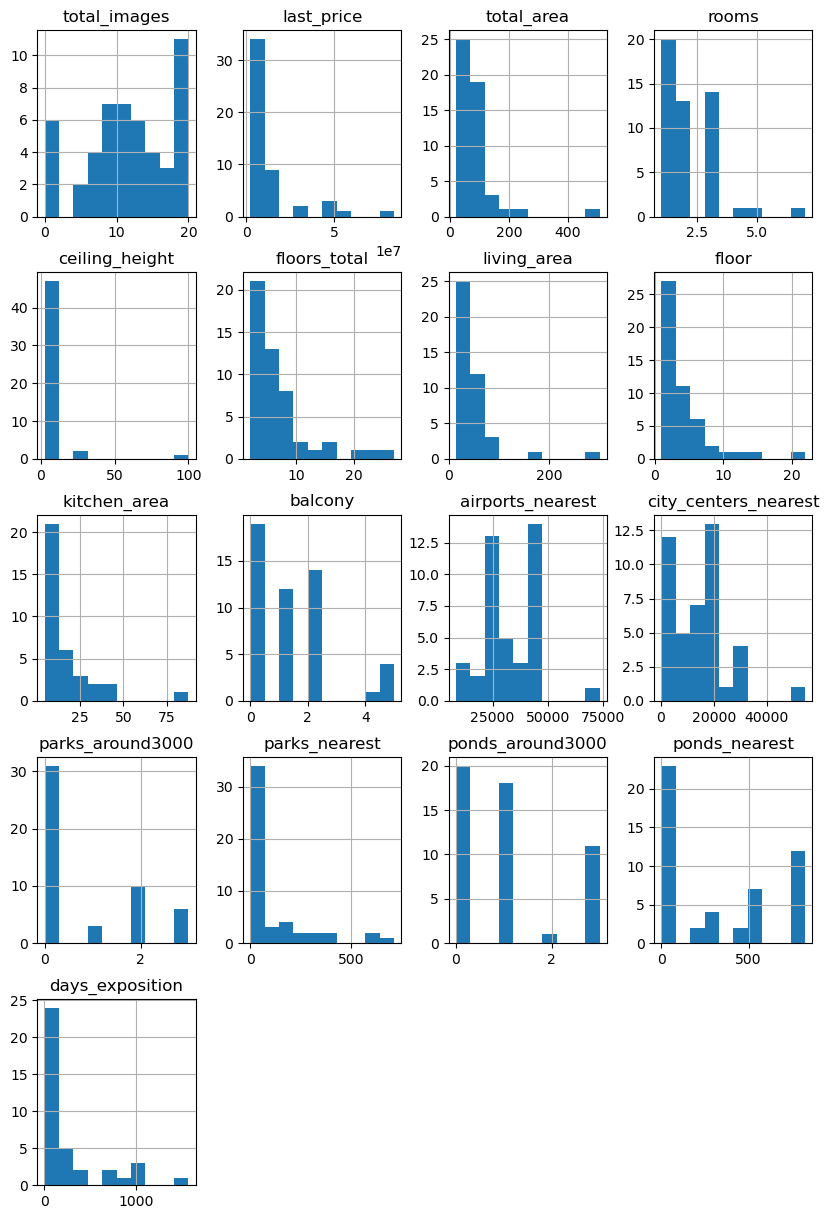

In [30]:
# Построим гистограмму по каждому и столбцов где указана апартаменты
df[df['is_apartment'] == True].hist(figsize=(10, 15));

Явной зависимости от других параметров не определено, следовательно самым верным решением стоит заменить все пропущенные значения False:

In [31]:
# Заполним пропуски в столбце is_apartment нулевыми значениями
df['is_apartment'] = df['is_apartment'].fillna(value=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17312\3651556398.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(value=False)


**Вывод:**
Ввиду изначально маленькой выборкой, где тип помещения является апаратментами, было целесообразно изменить все пропущенные значения на False

##### Замена пропущенных значений в столбцах `kitchen_area`

Посчитаем для начала, сколько пропущенных значений площади кухни и жилой площади вместе имеет датафрейме

In [32]:
# Посчитаем количество строк удовлетворяющие условию, что в столбцах living_area и kitchen_area пропущены значения
len(df[((pd.isna(df['living_area'])) & pd.isna(df['kitchen_area']))])

1464

У 1464 объявлений отсутствуют значения в площади кухни и жилой площади 

Посмотрим как изменяется среднее значение площади кухни от количества комнат

In [33]:
# Построим сводную таблицу по среднему значению площади кухни от количества комнат
df.pivot_table(columns='rooms', values=['kitchen_area', 'total_area'])

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
kitchen_area,NaN,9.550118,9.979584,11.30858,13.664033,18.367649,21.048763,21.998077,24.866667,25.071429,22.866667,12.6,112.0,21.25,100.0,13.0,27.6
total_area,29.279746,37.644669,55.855089,77.76458,107.610763,161.474816,201.537619,265.325424,259.233333,305.975000,259.566667,188.9,900.0,304.20,590.0,270.0,374.6


Как можно заметить мощадь меняется в зависимости от количества комнта, но также необходимо учесть какая доля для каждой общей площади занимает кухня, для этого необходимо рассчитать долю от общей площади которая занимает кухня с учетом жилой площади для каждой, а также ввиду наличия пропущенных значений в площади кухни, где количество комнат равна 0, можно предположить отсутвие там кухни. Следовательно заменим в этих данных площадь кухни на 0. 

In [34]:
# Проверим наше утверждение
# Создание условия сравнения для всех строк, где 'rooms' равно 0 и 'kitchen_area' пропущено
# Проверка с помощью метода all(), что оба условия истинны для всех строк
(((df['rooms'] == 0) & (pd.isna(df['kitchen_area']))) == (df['rooms'] == 0)).all()

True

In [35]:
# Заполнение пропущенных значений в 'kitchen_area' нулями для всех строк, где 'rooms' равно 0
df.loc[df['rooms'] == 0, 'kitchen_area'] = df.loc[df['rooms'] == 0, 'kitchen_area'].fillna(value=0)

# Посчитаем количество оставшихся пропусков
df['kitchen_area'].isna().sum()

2081

Прежде чем заполнить оставшиеся пропуски необходимо заменить пропуски в `living_area`

##### Замена пропущенных значений в столбцах `living_area`

Так как ранее мы определили, что у нас есть строки где пропущенные и `living_area` и `kitchen_area`, и есть строки где пропущены только `living_area`. Посчитаем для последнее случая количество таких строк. И заменим в них значения средним значение на основании доли от общей площади в зависимости от количества комнта и наличием балконов. 

In [36]:
# Вычислим разницу между количеством строк с пропущенными значениями 'living_area' 
# и количеством строк, где 'living_area' и 'kitchen_area' одновременно пропущены
len(df[(pd.isna(df['living_area']))]) - len(df[((pd.isna(df['living_area'])) & pd.isna(df['kitchen_area']))])

453

In [37]:
# Подсчет доли среднего значения жилой площади c учетом площади кухни
mean_ratios = ((df.groupby(['rooms', 'balcony'])['living_area'].mean() + df.groupby(['rooms', 'balcony'])['kitchen_area'].mean())\
               / df.groupby(['rooms', 'balcony'])['total_area'].mean()).reset_index()

# Заполнение пропущенных значений 'living_area' на основе общей площади, площади кухни, количества комнат и балконов
for index, row in mean_ratios.iterrows():
    rooms, balcony = row['rooms'], row['balcony']
    
    # Создание маски для строк, где 'rooms' и 'balcony' соответствуют текущей итерации, а 'living_area' пропущено
    mask = (df['rooms'] == rooms) & (df['balcony'] == balcony) & pd.isna(df['living_area'])
    
    # Заполнение пропущенных значений в 'living_area' с использованием расчетной доли
    df.loc[mask, 'living_area'] = (df.loc[mask, 'total_area'] - df.loc[mask, 'kitchen_area']) * row[0] 


Заменим средним значение на основании доли от общей площади в зависимости от количества комнта и наличием балконов, где не известна площадь кухни.

In [38]:
# Подсчет доли среднего значения жилой площади
mean_ratios = (df.groupby(['rooms', 'balcony'])['living_area'].mean()\
               / df.groupby(['rooms', 'balcony'])['total_area'].mean()).reset_index()

# Заполнение пропущенных значений 'living_area' только для строк с пропущенными значениями 'kitchen_area'
for index, row in mean_ratios.iterrows():
    rooms, balcony = row['rooms'], row['balcony']  
    
    # Создание маски для строк, где 'rooms' и 'balcony' соответствуют текущей итерации, а 'kitchen_area' пропущено
    mask = (df['rooms'] == rooms) & (df['balcony'] == balcony) & pd.isna(df['kitchen_area'])
    
    # Заполнение пропущенных значений в 'living_area' с использованием расчетной доли
    df.loc[mask, 'living_area'] = df.loc[mask, 'total_area']  * row[0] 


Проверим количество пропущенных значений:

In [39]:
# Посчитаем сумму пропущенных значений в столбце living_area
df['living_area'].isna().sum()

0

**Вывод:** Пропущенные значения в жилой площади появились в большинство случаях вместе пропущенными значениями в площади кухни, это может быть обусловлено тем, что владельцы объявлений не имеют данных о этих площадях, так как скорее всего не являются владельцами данных помещений. Например *риэлторы*.

##### Замена пропущенных значений в столбцах `kitchen_area` (продолжение)

Заполним оставшиеся пропуски.

In [40]:
# Подсчет доли среднего значения жилой площади c учетом площади кухни
mean_ratios = ((df.groupby(['rooms', 'balcony'])['living_area'].mean() + df.groupby(['rooms', 'balcony'])['kitchen_area'].mean())\
               / df.groupby(['rooms', 'balcony'])['total_area'].mean()).reset_index()

# Заполнение пропущенных значений 'living_area' на основе общей площади, площади кухни, количества комнат и балконов
for index, row in mean_ratios.iterrows():
    rooms, balcony = row['rooms'], row['balcony']
    mask = (df['rooms'] == rooms) & (df['balcony'] == balcony) & pd.isna(df['kitchen_area'])
    df.loc[mask, 'kitchen_area'] = (df.loc[mask, 'total_area'] - df.loc[mask, 'living_area']) * row[0] 


Посчитаем количество пропущенных знаений

In [41]:
# Посчитаем сумму пропущенных значений в столбце kitchen_area
df['kitchen_area'].isna().sum()

1

Определим объявление с пропущенным значением

In [42]:
# Выведем строки удовлетворяющие условию, что в столбце kitchen_area пропущены значения
df[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.65,10.0,250.0,10,False,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Проверим при потсчете среднее `mean_ratios` возможно не определилось среднее для `rooms==7` и `balcony==2`

In [43]:
# Сделаем срез mean_ratios с помощью метода query(), с условием, 
# где 'rooms' находится в интервале от 6 до 8, а 'balcony' в интервале от 1 до 3
mean_ratios.query('(6 <= rooms <= 8) & (1 <= balcony <= 3)')

,rooms,balcony,0
34,6,1.0,0.738320
35,6,2.0,0.774443
37,7,1.0,0.713400
38,7,2.0,NaN
39,7,3.0,0.804739


Так и есть. Посчитаем для него среднее путем вычисления среднего между соседними средними. И вставим пропущенное значение

In [44]:
# Заполненим пропущенные значения в 'kitchen_area' на основе расчетной доли и значений 'total_area' и 'living_area'
df['kitchen_area'] = df['kitchen_area'].fillna(value=(df['total_area'] - df['living_area'])\
                                               * (mean_ratios.loc[37, 0] + mean_ratios.loc[39, 0]) / 2) # Нахождение среднего

Проверим объявление:

In [45]:
# Выведем строку из DataFrame с индексом 12971
df.loc[12971]

total_images                             19
last_price                      763000000.0
total_area                            400.0
first_day_exposition    2017-09-30T00:00:00
rooms                                     7
ceiling_height                         2.65
floors_total                           10.0
living_area                           250.0
floor                                    10
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                     113.860434
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                    25108.0
city_centers_nearest                 3956.0
parks_around3000                        1.0
parks_nearest                         530.0
ponds_around3000                        3.0
ponds_nearest                         756.0
days_exposition                        33.0
Name: 12971, dtype: object

Еще раз проверим пропущенные значения

In [46]:
# Посчитаем сумму пропущенных значений в столбце kitchen_area
df['kitchen_area'].isna().sum()

0

**Вывод:** Вывод аналогичен предыдущему.

##### Замена пропущенных значений в столбцах `locality_name`

In [47]:
# Посчитаем сумму пропущенных значений в столбце locality_name
df['locality_name'].isna().sum()

49

In [48]:
#df.drop(df[df['locality_name'].isna()].index, inplace=True) # Удалили 49 строк

Можно сделать предположение, что пропущенные значения можно заменить на аналогичные при совпадении ряда условий, а имено, что в объявлении есть аналогичные дома в которых также продаются помещения, то есть расстояние до центра города и этажность, могут однозначно говорить, что квартиры находятся в одном доме, следовательно и в одном населеном пункте.

In [49]:
def completion_fill_column(column, condition_1, condition_2, condition_3, condition_4):
# Цикл по каждой строке с пропущенным значением в 'locality_name'
    for index, row in df[df[column].isna()].iterrows():
        # Созданем условия для фильтрации строк по совпадению 'city_centers_nearest' и 'floors_total'
        condition = (df[condition_1] == row[condition_1]) & (df[condition_2] == row[condition_2]) &\
        (df[condition_3] == row[condition_3])
    
        # Созданием DataFrame, содержащего строки, соответствующие условию
        matching_rows = df[condition]
    
        # Проверка, есть ли соответствующие строки
        if not matching_rows.empty:
            # Извлечение первой строки из DataFrame с соответствующими строками
            matching_row = matching_rows.iloc[0]
        
            # Присвоениваем значению в 'locality_name' значения из соответствующей строки
            df.at[index, column] = matching_row[column]
        else:
            # Обработка ситуации, когда нет соответствий
            pass

# Вызовем функцию для условий совпадения значений в столбцах city_centers_nearest и floors_total
completion_fill_column('locality_name', 'city_centers_nearest', 'floors_total', 'floors_total', 'floors_total')        
        
# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

44

Аналогично предыдущему шагу заполним данные при совпадении расстояния до центра города

In [50]:
# Вызовем функцию для условий совпадения значений в столбцах city_centers_nearest 
completion_fill_column('locality_name', 'city_centers_nearest', 'city_centers_nearest', 'city_centers_nearest', 'city_centers_nearest')

# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

31

Аналогично предыдущему шагу заполним данные при совпадении расстояния до аэропорта и этажность дома

In [51]:
# Вызовем функцию для условий совпадения значений в столбцах airports_nearest и floors_total 
completion_fill_column('locality_name', 'airports_nearest', 'floors_total', 'floors_total', 'floors_total')

# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

30

Аналогично предыдущему шагу заполним данные при совпадении расстояния до парков, их количества и этажность дома

In [52]:
# Вызовем функцию для условий совпадения значений в столбцах parks_nearest, parks_around3000 и floors_total 
completion_fill_column('locality_name', 'parks_nearest', 'parks_around3000', 'floors_total', 'floors_total')

# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

7

Аналогично предыдущему шагу заполним данные при совпадении расстояния до вооемов, их количества и этажность дома

In [53]:
# Вызовем функцию для условий совпадения значений в столбцах ponds_nearest, ponds_around3000 и floors_total 
completion_fill_column('locality_name', 'ponds_nearest', 'ponds_around3000', 'floors_total', 'floors_total')

# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

2

Выведем оставшиеся два объявления

In [54]:
# Выведем строки удовлетворяющие условию, что в столбце locality_name пропущены значения
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7.0,50.938976,6,False,...,24.357467,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
9821,13,8000000.0,94.5,2015-01-21T00:00:00,4,3.00,2.0,57.800000,2,False,...,11.300000,0.0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531.0


Заменим в них пропущенные значения самым встречающимся названием населенного пункта

In [55]:
# Находим самое часто встречающееся значение в столбце 'locality_name' с помощью метода mode()
# Заменяем пропущенные значения в 'locality_name' на самое часто встречающееся значение
df['locality_name'].fillna(value=df['locality_name'].mode().iloc[0], inplace=True)

# Проверим остаток пропущенных значений
df['locality_name'].isna().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17312\130627999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['locality_name'].fillna(value=df['locality_name'].mode().iloc[0], inplace=True)


0

**Вывод:** Можно предположить, что пропущенные значение появились в следствии того, что владельцы объявлений не указали геолокацию своей недвижимости на сайте объявлений. Но также нельзя исключать, что данные таких объявлений могли случайным образом попасть из другой географической области. 

##### Замена пропущенных значений в столбцах `airports_nearest`

Для начала выведем топ-20 населенных пунктов по количеству объявлений

In [56]:
df['locality_name'].value_counts().reset_index().head(20)

,locality_name,count
0,Санкт-Петербург,15757
1,посёлок Мурино,522
2,посёлок Шушары,441
3,Всеволожск,398
4,Пушкин,370
5,Колпино,338
6,посёлок Парголово,327
7,Гатчина,307
8,деревня Кудрово,299
9,Выборг,237


Есть предположение, что все пропущенные значения в `airports_nearest` и `city_centers_nearest` возникли по причине того, что данные помещения находятся вне города Санкт-Петербург. Проверим это утверждение. И для начала посчитаем количество строк где пропущены значения в обоих столбцах. Также необходимо отметить, что в городе Санкт-Петербург имеется только один международный аэропорт "Пулково".

In [57]:
len(df.query('(airports_nearest.isna()) & (city_centers_nearest.isna())'))

5518

Теперь вычислим в скольких из находятся в Санкт-Петербурге.

In [58]:
df.query('(airports_nearest.isna()) & (city_centers_nearest.isna()) & (locality_name == "Санкт-Петербург")').shape[0]

68

Вычеслим одно из другого и получем какое количество удовлетворяет нашему утверждению

In [59]:
len(df.query('(airports_nearest.isna()) & (city_centers_nearest.isna())'))\
- len(df.query('(airports_nearest.isna()) & (city_centers_nearest.isna()) & (locality_name == "Санкт-Петербург")'))

5450

Следовательно для 5450 объявлений с пропущенными значениям в `airports_nearest` можно заменить расстояние до аэропорта на расстояние от населенного пункта до аэропорта данных объявлений. Для этого либо необходимо иметь базу с расстоянием от каждого наслененого пункта Лен. области, либо взять аналогичный параметр из имеющихся объявлений. Используем 2 метод, для этого проверим в скольких объявлениях имеются непропущенные значения в столбце `airports_nearest` и не в Санкт-Петербурге.

In [60]:
# Выберем строки, где 'airports_nearest' не NaN и 'locality_name' не "Санкт-Петербург"
filtered_df = df.query('(~airports_nearest.isna()) & (locality_name != "Санкт-Петербург")')
filtered_df.shape[0]

2492

Создадим словарь, где для каждого уникального значения в `locality_name` присвоим значения из `airports_nearest`. после этого из всех расстояний для каждого уникального значения `locality_name` найдем медианное значение.

In [61]:
# Создадим словарь с медианными значениями 'airports_nearest' для каждого уникального значения 'locality_name'
median_airports_dict = filtered_df.groupby('locality_name')['airports_nearest'].median().to_dict()

# Теперь в словаре median_airports_dict содержатся медианные значения 'airports_nearest'
# для каждого уникального значения 'locality_name'
median_airports_dict

{'Зеленогорск': 72282.0,
 'Кировск': 20234.0,
 'Колпино': 26232.0,
 'Красное Село': 25715.5,
 'Кронштадт': 67850.0,
 'Ломоносов': 48393.0,
 'Павловск': 20529.5,
 'Петергоф': 39221.5,
 'Пушкин': 15766.0,
 'Сестрорецк': 56692.0,
 'поселок Лисий Нос': 55930.0,
 'поселок Молодцово': 60195.0,
 'поселок Мурино': 51553.0,
 'посёлок Александровская': 12896.5,
 'посёлок Белоостров': 57769.0,
 'посёлок Левашово': 52693.0,
 'посёлок Лисий Нос': 54988.5,
 'посёлок Металлострой': 25758.0,
 'посёлок Молодёжное': 84665.0,
 'посёлок Парголово': 53426.0,
 'посёлок Песочный': 54831.5,
 'посёлок Петро-Славянка': 20605.0,
 'посёлок Понтонный': 30642.0,
 'посёлок Репино': 61797.5,
 'посёлок Сапёрный': 34147.5,
 'посёлок Стрельна': 28317.0,
 'посёлок Усть-Ижора': 26510.5,
 'посёлок Шушары': 17425.0,
 'посёлок Щеглово': 61908.0}

Теперь заменим пропущенные значения в `airports_nearest` на значения из `mean_airports_dict` при условии совпадения `locality_name` в основном датасете `df` с ключем в `mean_airports_dict`.

In [62]:
# Условие для фильтрации строк
condition = (df['locality_name'] != "Санкт-Петербург")

# Присваиваем значения с использованием условия
df.loc[condition, 'airports_nearest'] = df.loc[condition, 'airports_nearest']\
.fillna(df.loc[condition, 'locality_name'].map(median_airports_dict))

Теперь заменим пропущенные значения для Санкт-Петербурга, аналогичным путем как делали для столбца `locality_name`

In [63]:
completion_fill_column('airports_nearest', 'locality_name', 'ponds_around3000', 'parks_nearest', 'floors_total')

Посчитаем количесвто пропущенных значений 

In [64]:
df['airports_nearest'].isna().sum()

5312

Для этого количесва объявлений придется оставить пропущенные пропущеные значения.

**Вывод:** Можно предположить, что пропущенные значение в большинстве случаях появились в следствии того, что автоматический алгоритм не смог определить метоположение объекта вне города Санкт-Петербург, тем самым не вписал данные в столбец `airports_nearest`. 

##### Замена пропущенных значений в столбцах `city_centers_nearest`

In [65]:
# Посчитаем сумму пропущенных значений в столбце city_centers_nearest
df['city_centers_nearest'].isna().sum()

5519

Посчитаем сколько пропущенных значений для объявлений в Санк-Петербурге

In [66]:
df.query('(city_centers_nearest.isna()) & (locality_name == "Санкт-Петербург")').shape[0]

68

Теперь заменим пропущенные значения для Санкт-Петербурга, аналогичным путем как делали для столбца `locality_name`

In [67]:
completion_fill_column('city_centers_nearest', 'locality_name', 'ponds_around3000', 'parks_nearest', 'floors_total')

Проврим заполнились ли все пропуски в Санкт-Петербурге

In [68]:
df.query('(city_centers_nearest.isna()) & (locality_name == "Санкт-Петербург")').shape[0]

0

Остальные пропуски оставим без изменения, так как они находятся не в самом Санкт-Петербурге, а расстояние до центра населенного пункта крайне мало по сравнению с рассояниями в Санкт-Петербурге.

**Вывод:** Аналогичен предыдущему выводу, а также можгно предположить, что расстояние до центра города были указанны только для городских населенных пунктов. 

##### Замена пропущенных значений в столбцах `days_exposition`

К сожелению заполнить пропуски для данного столбца не представляется возможным, так как либо данные объявления опубликованы и сразу убраны, либо данные объявления еще находятся на сайте объявлений и при выгрузке данных были еще в активном состоянии.

**Вывод:** Замена пропусков не возможно, либо можно заменить на дату выгрузки датасета, что может соответсвовать максимальной дате в столбце `first_day_exposition`.

Выведем количество оставшихся пропусков

In [69]:
# подсчёт пропусков
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5312
city_centers_nearest    5442
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.2:** 

В большинства данных имелись пропуски. Выделим основные причины пропусков:
- Остуствие данных, т.е. те объявления в которых не присуисвуют указанные параметры, такие как `is_apartment` и `balcony`. В большинстве случачая их указывают при подачи объявления и при их наличии.
- Данные, которые не были указаны владельцем объявлении целенаправлено, к ним можно отнести `ceiling_height`, `living_area` и `kitchen_area`.
- Данные, которые не были автоматически заполнены алгоритмом, к ним можно отнести `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest`. 
Часть пропусов невозможно заменить и были оставлены без изменения.
Причина появленя пропусков для каждого столбца были описаны в сответсвущих выводах при заполнении пропусков.

#### Изменение типа данных

Выведем вновь информацию о датасете

In [70]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Заменим в первую очередь данные где указаны расстояния с метров на км и округлим до сотых.

In [71]:
# Выделение столбцов с расстояниями и преобразование из метров в километры
distance_columns = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']
df[distance_columns] = df[distance_columns] / 1000

# Округление значений до сотых
df[distance_columns] = df[distance_columns].round(2)

Заменим тип данных на int в следующих столбцах:
- `balcony`
- `floors_total`
- `parks_around3000`
- `ponds_around3000`

а также и у `rooms`, `floor` с int64 на int32 для экономии памяти

In [72]:
# Заменить пропущенные значения на -1 для столбца days_exposition если понадобиться для перевода его в int
# df[columns_to_convert] = df[columns_to_convert].fillna(-1)

columns_to_convert = ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'total_images', 'rooms', 'floor']
df[columns_to_convert] = df[columns_to_convert].astype(int)

Поменяем тип данных в столбце `first_day_exposition` на datetime

In [73]:
# Преобразование в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Форматирование в нужный вид при необходимости
#df['first_day_exposition'] = df['first_day_exposition'].dt.strftime('%d.%m.%Y')

Переведем данный из `last_price` в миллионы и округлим значение до тысячных

In [74]:
# Переведет данные в миллионы last_price
df['last_price'] = (df['last_price'] / 1000000).round(3)

Округлим занчения в столбцах `living_area`, `kitchen_area` до десятых

In [75]:
# Округление значений до десятых
df[['living_area', 'kitchen_area']] = df[['living_area', 'kitchen_area']].round(1)

In [76]:
# Заменить пропущенные значения на -1 для столбца days_exposition если понадобиться для перевода его в int
#df['days_exposition'] = df['days_exposition'].fillna(-1)
# Применение округления с условием на NaN
#df['days_exposition'] = df['days_exposition'].astype(int)

Выведем вновь данные о датафрейме, чтобы убедиться, что все типы были заменены

In [77]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int32         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int32         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.3:** 

Заменены типы данных на int в следующих столбцах:
- `balcony`
- `floors_total`
- `parks_around3000`
- `ponds_around3000`

так как все эти данные являются количественными пременнымы.

Заменен тип данных в столбце `first_day_exposition` на datetime, потому что там указана дата.

Также для удобства были округлены ряд столбцов а именно:
- `kitchen_area`
- `living_area`
- `parks_nearest`
- `ponds_nearest`
- `airports_nearest`
- `city_centers_nearest`
- `last_price`

#### Обработка дубликатов

Посчитаем количество явных дубликатов

In [78]:
df.duplicated().sum()

0

Явные дубликаты отсутсвуют. Обработаем неявные дубликаты. Наиболее возможное появление неявных дубликатов возможно в названиях населённых пунктов. Выведем все уникальные названия в столбце `locality_name` и отсортируем их. Но для начала выведем количество уникальных значений.

In [79]:
df['locality_name'].nunique()

364

In [80]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Можно заметить что такие названия как "поселок", "посёлок", "городской посёлок", "городской поселок", "поселок городского типа", "посёлок городского типа", являются однотипными названиями и озночают один и тот же населнный пункт, также же как и  "коттеджный поселок" и "коттеджный посёлок"

Заменим "*поселок"*, "посёлок", "городской посёлок", "городской поселок", "поселок городского типа", "посёлок городского типа" на **"поселок"**, а "коттеджный поселок" и "коттеджный посёлок" на **"коттеджный поселок"**

In [81]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции',\
              'поселок станции'], 'поселок', regex=True)
) 

Повторно выведем количество уникальный значений.

In [82]:
df['locality_name'].nunique()

319

Также после замены не явных дубликатов, можно повторить действия в пунпункте 2.2.12, а именно замена пропущенных значений в столбце `airports_nearest`. Для этого выведенем количество пропущенных значений в этом столбце и произведем замену.

In [83]:
# Посчитаем сумму пропущенных значений в столбце airports_nearest
df['airports_nearest'].isna().sum()

5312

In [84]:
# Создадим словарь с медианными значениями 'airports_nearest' для каждого уникального значения 'locality_name'
median_airports = (filtered_df.groupby('locality_name')['airports_nearest'].median() / 1000).round(2)


# Присваиваем значения с использованием условия
condition = df['airports_nearest'].isnull()

# Заполним недостающие значения в 'airports_nearest' на основе 'locality_name'
df.loc[condition, 'airports_nearest'] = df.loc[condition, 'locality_name'].map(median_airports)
median_airports

locality_name
Зеленогорск                72.28
Кировск                    20.23
Колпино                    26.23
Красное Село               25.72
Кронштадт                  67.85
Ломоносов                  48.39
Павловск                   20.53
Петергоф                   39.22
Пушкин                     15.77
Сестрорецк                 56.69
поселок Лисий Нос          55.93
поселок Молодцово          60.20
поселок Мурино             51.55
посёлок Александровская    12.90
посёлок Белоостров         57.77
посёлок Левашово           52.69
посёлок Лисий Нос          54.99
посёлок Металлострой       25.76
посёлок Молодёжное         84.66
посёлок Парголово          53.43
посёлок Песочный           54.83
посёлок Петро-Славянка     20.60
посёлок Понтонный          30.64
посёлок Репино             61.80
посёлок Сапёрный           34.15
посёлок Стрельна           28.32
посёлок Усть-Ижора         26.51
посёлок Шушары             17.42
посёлок Щеглово            61.91
Name: airports_nearest, dtype

Повторно посчитаем количество пропущенных значений

In [85]:
# Посчитаем сумму пропущенных значений в столбце airports_nearest
df['airports_nearest'].isna().sum()

4790

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.4:** 
Устранены неявные дубликаты в названиях населенных пунктов. Основная причина появления дубликатов является то, что к одному и томуже названию насленного пункта могут быть применены разные типы населнных пунктов означающие одно и тоже, а также вечная проблема с выбором написания буквы "ё" в слове. Также после замены дубликатов, были устранены часть пропущенных значений. Для недопущения в дальнешем неявных дубликатов в названии населенных пунктов, необходимо внедрить раскрывающийся список названий населенных пунктов на сайте объявлений.

#### Обработка аномальных и редких значений

Для поиска аномальных значений необходимо построить гистограммы и бохплоты для все столбцов и внимательно проанализировать их на наличие аномлаьных и редких значений.

Для наглядности выведем вновь названия всх столбцов

In [86]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

##### Обработка аномальных и редких значений столбца `total_images`

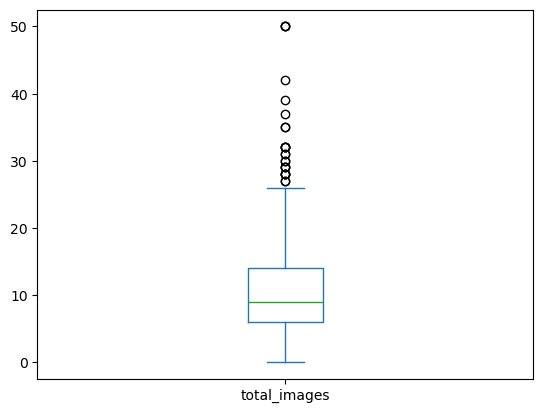

In [87]:
df['total_images'].plot.box();

Используем другие варианты отображения boxplot

In [88]:
# sns.boxplot(y=df['total_images']);

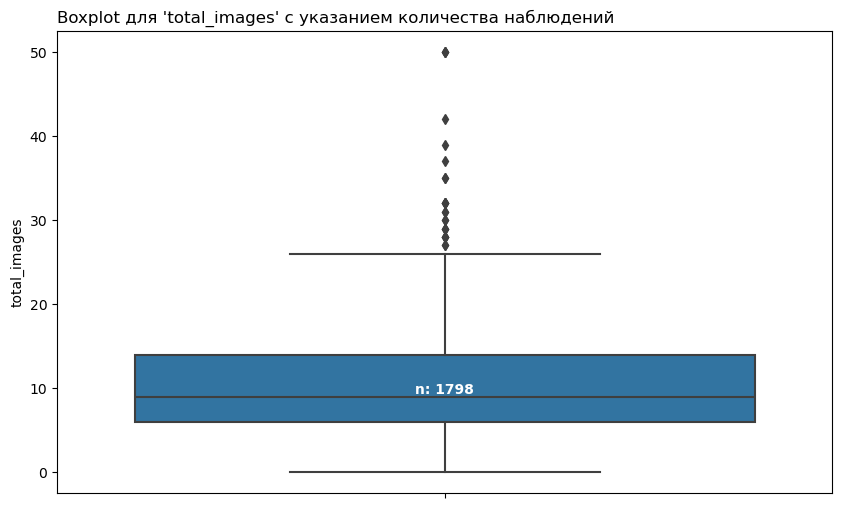

In [89]:
# Начнем с базового boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['total_images'])

# Рассчитаем количество наблюдений (nobs) и медиану для размещения меток
medians = df['total_images'].median()
nobs = df['total_images'].value_counts().reset_index(name='counts')

# Добавим количество наблюдений к графику
pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians + 0.4, f'n: {nobs["counts"].iloc[tick]}', horizontalalignment='center', size='medium', color='w', weight='semibold')

# Добавим заголовок
plt.title("Boxplot для 'total_images' с указанием количества наблюдений", loc="left")

# Покажем график
plt.show()


Другие виды boxplot. Для отображения необходимо раскомментировать код

In [90]:
# boxplot
# ax = sns.boxplot(data=df['total_images'])
# Добавть точки наблюдений
# ax = sns.stripplot(data=df['total_images'], color="orange", jitter=0.2, size=2.5)

# Подпись графика
# plt.title("Boxplot с точками наблюдений", loc="left")
# plt.show()

In [91]:
# Set the style of seaborn
#sns.set(style="whitegrid")

# Create a violin plot with x and y swapped
#plt.figure(figsize=(10, 6))
#sns.violinplot(y=df['total_images'])

# Add title
#plt.title("Violin Plot for 'total_images'", loc="left")

# Show the graph
#plt.show()

In [92]:
df['total_images'].value_counts().sort_index()

total_images
0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: count, dtype: int64

**Вывод**
В столбце `total_images` можно отнести редкие значения от 26 до 50 изображений в объявлении.

##### Обработка аномальных и редких значений столбца `last_price`

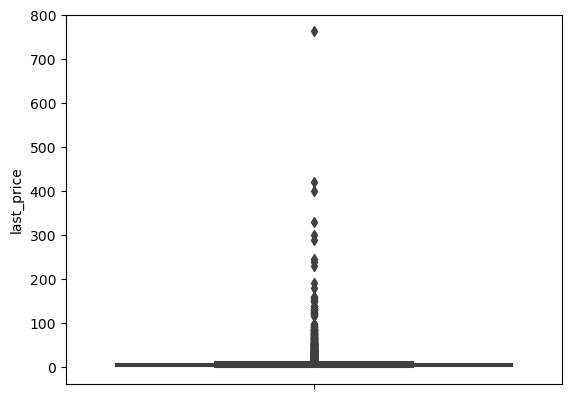

In [93]:
sns.boxplot(y=df['last_price']);

Отобразим boxplot без выбросов

<Axes: ylabel='last_price'>

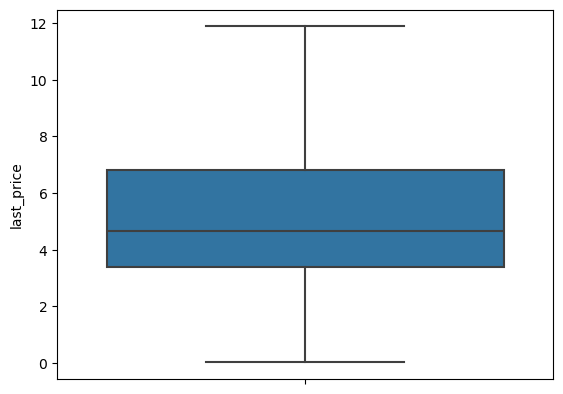

In [94]:
sns.boxplot(y=df['last_price'], showfliers=False)

In [95]:
df['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Удалим значения к которым относятся к выбросам, а именно от суммы больше 120 000 000, но перед этим проверим количество строк в датасете.

In [96]:
df.shape[0]

23699

In [97]:
df.drop(df[df['last_price'] > 120000000].index, inplace=True)
# Проверим оставшиеся строки в DataFrame
df.shape[0]
# Удалили 33 строк

23699

**Вывод**
Самым редким значением в столбце `last_price`  является объявление с суммой продажи в 763 000 000, суммы от 120 000 000 встречаются крайне редко.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int32         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int32         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

##### Обработка аномальных и редких значений столбца `total_area`

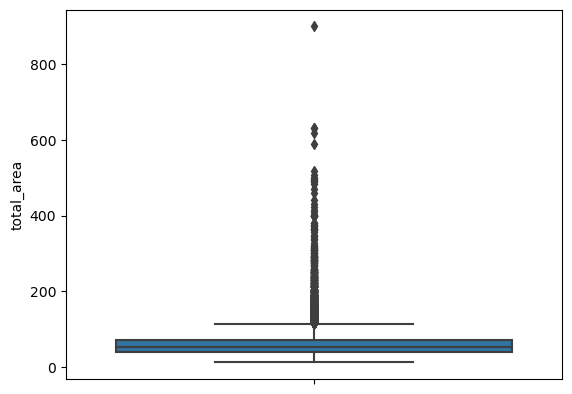

In [99]:
sns.boxplot(y=df['total_area']);

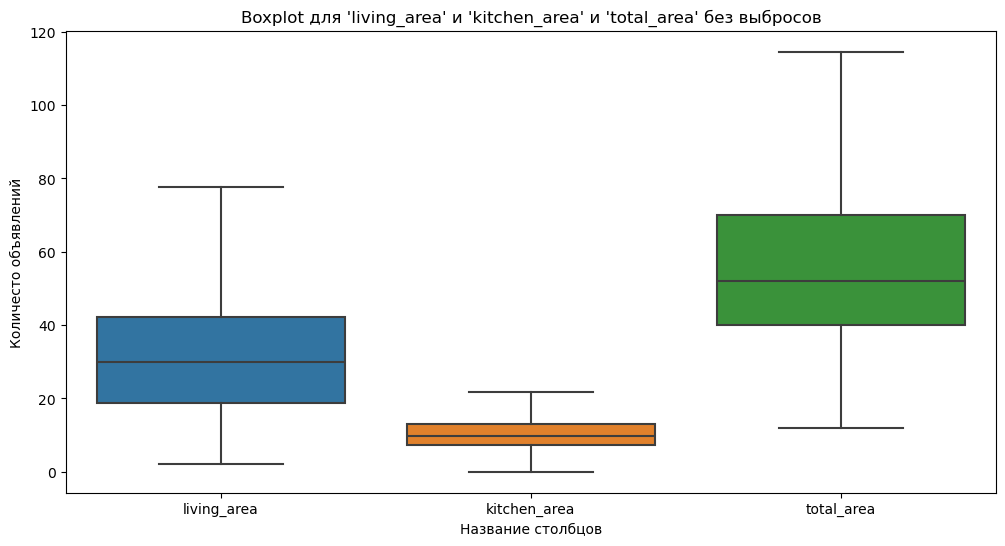

In [100]:
# Преобразуйем DataFrame в длинный формат
df_melted = pd.melt(df[['living_area', 'kitchen_area', 'total_area']])

# Создадим boxplot без выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False) # где showfliers=False не показывать выбросы

# Добавим заголовок и метки
plt.title("Boxplot для 'living_area' и 'kitchen_area' и 'total_area' без выбросов")
plt.xlabel("Название столбцов")
plt.ylabel("Количесто объявлений")

# Показать график
plt.show()

In [101]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Вывод**
К редким значениям в столбце `total_area` можно отнести общая площадь больше чем 200 квадратных метров. Следовательно и в стостолбцах `living_area` и `kitchen_area` будут аномальные значения из этих же объявлений.

##### Обработка аномальных и редких значений столбца `living_area`

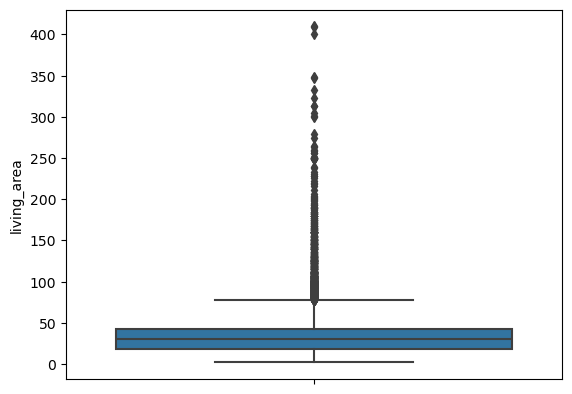

In [102]:
sns.boxplot(y=df['living_area']);

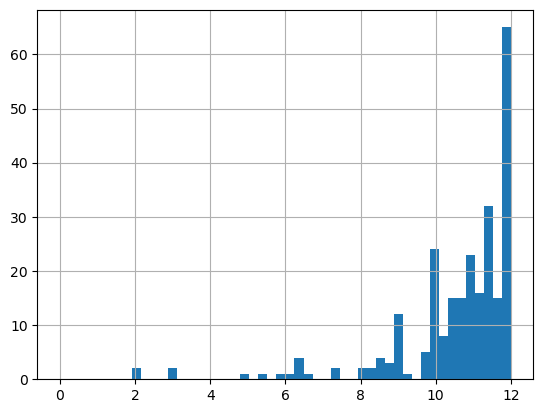

In [103]:
df['living_area'].hist(bins=50, range=(0, 12));

In [104]:
df['living_area'].value_counts().sort_index().head(30)

living_area
2.0      2
3.0      2
5.0      1
5.4      1
5.8      1
6.0      1
6.3      4
6.5      1
7.2      2
8.0      2
8.3      2
8.4      1
8.5      3
8.7      3
8.9      2
9.0      8
9.1      2
9.2      1
9.6      2
9.7      1
9.8      2
9.9      2
10.0    22
10.1     4
10.3     4
10.4     6
10.5     9
10.6    12
10.7     3
10.8     4
Name: count, dtype: int64

In [105]:
df['living_area'].describe()

count    23699.000000
mean        34.589966
std         22.725761
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Удалим строки с данными где жилая площадь меньше 6 метров. ([Согласно минимальным санитарным нормам](https://realty.rbc.ru/news/61fac0869a79471ad5bea0cb))

In [106]:
df.drop(df[df['living_area'] < 6].index, inplace=True)
# Проверим оставшиеся строки в DataFrame
df.shape[0]
# Удалили 7 строк

23692

**Вывод**
К выбросам в столбце `living_area` можно отнести площади больше чем 80 квадратных метров, а к редким значения от 130. Также необходимо отметить, что минимальная жилая площадь по санитарным нормам составляет 6 квадратных метров.

##### Обработка аномальных и редких значений столбца `kitchen_area`

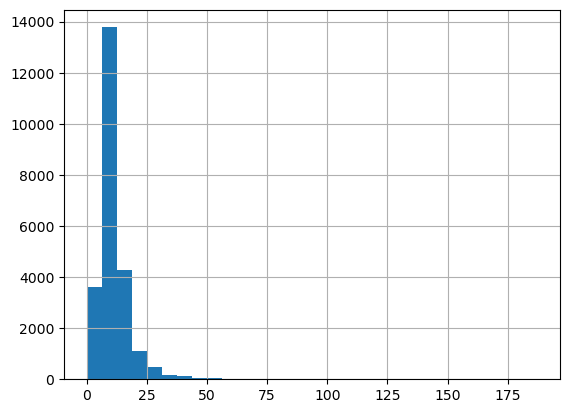

In [107]:
df['kitchen_area'].hist(bins=30);

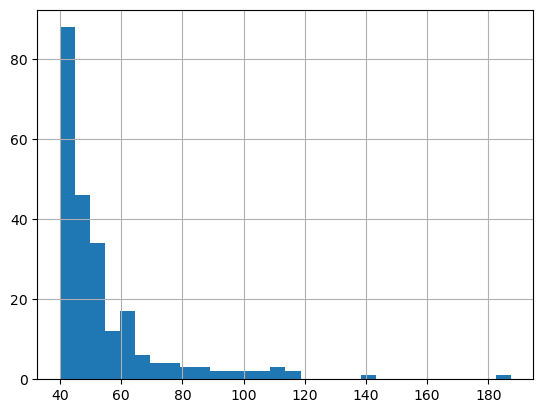

In [108]:
df['kitchen_area'].hist(bins=30, range=(40, df['kitchen_area'].max()));

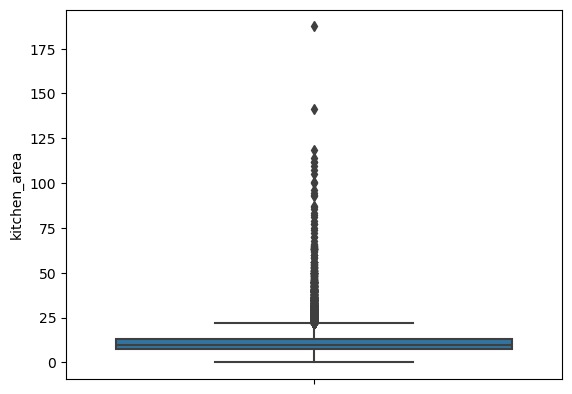

In [109]:
sns.boxplot(y=df['kitchen_area']);

<Axes: ylabel='kitchen_area'>

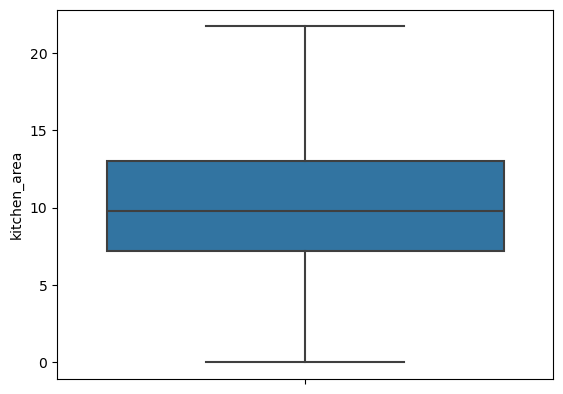

In [110]:
sns.boxplot(y=df['kitchen_area'], showfliers=False)

In [111]:
df['kitchen_area'].describe()

count    23692.000000
mean        11.217673
std          7.012041
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        187.400000
Name: kitchen_area, dtype: float64

**Вывод**
К выбросам в столбце `kitchen_area` можно отнести площади больше чем 25 квадратных метров.

##### Обработка аномальных и редких значений столбца `city_centers_nearest`

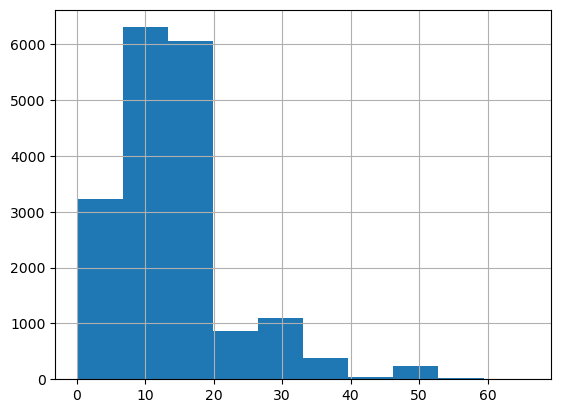

In [112]:
df['city_centers_nearest'].hist();

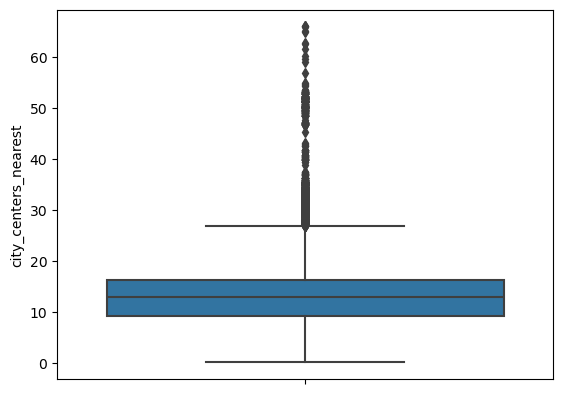

In [113]:
sns.boxplot(y=df['city_centers_nearest']);

In [114]:
df['city_centers_nearest'].describe()

count    18251.000000
mean        14.191393
std          8.603778
min          0.180000
25%          9.260000
50%         13.070000
75%         16.290000
max         65.970000
Name: city_centers_nearest, dtype: float64

In [115]:
df['city_centers_nearest'].value_counts().sort_index()

city_centers_nearest
0.18     1
0.21     1
0.22     1
0.29     2
0.32     8
        ..
64.86    1
65.10    1
65.76    1
65.95    1
65.97    1
Name: count, Length: 2838, dtype: int64

**Вывод**
К выбросам в столбце `city_centers_nearest` можно отнести расстояние больше чем в 28 километров, а к редким значения от 55 километров.

##### Обработка аномальных и редких значений столбца `airports_nearest`

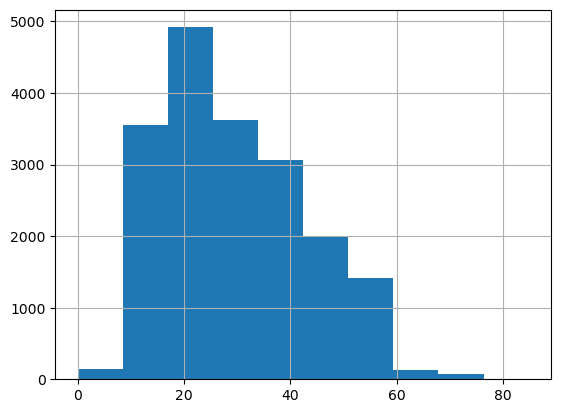

In [116]:
df['airports_nearest'].hist();

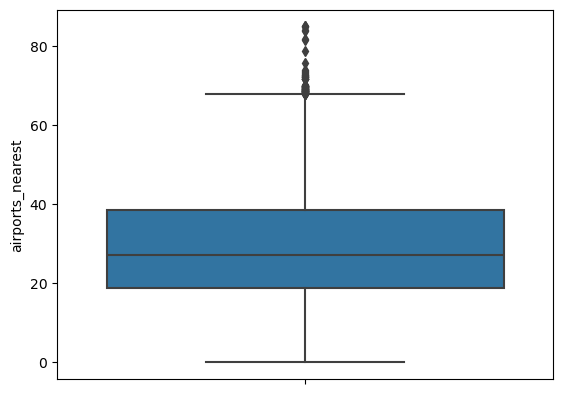

In [117]:
sns.boxplot(y=df['airports_nearest']);

In [118]:
df['airports_nearest'].describe()

count    18902.000000
mean        29.458972
std         13.049441
min          0.000000
25%         18.850000
50%         27.100000
75%         38.440000
max         84.870000
Name: airports_nearest, dtype: float64

Удалим данные где расстояние к аэропорту равно 0 км.

In [119]:
# Удаляем строки в оригинальном DataFrame, для этого используем inplace=True, а index возвращает индексы этих строк. 
df.drop(df[df['airports_nearest'] == 0].index, inplace=True)
# Проверим оставшиеся строки в DataFrame
df.shape[0]
# Удалили 1 строку

23691

In [120]:
df['airports_nearest'].value_counts().sort_index().tail(20)

airports_nearest
71.87    1
72.00    1
72.03    1
72.08    1
72.28    2
72.47    2
72.71    1
73.11    1
73.39    1
73.55    1
73.83    1
75.65    1
78.53    1
81.36    1
81.61    1
83.76    1
84.01    1
84.66    1
84.85    1
84.87    1
Name: count, dtype: int64

**Вывод**
К выбросам в столбце `airports_nearest` можно отнести расстояние больше чем в 70 километров. К аномальному значению относиться расстояние в 0 км.

##### Обработка аномальных и редких значений столбца `locality_name`

In [121]:
df['locality_name'].nunique()

319

In [122]:
df['locality_name'].value_counts().head(200)

locality_name
Санкт-Петербург       15750
поселок Мурино          555
поселок Шушары          441
Всеволожск              398
Пушкин                  370
                      ...  
поселок Зимитицы          3
поселок Ефимовский        3
деревня Заклинье          3
поселок Пушное            2
деревня Фалилеево         2
Name: count, Length: 200, dtype: int64

**Вывод**
К выбросам в столбце `locality_name` можно отнести населенные пункты которые встречаются один раз, а их больше 100.

##### Обработка аномальных и редких значений столбца `first_day_exposition`

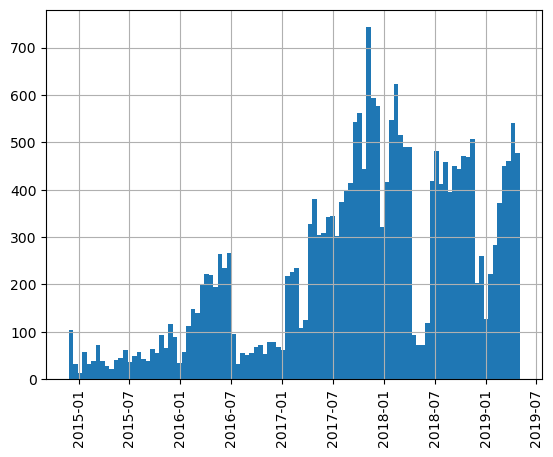

In [123]:
df['first_day_exposition'].hist(bins=100, xrot=90);

**Вывод**
Можно отметить, что в столбце `first_day_exposition` виден период аномально низких продаж, а именно вторая половина 2016 года. Явных признаков в такому резкому падению публикаций объявлений нет. Согласно новостным данным рынок недвижимости в 2016 году был стабильным. Возможная причина такого поведения может быть в самом сервисе подачи объявлений.

##### Обработка аномальных и редких значений столбца `rooms`

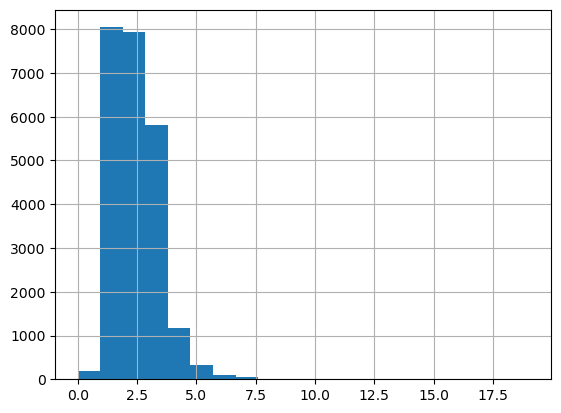

In [124]:
df['rooms'].hist(bins=20);

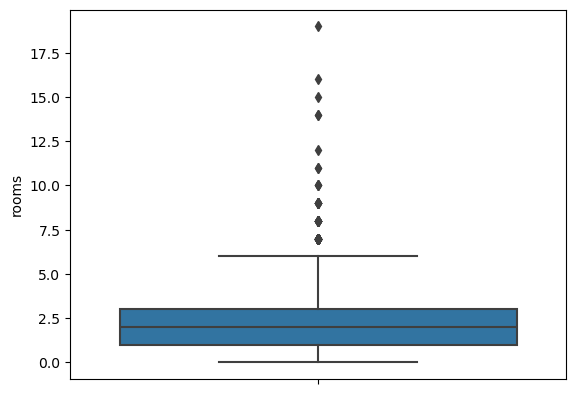

In [125]:
sns.boxplot(y=df['rooms']);

In [126]:
df['rooms'].describe()

count    23691.000000
mean         2.070829
std          1.078262
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [127]:
df['rooms'].value_counts().sort_index()

rooms
0      195
1     8044
2     7939
3     5813
4     1179
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: count, dtype: int64

**Вывод**
К выбросам в столбце `rooms` можно отнести количества комнат больше 7.

##### Обработка аномальных и редких значений столбца `ceiling_height`

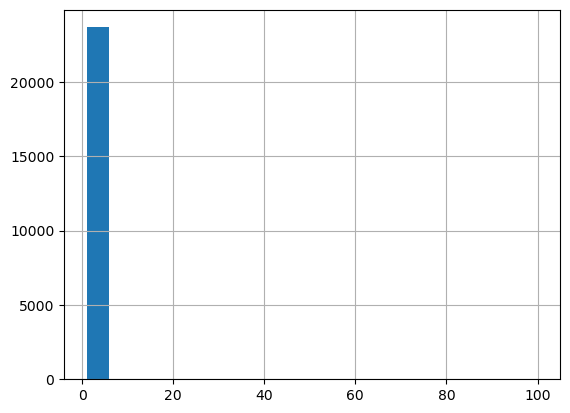

In [128]:
df['ceiling_height'].hist(bins=20);

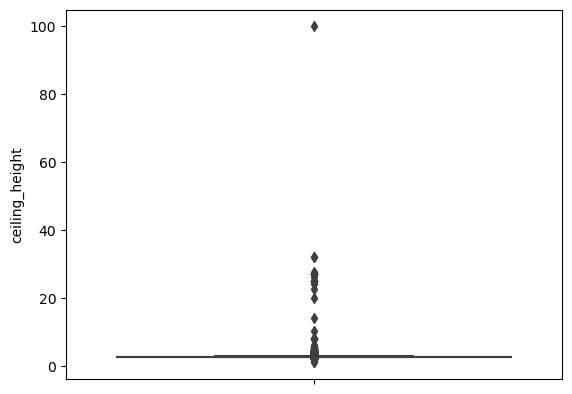

In [129]:
sns.boxplot(y=df['ceiling_height']);

In [130]:
df['ceiling_height'].describe()

count    23691.000000
mean         2.724362
std          0.988460
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [131]:
df['ceiling_height'].value_counts().sort_index()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: count, Length: 183, dtype: int64

Заменим высоту потолков которые выше 20 метров на значения в 10 раз меньше. А потолки меньше 2.1 метр удалим, так как первые послевоенные годы дома строились с высотой потлока 2.1 и более метров. Также согласно открытым данным наибольшая зарегестрирована высота потолков в частных жилых помещениях в Санкт-Петербурге не превышает 9.2 метра. [ссылка](https://www.kommersant.ru/doc/2794990). Следовательно необходимо удалить такие строки.

In [132]:
# Замена высоты потолков более 20 м на значения в 10 раз меньше
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] / 10
df.shape[0]

23691

In [133]:
# Удаляем строки в оригинальном DataFrame, для этого используем inplace=True, а index возвращает индексы этих строк. 
df.drop(df[~((df['ceiling_height'] > 2) & (df['ceiling_height'] < 9.2))].index, inplace=True)
# Проверим оставшиеся строки в DataFrame
df.shape[0]
# Удалили 18 строк

23673

**Вывод**
Удалили 18 строк с данными где были аномальные значения. Также к выбросам в столбце `ceiling_height` можно отнести высоту потолков больше 4 и меньше 2.5 метров.

##### Обработка аномальных и редких значений столбца `floors_total`

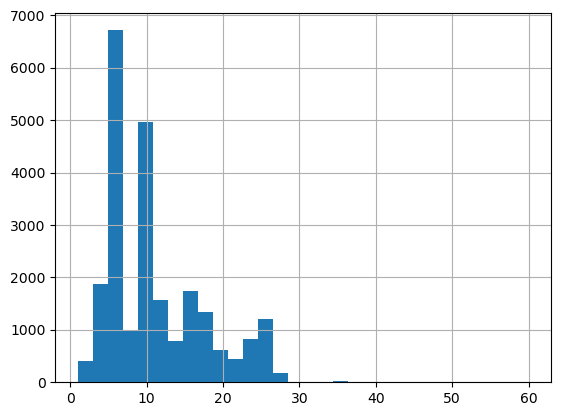

In [134]:
df['floors_total'].hist(bins=30);

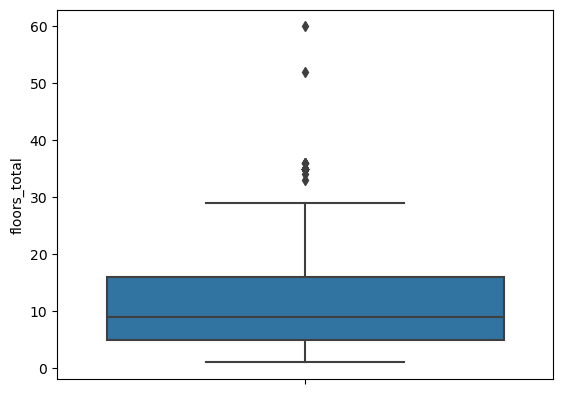

In [135]:
sns.boxplot(y=df['floors_total']);

In [136]:
df['floors_total'].value_counts().sort_index()

floors_total
1       25
2      381
3      668
4     1200
5     5800
6      917
7      592
8      389
9     3767
10    1191
11     203
12    1360
13     229
14     552
15     364
16    1387
17     838
18     504
19     339
20     271
21     158
22     290
23     352
24     473
25    1082
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
52       1
60       1
Name: count, dtype: int64

Удалим объявления где количество этажей в здание больше 37, так как в Санкт-Петербурге и Лен. области наибольшим по количеству жилым домом является 37-этажное здание. [ссылка](https://pikabu.ru/story/zhilyie_doma_peterburga_samyiesamyie_i_prosto_neobyichnyie_5845678).

In [137]:
df.drop(df[df['floors_total'] > 37].index, inplace=True)
# Проверим оставшиеся строки в DataFrame
df.shape[0]
# Удалили 2 строки

23671

**Вывод**
Удалили 2 строки с данными где были аномальные значения. Также к выбросам в столбце `floors_total` можно отнести значение больше 30 этажей.

##### Обработка аномальных и редких значений столбца `floor`

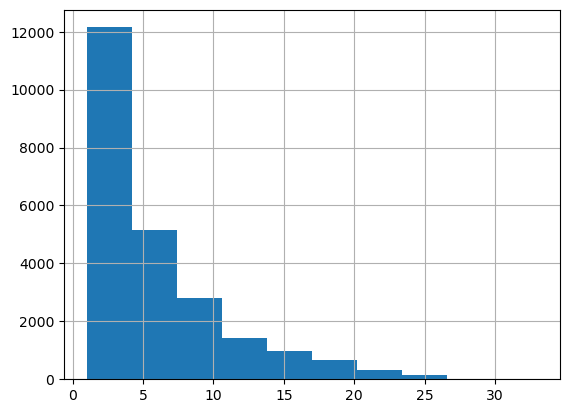

In [138]:
df['floor'].hist();

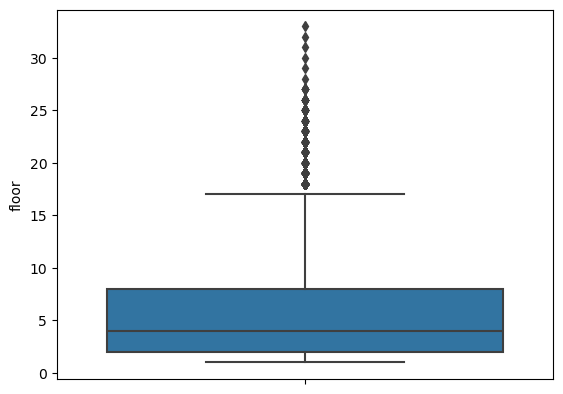

In [139]:
sns.boxplot(y=df['floor']);

In [140]:
df['floor'].value_counts().sort_index()

floor
1     2913
2     3365
3     3072
4     2802
5     2616
6     1304
7     1217
8     1080
9     1049
10     687
11     523
12     525
13     379
14     336
15     342
16     315
17     226
18     177
19     147
20     110
21     125
22     112
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: count, dtype: int64

**Вывод**
К выбросам в столбце `floor` можно отнести значение больше 17 этажей, а крайне редкие значения начинаются от 28.

##### Обработка аномальных и редких значений столбцов `is_apartment`, `studio`, `open_plan`

In [141]:
df['is_apartment'].value_counts().sort_index()

is_apartment
False    23622
True        49
Name: count, dtype: int64

In [142]:
df['studio'].value_counts().sort_index()

studio
False    23524
True       147
Name: count, dtype: int64

In [143]:
df['open_plan'].value_counts().sort_index()

open_plan
False    23604
True        67
Name: count, dtype: int64

**Вывод**
Аномальных значений в столбцах `is_apartment`, `studio`, `open_plan` нет.

##### Обработка аномальных и редких значений столбца `balcony`

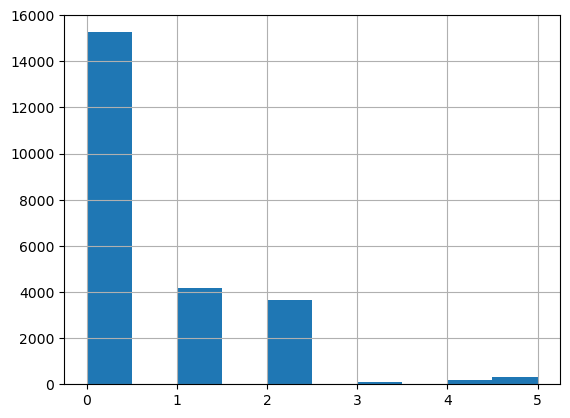

In [144]:
df['balcony'].hist();

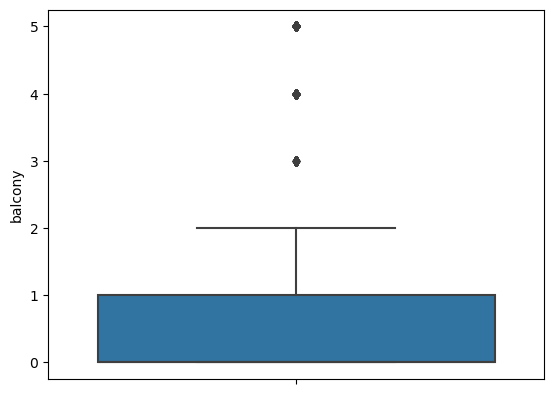

In [145]:
sns.boxplot(y=df['balcony']);

In [146]:
df['balcony'].value_counts().sort_index()

balcony
0    15258
1     4192
2     3655
3       81
4      183
5      302
Name: count, dtype: int64

**Вывод**
К выбросам можно в столбце `balcony` можно отнести значение от 3х и более балконов.

##### Обработка аномальных и редких значений столбца `parks_around3000`

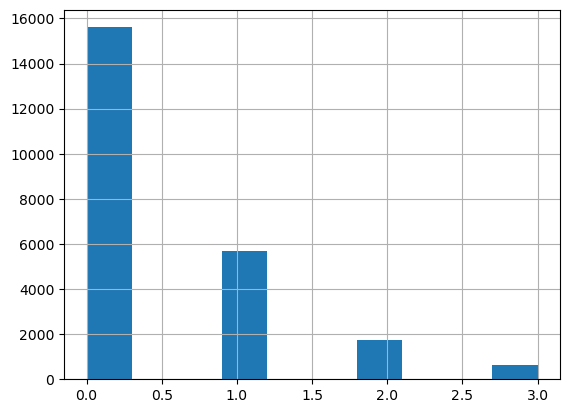

In [147]:
df['parks_around3000'].hist();

In [148]:
df['parks_around3000'].value_counts().sort_index()

parks_around3000
0    15608
1     5672
2     1744
3      647
Name: count, dtype: int64

**Вывод**
Аномальных значений в столбцах `parks_around3000` нет.

##### Обработка аномальных и редких значений столбца `parks_nearest`

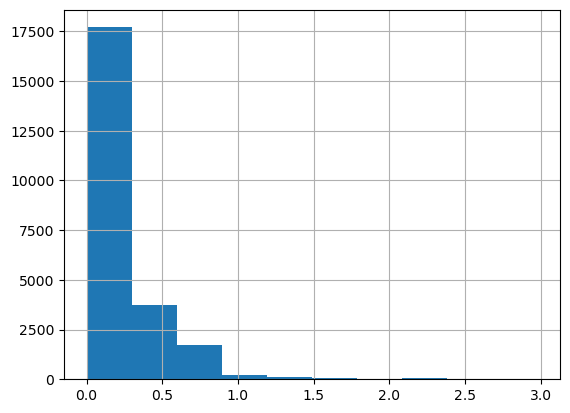

In [149]:
df['parks_nearest'].hist();

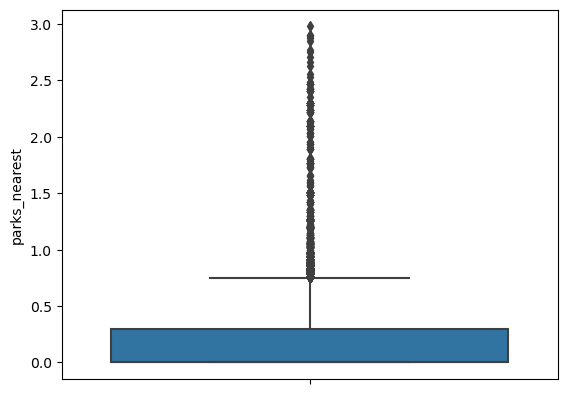

In [150]:
sns.boxplot(y=df['parks_nearest']);

In [151]:
df['parks_nearest'].describe()

count    23671.000000
mean         0.166679
std          0.304296
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max          2.980000
Name: parks_nearest, dtype: float64

In [152]:
df['parks_nearest'].value_counts().sort_index().tail(30)

parks_nearest
1.95     2
2.01     2
2.03     4
2.07     2
2.10    30
2.13     2
2.14     5
2.21     1
2.22     5
2.24     9
2.28    10
2.30    13
2.35     1
2.41     5
2.42     3
2.43     1
2.47     7
2.49     1
2.53     1
2.56     1
2.63     1
2.66     1
2.71     1
2.75     1
2.77     1
2.85     1
2.88     1
2.89     1
2.90     1
2.98     1
Name: count, dtype: int64

**Вывод**
К выбросам в столбце `parks_nearest` можно отнести значение больше 700 меров, а крайне редкие значения начинаются от 2.3 километра. Также нельзя учитывать 0 значения, так как они появились после замены NaN.

##### Обработка аномальных и редких значений столбца `ponds_around3000`

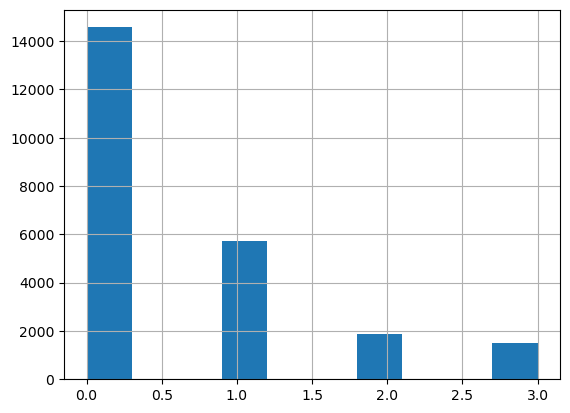

In [153]:
df['ponds_around3000'].hist();

In [154]:
df['ponds_around3000'].value_counts().sort_index()

ponds_around3000
0    14572
1     5713
2     1889
3     1497
Name: count, dtype: int64

**Вывод**
Аномальных значений в столбцах `ponds_around3000` нет.

##### Обработка аномальных и редких значений столбца `ponds_nearest`

<Axes: >

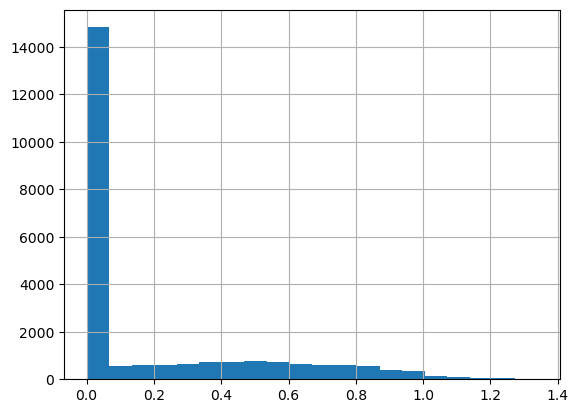

In [155]:
df['ponds_nearest'].hist(bins=20)

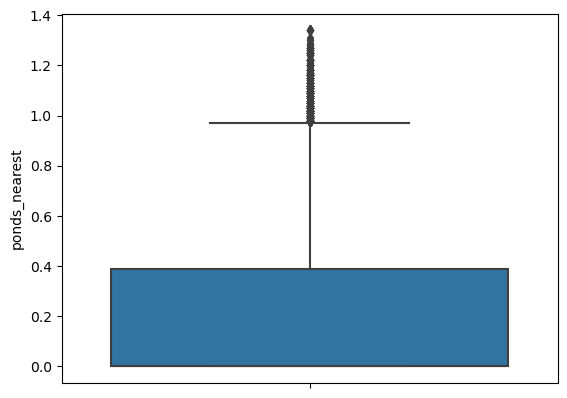

In [156]:
sns.boxplot(y=df['ponds_nearest']);

In [157]:
df['ponds_nearest'].describe()

count    23671.000000
mean         0.199118
std          0.305168
min          0.000000
25%          0.000000
50%          0.000000
75%          0.390000
max          1.340000
Name: ponds_nearest, dtype: float64

In [158]:
df['ponds_nearest'].value_counts().sort_index().tail(20)

ponds_nearest
1.12    13
1.13    16
1.14     3
1.15    10
1.16    22
1.17     5
1.18    16
1.19     1
1.20     9
1.21     1
1.22    13
1.24     4
1.25    12
1.26     3
1.27     6
1.28     2
1.29     1
1.30     1
1.31     1
1.34     4
Name: count, dtype: int64

**Вывод**
К выбросам в столбце `ponds_nearest` можно отнести значение больше 1 километра, а крайне редкие значения начинаются от 1.26 километра. Также нельзя учитывать 0 значения, так как они появились после замены NaN.

##### Обработка аномальных и редких значений столбца `days_exposition`

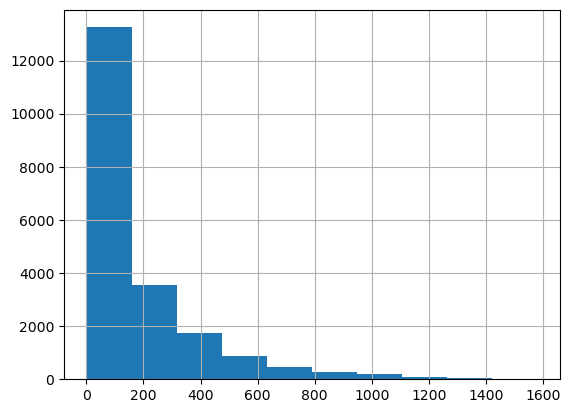

In [159]:
df['days_exposition'].hist();

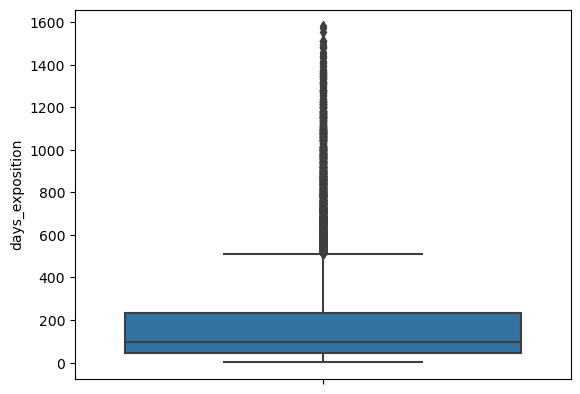

In [160]:
#fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=df['days_exposition']);
# Для приближения выбросов расскоментировать код
#ax.set_ylim(bottom=500, top=520)  

In [161]:
df['days_exposition'].describe()

count    20494.000000
mean       180.959793
std        219.821490
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [162]:
df['days_exposition'].value_counts().sort_index()

days_exposition
1.0         1
2.0         3
3.0       158
4.0       176
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: count, Length: 1141, dtype: int64

**Вывод**
К выбросам в столбце `days_exposition` можно отнести значение больше 510 дней.

##### Удаление крайне  редких значений в датасете

Выведем количество оставшихся строк.

In [163]:
df.shape[0]

23671

Поочередно пройдемся по каждому из столбцов и удалим крайне редкие значения, согласно выводам сделаным в подразделах 2.5 к кажому из столбцов, а после выведем остаток строк в датафрейме 

In [164]:
df.drop(df[df['total_images'] > 26].index, inplace=True) # Удалили 25 строк
df.drop(df[df['total_area'] > 200].index, inplace=True) # Удалили 227 строк
df.drop(df[df['living_area'] > 130].index, inplace=True) # Удалили 17 строк
df.drop(df[df['kitchen_area'] > 60].index, inplace=True) # Удалили 14 строк
df.drop(df[df['city_centers_nearest'] > 55].index, inplace=True) # Удалили 12 строк
df.drop(df[df['airports_nearest'] > 70].index, inplace=True) # Удалили 19 строк
df.drop(df[df['rooms'] > 7].index, inplace=True) # Удалили 3 строк
df.drop(df[df['ceiling_height'] > 5].index, inplace=True) # Удалили 7 строк
df.drop(df[df['floor'] > 28].index, inplace=True) # Удалили 5 строк
df.shape[0]

23342

**Вывод**
После отчиски данных от аномальных и крайне редких значений в самом датасете осталось 23339 строк (удалено было 360 строки, что стотавляет менее 1,5%).

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.5:** 

В большинства данных имеются выбросы. Все аномальные значения, которые встречались в `ceiling_height` и `floors_total` были удалены, либо заменены. Строки, в которых находились крайне редкие значения были удалены, а именно:
- `total_images` > 26
- `total_area` > 200
- `living_area` > 130
- `kitchen_area` > 60
- `city_centers_nearest` > 55
- `airports_nearest` > 70
- `rooms` > 7
- `ceiling_height` > 5
- `floor` > 28

Для дальнейшего исследовательского анализа необъодимо использовать срезы и медианные значения, чтобы не допустить влияние выбросов на результаты, так как удаления все выбросов приведет к значительному сокращению данных в выборке.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2 "ПРЕДОБРАБОТКА ДАННЫХ":** 

В ходе предобработки данных были сделанные следующие действия:
- Изменен стиль заголовка у столбца `city_centers_nearest`
- Определены и замены пропущенных значений во всех столбцах
- Остались пропуски в столбцах days_exposition, city_centers_nearest и airports_nearest в виду невозможности их заменить на рациональные значения
- Для ряда параметров были изменены типы данных
- Были обработаны дубликаты в столбце `locality_name`
- Были отработаны аномальные значения в столбцах `ceiling_height` и `floors_total` и удалены строки с редкими значениями

Причины пропусков были описаны в выводе раздела 2.2. Более подробные выводы по выше указанным действиям описаны в соответсующих выводах к разделам.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление в таблицу: цена одного квадратного метра

In [165]:
# Для рассчета цены за одни квадратный метр, разделим цену на общюю площадь и округлим до сотых
df['price_sqm'] = (df['last_price'] / df['total_area']).round(2)

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18.86,16.03,1,0.48,2,0.76,NaN,0.12
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12.82,18.60,0,0.00,0,0.00,81.0,0.08
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21.74,13.93,1,0.09,2,0.57,558.0,0.09
3,0,64.900,159.0,2015-07-24,3,2.65,14,97.6,9,False,...,0,Санкт-Петербург,28.10,6.80,2,0.08,3,0.23,424.0,0.41
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31.86,8.10,2,0.11,1,0.05,121.0,0.10


#### Добавление в таблицу: день публикации объявления 

In [166]:
# Для рассчета дня недели, применим метод .dt.weekday и сохраним это в новый стлобец publication_weekday
df['publication_weekday'] = df['first_day_exposition'].dt.weekday

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,publication_weekday
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18.86,16.03,1,0.48,2,0.76,NaN,0.12,3
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок Шушары,12.82,18.60,0,0.00,0,0.00,81.0,0.08,1
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21.74,13.93,1,0.09,2,0.57,558.0,0.09,3
3,0,64.900,159.0,2015-07-24,3,2.65,14,97.6,9,False,...,Санкт-Петербург,28.10,6.80,2,0.08,3,0.23,424.0,0.41,4
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31.86,8.10,2,0.11,1,0.05,121.0,0.10,1


#### Добавление в таблицу: месяц публикации объявления

In [167]:
# Для рассчета месяца, применим метод .dt.month и сохраним это в новый стлобец publication_month
df['publication_month'] = df['first_day_exposition'].dt.month

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,publication_weekday,publication_month
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18.86,16.03,1,0.48,2,0.76,NaN,0.12,3,3
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12.82,18.60,0,0.00,0,0.00,81.0,0.08,1,12
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21.74,13.93,1,0.09,2,0.57,558.0,0.09,3,8
3,0,64.900,159.0,2015-07-24,3,2.65,14,97.6,9,False,...,28.10,6.80,2,0.08,3,0.23,424.0,0.41,4,7
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31.86,8.10,2,0.11,1,0.05,121.0,0.10,1,6


#### Добавление в таблицу: год публикации объявления

In [168]:
# Для рассчета года, применим метод .dt.year и сохраним это в новый стлобец publication_year
df['publication_year'] = df['first_day_exposition'].dt.year

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,publication_weekday,publication_month,publication_year
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16.03,1,0.48,2,0.76,NaN,0.12,3,3,2019
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18.60,0,0.00,0,0.00,81.0,0.08,1,12,2018
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13.93,1,0.09,2,0.57,558.0,0.09,3,8,2015
3,0,64.900,159.0,2015-07-24,3,2.65,14,97.6,9,False,...,6.80,2,0.08,3,0.23,424.0,0.41,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8.10,2,0.11,1,0.05,121.0,0.10,1,6,2018


#### Добавление в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [169]:
floor_type = ['первый', 'последний', 'другой']
# Функция для определения типа этажа
def determine_floor_type(row):
    if row['floor'] == 1 and row['floor'] != row['floors_total']:
        return floor_type[0]
    elif row['floor'] == row['floors_total']:
        return floor_type[1]
    else:
        return floor_type[2]

# Применем функцию к DataFrame и создаем новый столбец 'floor_type'
df['floor_type'] = df.apply(determine_floor_type, axis=1)

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,publication_weekday,publication_month,publication_year,floor_type
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1,0.48,2,0.76,NaN,0.12,3,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,0.00,0,0.00,81.0,0.08,1,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1,0.09,2,0.57,558.0,0.09,3,8,2015,другой
3,0,64.900,159.00,2015-07-24,3,2.65,14,97.6,9,False,...,2,0.08,3,0.23,424.0,0.41,4,7,2015,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2,0.11,1,0.05,121.0,0.10,1,6,2018,другой
5,10,2.890,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,0,0.00,0,0.00,55.0,0.10,0,9,2018,другой
6,6,3.700,37.30,2017-11-02,1,2.65,26,10.6,6,False,...,0,0.00,0,0.00,155.0,0.10,3,11,2017,другой
7,5,7.915,71.60,2019-04-18,2,2.65,24,38.7,22,False,...,0,0.00,0,0.00,NaN,0.11,3,4,2019,другой
8,20,2.900,33.16,2018-05-23,1,2.65,27,15.4,26,False,...,0,0.00,0,0.00,189.0,0.09,2,5,2018,другой
9,18,5.400,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,0,0.00,0,0.00,289.0,0.09,6,2,2017,другой


#### Добавление в таблицу: расстояние в км до центра города

В столбце `city_centers_nearest` и так данные указаны уже в километрах, так как данные были переведены в км на этапе изменения типа днных в разделе 2.3

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 3 "ДОБАВЛЕНИЕ НОВЫХ СТОЛБЦОВ":**
В данном разделе для более вариативного проведения исследовательского анализа данных были добавлены следующие столбцы:
- `price_sqm` - цена одного квадратного метра
- `publication_weekda` - день недели публикации объявления
- `publication_month` - месяц публикации объявления
- `publication_year` - год публикации объявления
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»)

### Проведите исследовательский анализ данных

#### Описание параметра: общая площадь

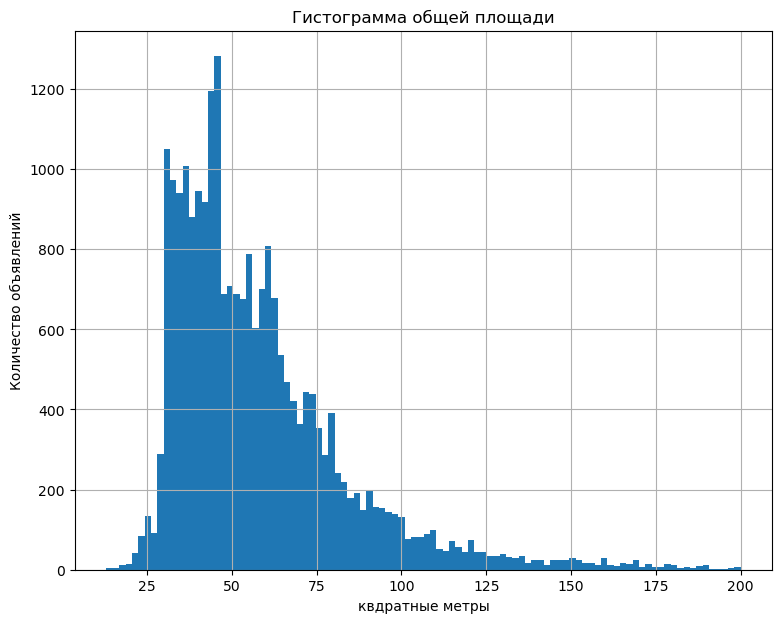

In [170]:
df['total_area'].hist(bins=100, figsize=(9, 7))
# Добавление подписи оси x
plt.xlabel('квдратные метры')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма общей площади')
# Отображение гистограммы
plt.show()

In [171]:
df['total_area'].describe()

count    23342.000000
mean        57.985934
std         26.126121
min         13.000000
25%         40.000000
50%         51.700000
75%         68.600000
max        200.000000
Name: total_area, dtype: float64

**Вывод**
Согласно гистограмме у общей площади распределение похоже на гамма-распределение. Также среднее значение сильно изменено под воздействием хвоста. Стандартное среднее также существенно велико, это тоже указывает на то, что точки данных довольно разбросаны. Также, в основном общая площадь квартиры изменяется от 40 до 68 квадратных метров, далее идет спад. Минимальная площадь квартиры подданное в объявлении составляет 12 квадратных метра.

#### Описание параметра: жилая площадь

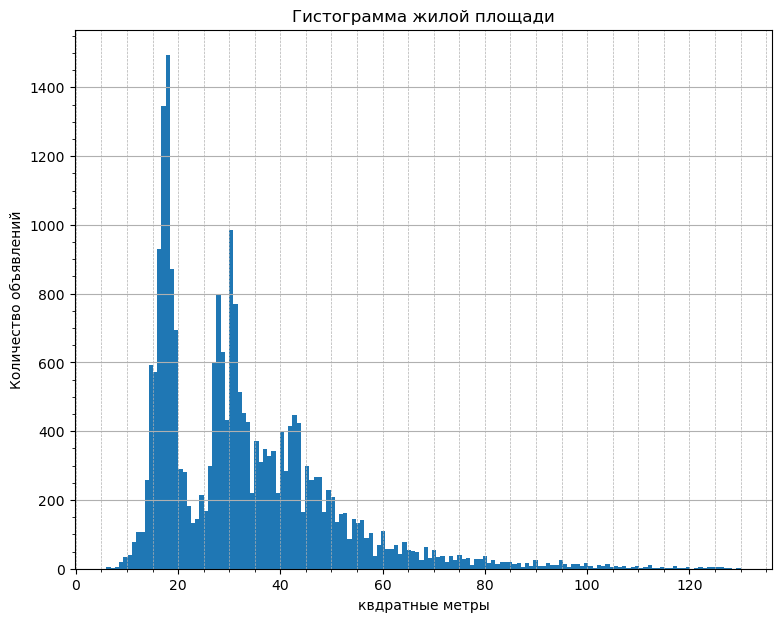

In [172]:
df['living_area'].hist(bins=150, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('квдратные метры')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма жилой площади')
# Отображение гистограммы
plt.show()

In [173]:
df['living_area'].describe()

count    23342.00000
mean        33.16284
std         17.20314
min          6.00000
25%         18.60000
50%         30.00000
75%         42.00000
max        130.00000
Name: living_area, dtype: float64

**Вывод**
Данные по жилой площади распределены не равномерно, есть большое смещение вправо, а также имеется два пика в районе 18 кв метров и в районе 30 метров. Первый пик объясняется тем, что это равна общей площади жилой комнаты в квартирах с числом комнат две и более [согласно законодательства](https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). Можно предположить, что первый пик описывает комнату в коммунальной квартире. Второй пик также обоснован тем, что для проживания согласно [нормы](https://realty.rbc.ru/news/61fac0869a79471ad5bea0cb) предоставления жилплощади на одного человека составляет 33 кв. м. Основанная масса распределена между 18 и 42 кв. метров. Квартиры с жилой площадью больше 60 кв метров встречаются редко.

#### Описание параметра: площадь кухни

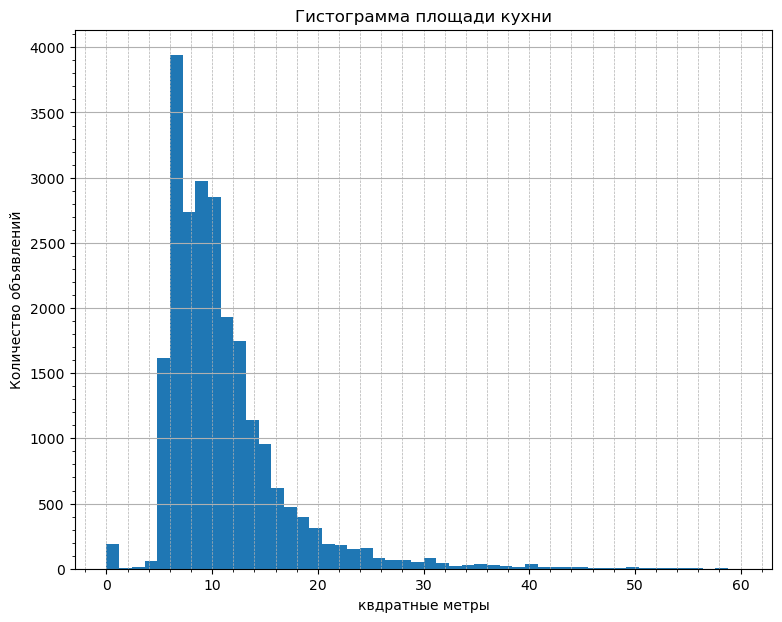

In [174]:
df['kitchen_area'].hist(bins=50, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('квдратные метры')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма площади кухни')
# Отображение гистограммы
plt.show()

In [175]:
df['kitchen_area'].describe()

count    23342.000000
mean        10.924192
std          5.840539
min          0.000000
25%          7.200000
50%          9.700000
75%         12.600000
max         60.000000
Name: kitchen_area, dtype: float64

In [176]:
# Посчитаем количество объявлений с площадью кухни равному 0
len(df[df['kitchen_area'] == 0])

193

In [177]:
# Сгруппируем данные количества площади кухни по столбцам 'studio', 'is_apartment', 'open_plan'
df.groupby(['studio', 'is_apartment', 'open_plan'])['kitchen_area'].count()

studio  is_apartment  open_plan
False   False         False        23085
                      True            66
        True          False           45
True    False         False          146
Name: kitchen_area, dtype: int64

**Вывод**
Согласно гистограмме у площади кухни распределение похоже на гамма-распределение со смещением вправа и выбросами равным 0. Это значит, что среднее значение сильно изменено под воздействием хвоста. Стандартное отклонение также существенно велико, это тоже указывает на то, что точки данных довольно разбросаны. Также, в основном площадь кухни изменяется от 7 до 12 квадратных метров, далее идет спад. Выбросы равны 0 обусловлены тем, что эти помещения представляют собой квартиры студии, либо апартаменты, либо со свободной планировкой, т.е. где не имеется кухни. 

#### Описание параметра: цена объекта

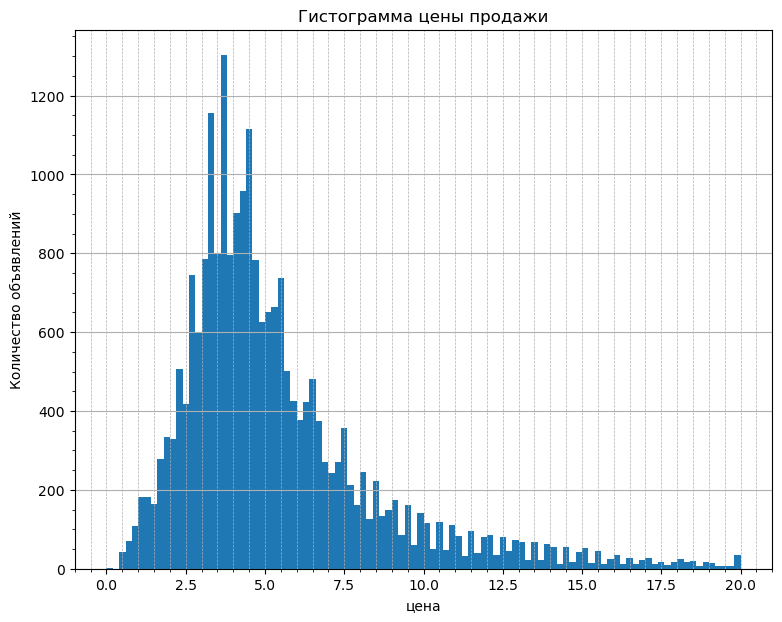

In [178]:
df['last_price'].hist(bins=100, figsize=(9, 7), range=(0, 20))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('цена')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма цены продажи')
# Отображение гистограммы
plt.show()

In [179]:
df['last_price'].describe()

count    23342.000000
mean         5.973433
std          5.991584
min          0.012000
25%          3.400000
50%          4.600000
75%          6.670000
max        330.000000
Name: last_price, dtype: float64

In [180]:
df['last_price'].median()

4.6

**Вывод**
Согласно гистограмме распределение цены продажи похоже на Пуассоновское. Также стоит отметить, что стандартное отклонение сильно высокая. Это значит, что значения не однородны. Также, в основном цена варьируется от 3.4 до 6.7 миллионов, далее идет спад. Квартиры с ценой более 8.5 миллионов встречаются намного реже.

#### Описание параметра: количество комнат

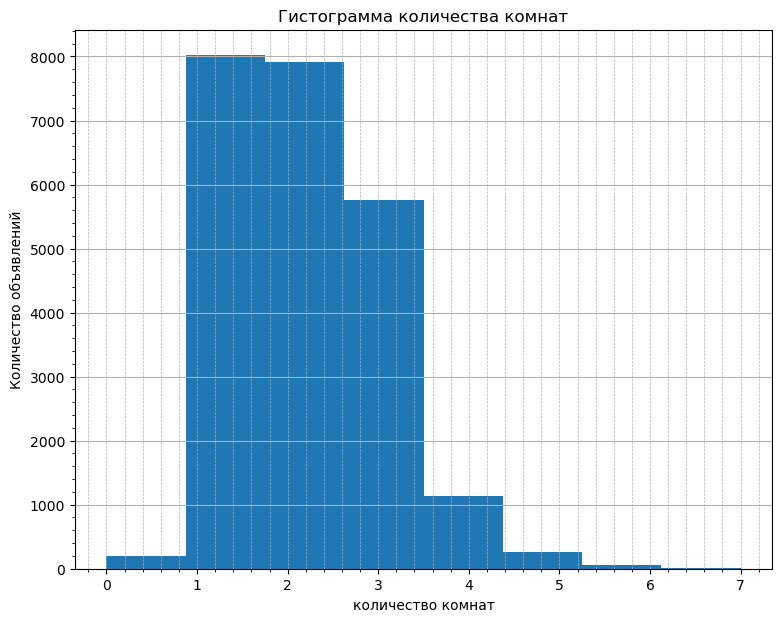

In [181]:
df['rooms'].hist(bins=8, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('количество комнат')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма количества комнат')
# Отображение гистограммы
plt.show()

In [182]:
df['rooms'].describe()

count    23342.000000
mean         2.030417
std          0.986877
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

**Вывод**
Согласно гистограмме наибольшее количество квартир в объявлениях это 1 - 3 трехкомнатные. Стандартное отклонение не слишком большое, следовательно значения более менее однородны.

#### Описание параметра: высота потолков

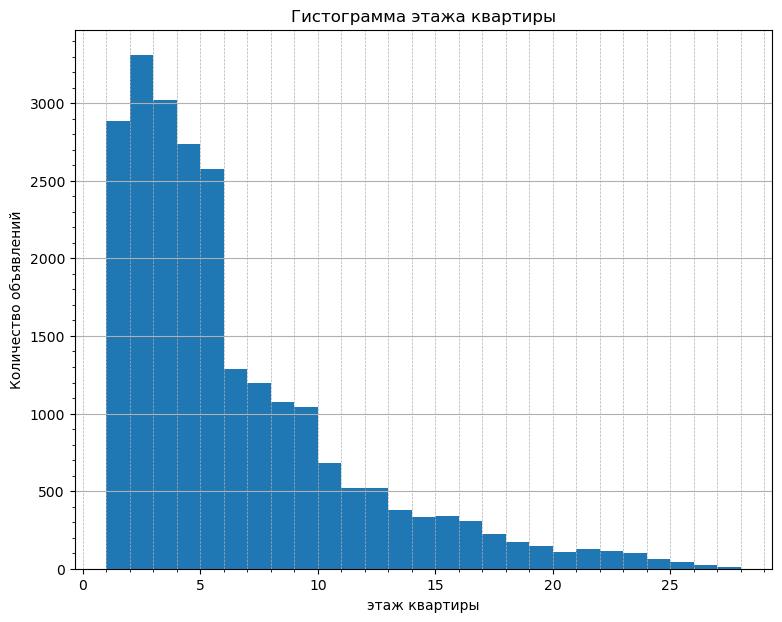

In [183]:
df['floor'].hist(bins=27, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('этаж квартиры')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма этажа квартиры')
# Отображение гистограммы
plt.show()

In [184]:
df['floor'].describe()

count    23342.000000
mean         5.900051
std          4.880974
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         28.000000
Name: floor, dtype: float64

**Вывод**
Согласно гистограмме распределение больше похоже на геометрическое. Наибольшее количество квартир в объявлениях находится до 5 этажа. Это обусловлено тем, что Санкт-Петербург исторически не стоили высотные дома, тенденция изменилась только последнее 20 десятилетие. Стандартное отклонение большое, следовательно значения не однородны.

#### Описание параметра: этаж квартиры

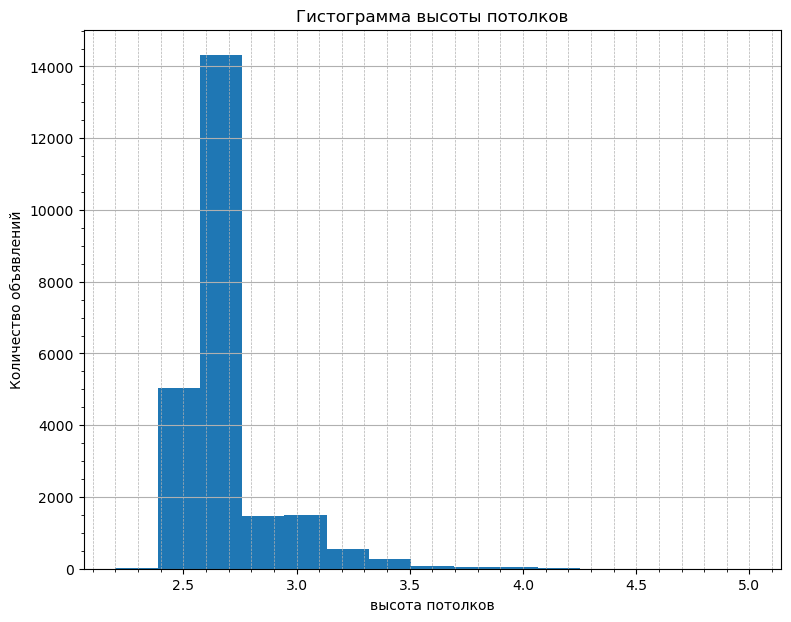

In [185]:
df['ceiling_height'].hist(bins=15, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('высота потолков')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма высоты потолков')
# Отображение гистограммы
plt.show()

In [186]:
df['ceiling_height'].describe()

count    23342.000000
mean         2.691706
std          0.205055
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

**Вывод**
У большинства квартир высота потолков изменяется от 2.5 до 2.7 метров. Стандартное отклонение минимальное, а это значит, что данные однородные.

#### Описание параметра: тип этажа квартиры

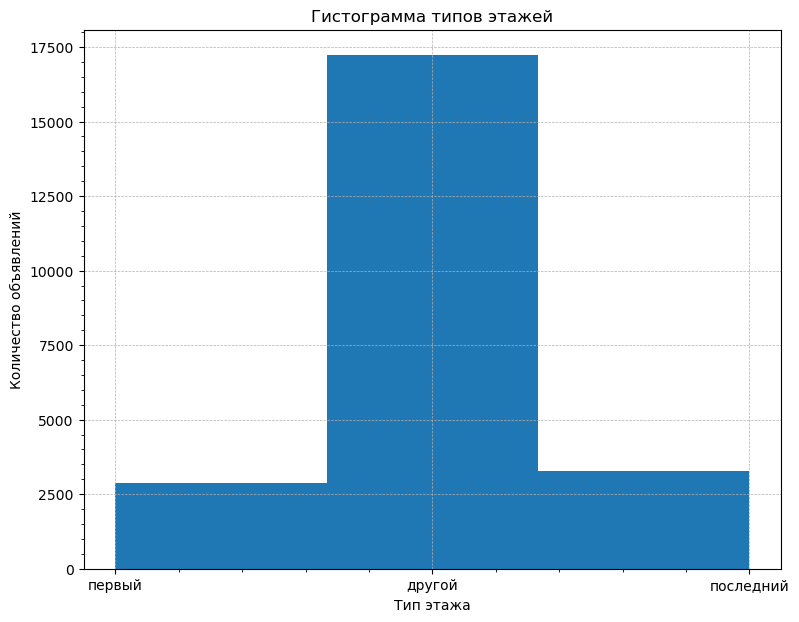

In [187]:
# Сохраним данные в переменную
floor_type_counts = df['floor_type'].value_counts()

# Измененим порядок столбцов
floor_type_counts = floor_type_counts[['первый', 'другой', 'последний']]

# Создадим гистограмму
plt.figure(figsize=(9, 7))
plt.hist(floor_type_counts.index, weights=floor_type_counts, bins=3)

# Установим сетку
plt.grid(True, linestyle='--', linewidth=0.5)

# Включим второстепенных делений
plt.minorticks_on()

# Добавим подписи оси x
plt.xlabel('Тип этажа')
# Добавим подписи оси y
plt.ylabel('Количество объявлений')
# Добавим заголовка гистограммы
plt.title('Гистограмма типов этажей')

# Отобразим гистограмму
plt.show()

In [188]:
df['floor_type'].describe()

count      23342
unique         3
top       другой
freq       17220
Name: floor_type, dtype: object

**Вывод**
Данные являются категориальными, оперировать нормальностью для таких данных нецелесообразно. На основании гистограммы можно сделать вывод, что в большинстве своем квартиры продаются не на крайних этажах. Это обусловлено тем, что изначально квартир больше именно не крайних, так как один дом может предоставить только несколько квартир на первом и последнем этаже и множество на других этажах. Также квартир на последнем этаже больше, чем на первом, это обусловлено тем, что на первых этажах могут находиться коммерческие помещения.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Звучит довольно логично

#### Описание параметра: общее количество этажей в доме

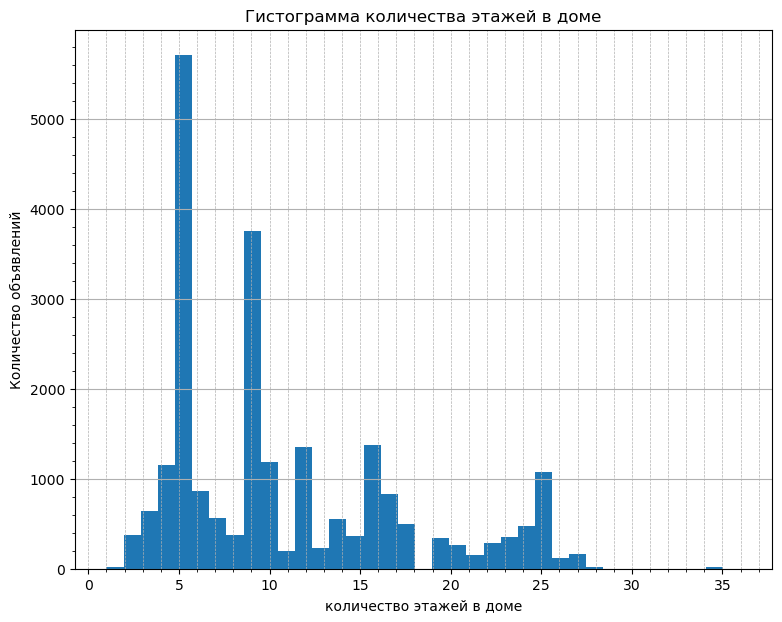

In [189]:
df['floors_total'].hist(bins=37, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('количество этажей в доме')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма количества этажей в доме')
# Отображение гистограммы
plt.show()

In [190]:
df['floors_total'].describe()

count    23342.000000
mean        10.724488
std          6.583918
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

**Вывод**
Наибольшее количество домов являются 5 этажными, а также 9 этажными. Это обусловлено тем, что в советское время было распространена застройка именно 5 и 9 этажностью, для 5 этажного дома не нужно было устанавливать лифт, а для 9 этажного здания необходимо установка только одного лифта. Дома свыше 26 этажей являются крайне редкими, так как застройка такой этажностью Санкт-Петербурге началась только в последние десятилетие.

#### Описание параметра: расстояние до центра города в км

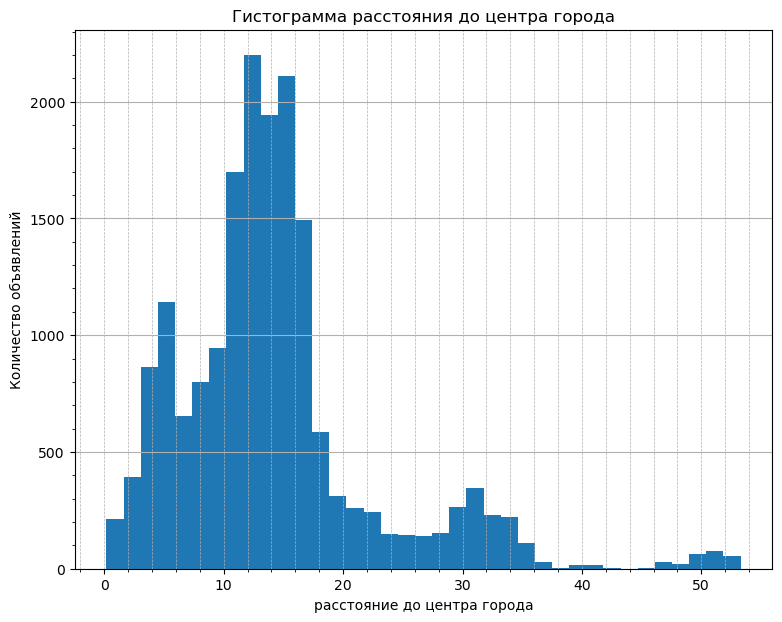

In [191]:
df['city_centers_nearest'].hist(bins=37, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('расстояние до центра города')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма расстояния до центра города')
# Отображение гистограммы
plt.show()

In [192]:
df['city_centers_nearest'].describe()

count    17918.000000
mean        14.219843
std          8.406836
min          0.180000
25%          9.470000
50%         13.140000
75%         16.300000
max         53.290000
Name: city_centers_nearest, dtype: float64

**Вывод**
Согласно гистограмме имеется большое количество выбросов справа. Наибольшее количество квартир в объявлениях расположены от центра города на расстояние от 9 до 16 км. Правое отклонение обусловлено тем, что в городе Санкт-Петербург имеются агломерации и большие спальные районы на краях города, тем самым расстояние до центра города значительно удлиняется, отсюда и образовался второй пик в районе 28 - 33 км.

#### Описание параметра: расстояние до ближайшего аэропорта в км

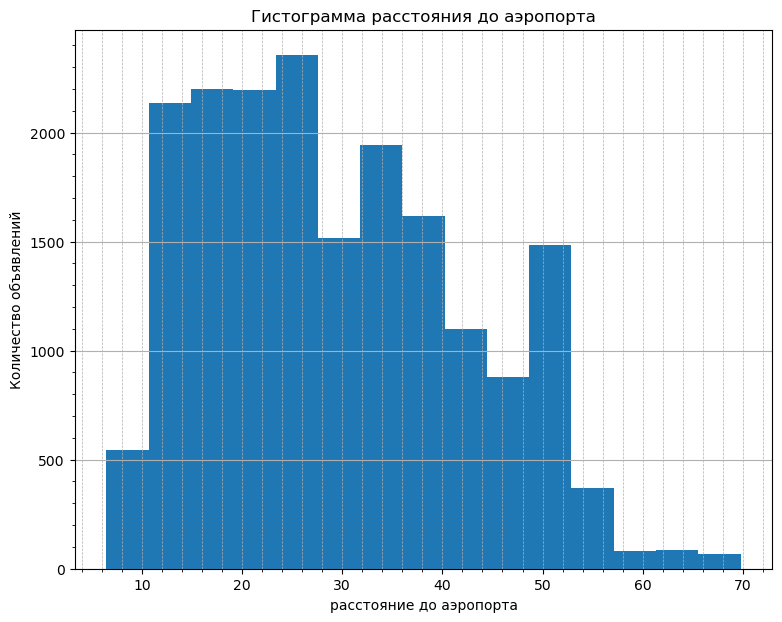

In [193]:
df['airports_nearest'].hist(bins=15, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('расстояние до аэропорта')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма расстояния до аэропорта')
# Отображение гистограммы
plt.show()

In [194]:
df['airports_nearest'].describe()

count    18572.000000
mean        29.437439
std         12.986558
min          6.450000
25%         18.750000
50%         27.200000
75%         38.725000
max         69.780000
Name: airports_nearest, dtype: float64

**Вывод**
Расспределение скошено в право. Наибольшее число квартир находится на росстоянии от аэропорта в 18 - 38 км. и со вторым пиком в 52 км. Второй пик можно бъяснить аналогично выводу из предыдущего подраздела.

#### Описание параметра: расстояние до ближайшего парка в км

In [195]:
df['parks_nearest'].unique()

array([0.48, 0.  , 0.09, 0.08, 0.11, 0.31, 0.29, 0.59, 0.42, 0.76, 0.25,
       0.52, 0.41, 0.45, 0.53, 0.46, 0.72, 0.05, 0.62, 0.68, 0.27, 0.36,
       0.65, 0.38, 0.33, 0.17, 0.44, 0.23, 0.51, 0.75, 0.67, 0.13, 0.24,
       0.49, 0.16, 0.58, 0.28, 0.63, 0.02, 0.22, 0.14, 0.37, 0.34, 0.56,
       0.12, 0.5 , 0.01, 1.13, 1.2 , 0.86, 0.98, 1.02, 0.69, 0.55, 0.47,
       0.54, 0.1 , 0.66, 0.2 , 0.4 , 0.93, 0.32, 0.74, 2.3 , 0.61, 0.35,
       0.64, 0.84, 0.3 , 1.51, 0.04, 0.8 , 0.18, 0.78, 0.39, 0.82, 0.7 ,
       0.15, 2.1 , 0.6 , 1.44, 0.21, 0.77, 0.71, 0.19, 0.91, 2.14, 0.97,
       0.06, 1.5 , 0.94, 1.19, 0.26, 0.43, 0.07, 0.57, 2.24, 0.03, 1.73,
       0.79, 0.95, 1.06, 0.81, 0.92, 0.85, 0.9 , 1.76, 1.1 , 1.11, 1.14,
       0.83, 0.87, 2.66, 0.73, 2.89, 2.28, 1.26, 1.48, 1.34, 2.47, 0.89,
       2.35, 0.96, 2.21, 1.3 , 1.03, 2.9 , 1.42, 1.01, 1.36, 1.27, 1.77,
       1.08, 1.05, 1.59, 0.88, 1.21, 2.07, 2.85, 1.8 , 1.18, 2.41, 1.  ,
       1.6 , 1.33, 1.23, 2.42, 1.07, 1.94, 1.72, 1.

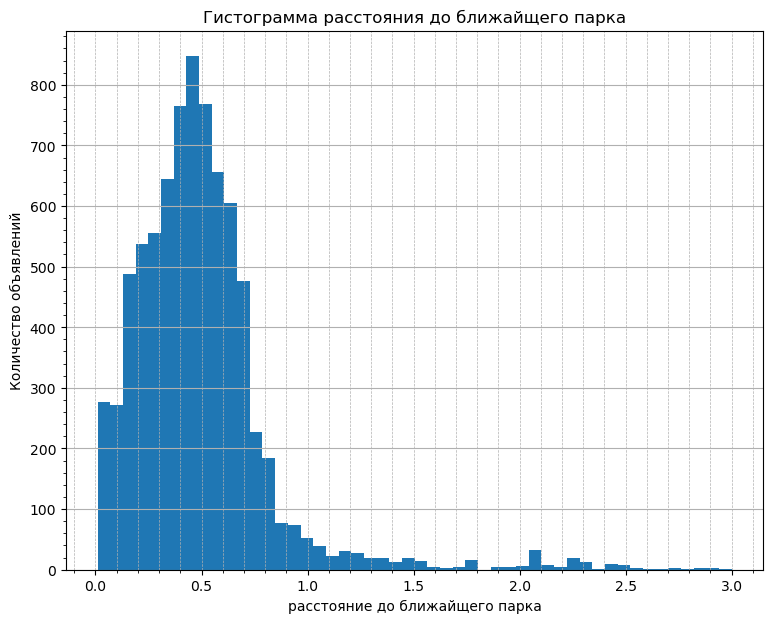

In [196]:
df['parks_nearest'].hist(bins=50, figsize=(9, 7), range=(0.01, 3))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('расстояние до ближайщего парка')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма расстояния до ближайщего парка')
# Отображение гистограммы
plt.show()

In [197]:
df[df['parks_nearest'] > 0]['parks_nearest'].describe()

count    7859.000000
mean        0.491353
std         0.338713
min         0.010000
25%         0.290000
50%         0.460000
75%         0.610000
max         2.980000
Name: parks_nearest, dtype: float64

**Вывод**
Согласно гистограмме основном расстояние до ближайщего парка составляет от 300 метров до 600. Это обусловлено тем, что Санкт-Петербург богат парками и скверами. Выбросы справа свидетелбствуют от том, что скорее всего туда попали данные из области, так как до ближайщего парка там более значительные расстояния, либо помещения находятся в промышленных районах. 

#### Описание параметра: день публикации объявления

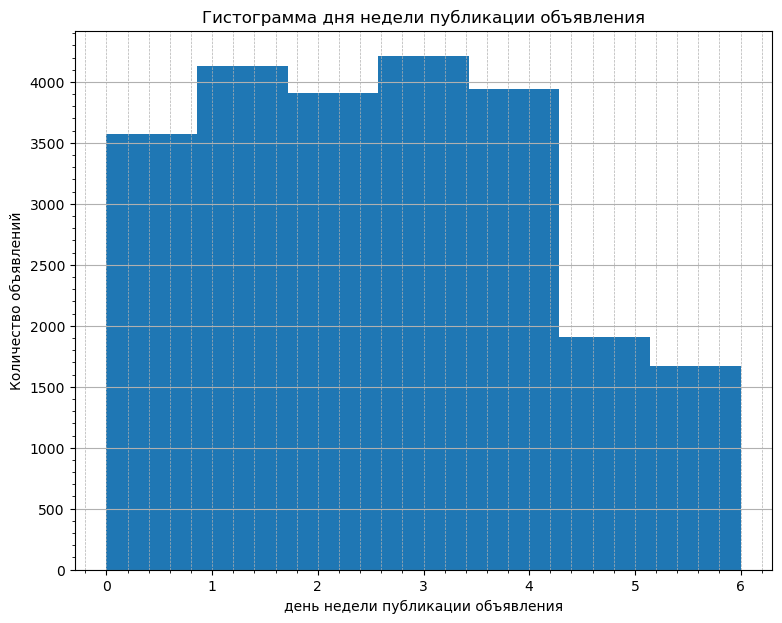

In [198]:
df['publication_weekday'].hist(bins=7, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('день недели публикации объявления')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма дня недели публикации объявления')
# Отображение гистограммы
plt.show()

In [199]:
df['publication_weekday'].describe()

count    23342.000000
mean         2.567946
std          1.790417
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_weekday, dtype: float64

**Вывод**
Расспределение равномерное в пределах будних дней ("0" означает понедельник). Провалы в выходные дни означает, то что пользователи предпочитают опубликовывать в рабочие дни объявления, не тратья время на это в выходные дни, а также, что объявления могут подавать и риелторы, также в свое рабочее время.

#### Описание параметра: месяц публикации объявления

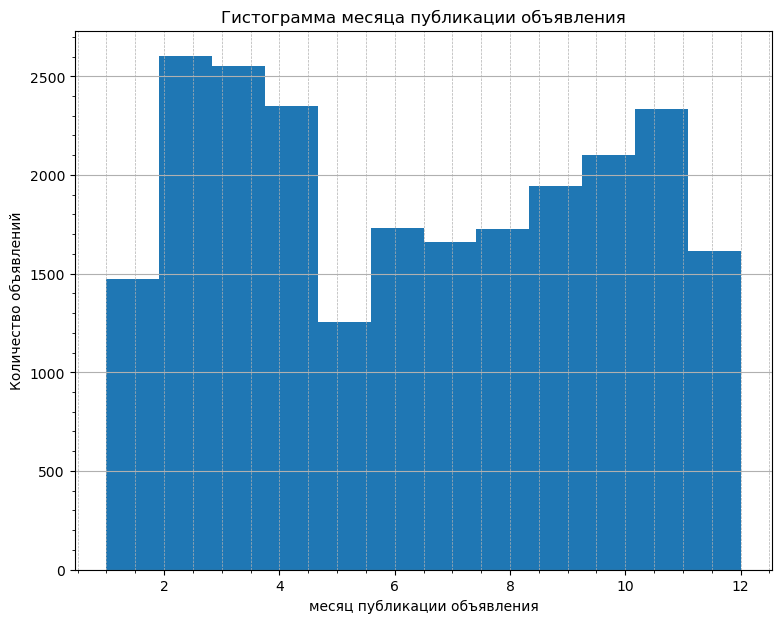

In [200]:
df['publication_month'].hist(bins=12, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('месяц публикации объявления')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма месяца публикации объявления')
# Отображение гистограммы
plt.show()

**Вывод**
Данные распределены неравномерно. Наиболее редко объявления выкладываю в явнавре и в мае, это обусловлено тем, что это праздничные месяцы, люди не охотно выкладывают объявления в такие месяцы. Наибольшее число публикаций выпадают на начала года, можно предположить, что это связанно с желанием продать или купить новую квартиру в новом году, как говориться "новый год с нового листа". А рост к концу года можно объясним тем же, успеть к новому году продать кваритру, а также большинство застройщиков пытаюся подбить свои хвосты к новому году.

#### Определение категорий продаж кваритры по времени

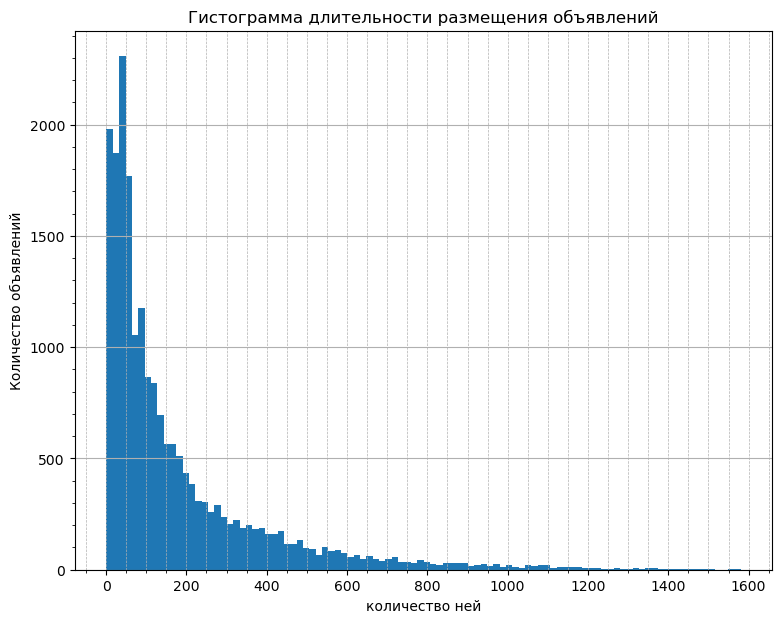

In [201]:
df['days_exposition'].hist(bins=100, figsize=(9, 7))
# Установка сетки по оси x с частотой в 10 делений
plt.gca().xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
# Включить второстепенные деления
plt.minorticks_on()
# Добавление подписи оси x
plt.xlabel('количество ней')
# Добавление подписи оси y
plt.ylabel('Количество объявлений')
# Добавление заголовка гистограммы
plt.title('Гистограмма длительности размещения объявлений')
# Отображение гистограммы
plt.show()

Выведем вновь основные статисчитеские данные по столбцу `days_exposition`

In [202]:
df['days_exposition'].describe()

count    20235.000000
mean       179.685693
std        218.307965
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вычислим медиану

In [203]:
df['days_exposition'].median()

95.0

Построим еще раз диаграмму размаха.

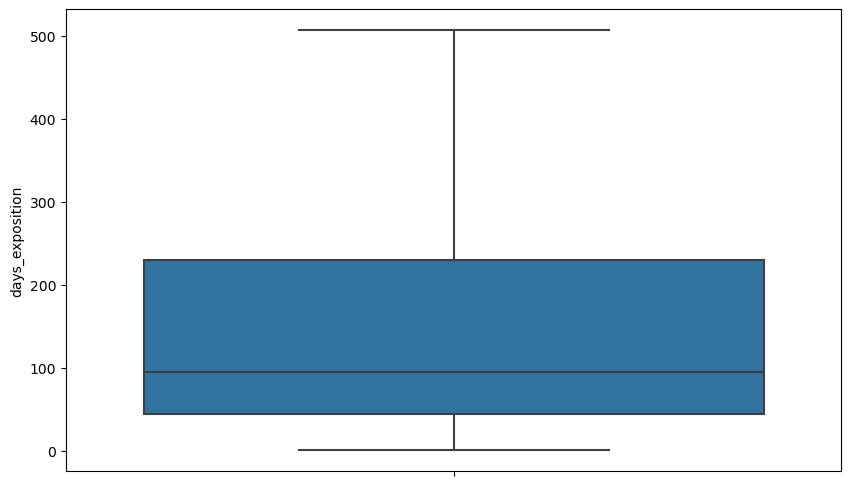

In [204]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=df['days_exposition'], showfliers=False);
# Изменим границы отображения
#ax.set_ylim(bottom=0, top=510)  
#sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False)

Выведем долю пропущенных значений для столбца `days_exposition`

In [205]:
print('Доля пропущенных значений в столбце "days_exposition": {:.1%}'.format(df['days_exposition'].isna().sum() / df.shape[0]))

Доля пропущенных значений в столбце "days_exposition": 13.3%


**Вывод**
Данные распределены неравномерно. На основании статистических данных и построенных графиков можно сделать следующие заключения:
- Быстрыми продажами можно считать те объявления, время размещения которых менее 45 дней;
- К долгим можно отнести те объявления, время размещения которых более 230 дней;
- К необычно долгим можно отнести те объявления, время размещения которых более 500 дней;
- Обычно квартиры продаются в районе 95 дней, если смотреть по медиане, целесообразность использования среднего значения  подвергается сомнению, так как в данных если выбросы в большом количестве.

Также стоит обратить внимание на наличие большого количества пропущенных значений (около 13%), что в свою очередь может внести искажение в данные. 

Еще необходимо обратить внимание на то, что в столбце находятся данные о количестве дней публикации, что в свою очередь не в полной мере отражает сам факт продажи квартиры, квартира могла быть и не продана, а просто было удалено объявление по разным причинам.

**Агрегирующий вывод:**

- *Общая площадь*:

  - Распределение смещено вправо с наличием выбросов.
  - Среднее и стандартное отклонение сильно искажены.
  - Основная масса квартир имеет площадь от 40 до 68 кв. м.
- *Жилая площадь*:

  - Распределение неравномерное с двумя пиками.
  - Первый пик связан с жилой комнатой, второй — с соответствием нормативам.
  - Основная масса в диапазоне 18–42 кв. м.
- *Площадь кухни*:

  - Распределение смещено вправо с выбросами (нулевой площадью).
  - Основная масса от 7 до 12 кв. м.
- *Цена продажи*:

  - Распределение похоже на Пуассоновское.
  - Высокое стандартное отклонение говорит о неоднородности данных.
  - Основная масса цен — 3.4–6.7 млн, квартиры дороже 8.5 млн встречаются реже.
- *Число комнат*:

  - Наибольшее количество объявлений для 1-3 комнатных квартир.
  - Стандартное отклонение свидетельствует о достаточной однородности данных.
- *Этаж*:

  - Распределение похоже на геометрическое.
  - Большинство квартир продаются до 5 этажа.
  - Высокое стандартное отклонение говорит о неоднородности данных.
- *Высота потолков*:

  - У большинства квартир высота потолков в диапазоне 2.5–2.7 м.
  - Данные считаются однородными с минимальным стандартным отклонением.
- *Расстояние до центра*:

  - Большинство квартир находятся в пределах 9–16 км от центра.
  - Выбросы вправо обусловлены наличием агломераций и спальных районов на краях города.
- *Распределение стоимости жилья*:

  - Распределение стоимости жилья смещено вправо, где большинство квартир находится в ценовом диапазоне от 18 до 38 миллионов рублей, с вторым пиком в районе 52 миллионов.
- *Расстояние до ближайших парков*:

  - Основное расстояние до ближайшего парка составляет от 300 метров до 600 метров, что может быть обусловлено богатством парков и скверов в Санкт-Петербурге.
  - Обнаружены выбросы справа, свидетельствующие, возможно, о данных из удаленных районов или промышленных зон.
- *Публикации в разные дни недели*:

  - Объявления чаще всего публикуют в будние дни, с провалами в выходные.
  - Предполагаем, что это может быть связано с предпочтением пользователей выкладывать объявления в рабочие дни и возможной активностью риелторов.
- *Публикации в разные месяцы*:

  - Неравномерное распределение публикаций в течение года.
  - Наименьшее количество объявлений в январе и мае, что может быть связано с праздничными месяцами и нежеланием пользователей заниматься продажей в эти периоды.
  - Пиковая активность в начале года, возможно, из-за стремления к новому началу.
- *Время продажи недвижимости*:

  - Предложения продажи быстро: менее 45 дней.
  - Долгосрочные предложения: более 230 дней.
  - Необычно долгие: более 500 дней.
  - Обычно квартиры продаются в среднем за 95 дней (по медиане), но среднее значение может быть искажено из-за выбросов.
- *Пропущенные значения*:

  - Присутствует значительное количество пропущенных значений, около 13%, что может исказить анализ.

#### Определение влияния факторов на общую стоимость объекта

##### Влияние общей площади на общую стоимость объекта

Создадим сводную таблицу в качестве данных по которым будем группировать и выберем столбец `total_area`, значения, по которым мы хотим увидеть сводную таблицу используем `last_price`, в качестве функции выберем медианное значение, так как она менее потвержена влиянию выбросов.

In [206]:
total_area_influence_price = df.pivot_table(
    index='total_area', 
    values='last_price', 
    aggfunc='median'
)
total_area_influence_price

,last_price
total_area,
13.0,1.850
13.2,1.686
14.0,1.190
15.0,1.725
15.5,2.450
...,...
198.0,26.000
198.1,20.000
198.9,30.000


Построим график по полученной сводной таблицы, для этого создадим функцию "build_plot" и применем ее.

In [207]:
# размер шрифта для графиков
text_size = 20

# Функция для простроения столбчатой диаграммы
def build_plot(df, column, title, x_label):
    try:
        # Создадим фигуру, а также зададим размер графика (12 дюймов в ширину и 6 дюймов в высоту)
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Построим график
        ax.scatter(df.index, df[column])

        # Расскоментировать код для отображени линии тренда
        # Подгоняем полином (в данном случае, линию)
        #z = np.polyfit(df.index, df[column], 1)
        #p = np.poly1d(z)
        
        # Рисуем линию тренда
        #ax.plot(df.index, p(df.index), 'r--')
        
        # Зададим название графика и определим размера шрифта
        ax.set_title(title, fontsize=26)
        
        # Определим названия осей
        ax.set_xlabel(x_label, fontsize=text_size)
        ax.set_ylabel('Цена', fontsize=text_size)
    
        # Определим размер шрифта для подписей делений оси X и оси Y
        ax.tick_params(axis='x', labelsize=text_size)
        ax.tick_params(axis='y', labelsize=text_size)

        plt.show()
        
    except Exception as e:
        return (f"График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: {e}")

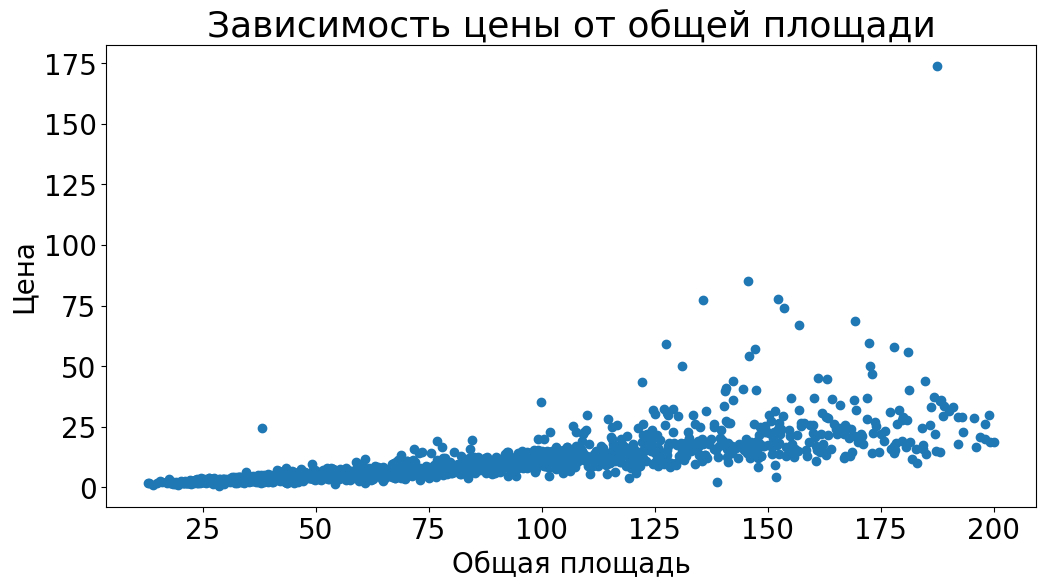

In [208]:
build_plot(total_area_influence_price, 'last_price', 'Зависимость цены от общей площади', 'Общая площадь')

На графике видны множества выбросов, избавимся от них, применив срез по данным, в качестве границ для среза будем использовать данные, которые указаны в выводах к соответсвующим параметрам в разделе 2.5

In [209]:
# Создание среза по двум параметрам
filtered_total_area = df.query('(last_price < 18000000) & (total_area < 120)')

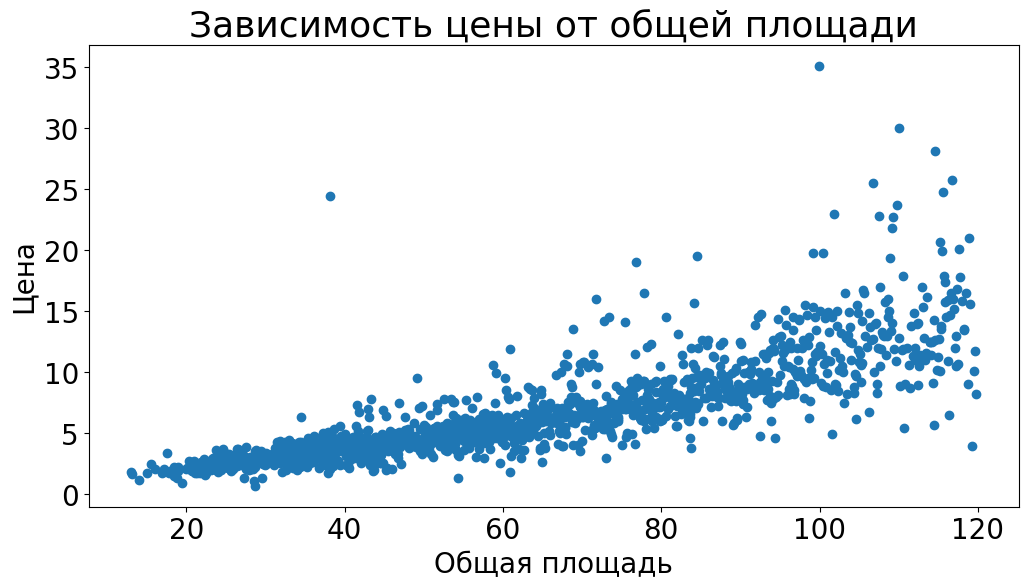

In [210]:
total_area_influence_price = filtered_total_area.pivot_table(
    index='total_area', 
    values='last_price', 
    aggfunc='median'
)
# Построение графика для общей площади
build_plot(total_area_influence_price, 'last_price', 'Зависимость цены от общей площади', 'Общая площадь')

Для наглядности постоим еще hexbin-график 

<Axes: xlabel='total_area', ylabel='last_price'>

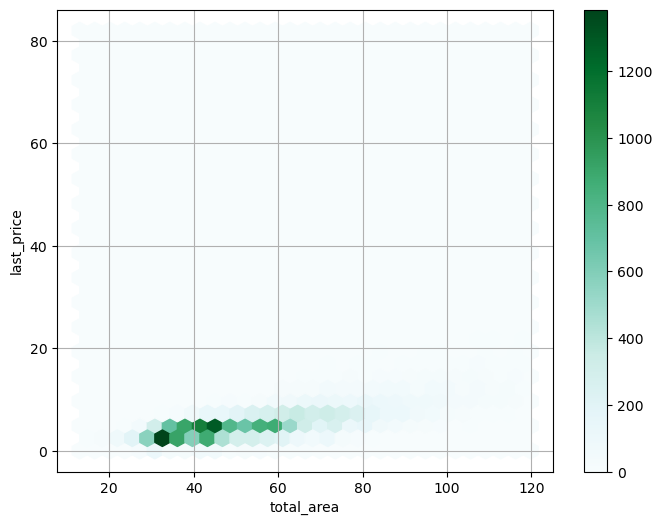

In [211]:
#plt.hexbin(filtered_total_area['total_area'], filtered_total_area['last_price'], gridsize=30) # второй вариант графика

# Построим hexbin-график
filtered_total_area.plot(x='total_area', y='last_price', kind='hexbin', gridsize=30, figsize=(8, 6), grid=True)

Вычислим коэффициент корреляции Пирсона между конечной стоимостью и общей площадью

In [212]:
filtered_total_area['total_area'].corr(filtered_total_area['last_price'])

0.6901311807990467

**Вывод**
На основании первого графика разброса (scatter), определили зависимость конечной стоимостью от общей площади, но также обнаружили и большое количество выбросов, отфильтровав (избавившись от выбросов) и построив вновь графика разброса, определили прямую сильную положительную с корреляцию этих двух параметров, коэффицент корреляции которой составил 0.73. Также на основании графика разброса можно сделать вывод, что с увеличением общей площади увеличивается и разброс стоимости жилья. 

На основании коэффицента корреляции в 0.73 можно предположить, что на итоговую стоимость влияют и другие не учтенные факторы.

Согласно hexbin-график видно, что наибольшая плотность объявлений находится в области от 30 до 45 квадратных метров со стоимостью от 2 500 000 до 5 000 000.

##### Влияние жилой площади на общую стоимость объекта

Аналогичным путем как в предыдущем подразделе проведем анализ влияния жилой площади на общую стоимость объекта

In [213]:
living_area_influence_price = df.pivot_table(
    index='living_area', 
    values='last_price', 
    aggfunc='median'
)
living_area_influence_price

,last_price
living_area,
6.0,3.799
6.3,1.768
6.5,4.050
7.2,1.725
8.0,6.850
...,...
127.0,11.700
127.7,18.000
127.8,13.900


Построим график по полученной сводной таблицы, для этого создадим функцию "build_plot" и применем ее.

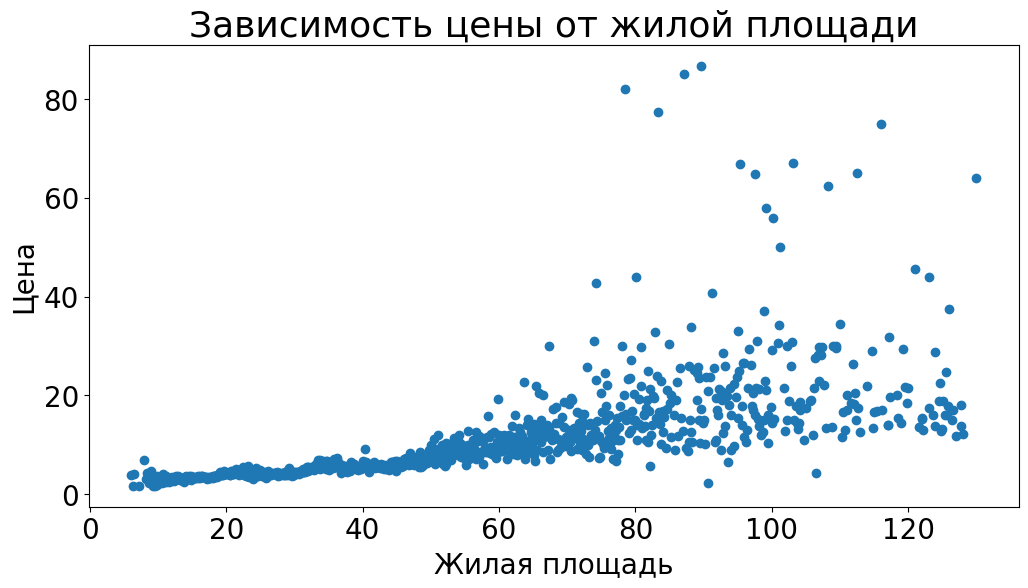

In [214]:
build_plot(living_area_influence_price, 'last_price', 'Зависимость цены от жилой площади', 'Жилая площадь')

На графике видны множества выбросов, избавимся от них, применив срез по данным, в качестве границ для среза будем использовать данные, которые указаны в выводах к соответсвующим параметрам в разделе 2.5

In [215]:
# Создание среза по двум параметрам
filtered_living_area = df.query('(last_price < 18000000) & (living_area < 80)')

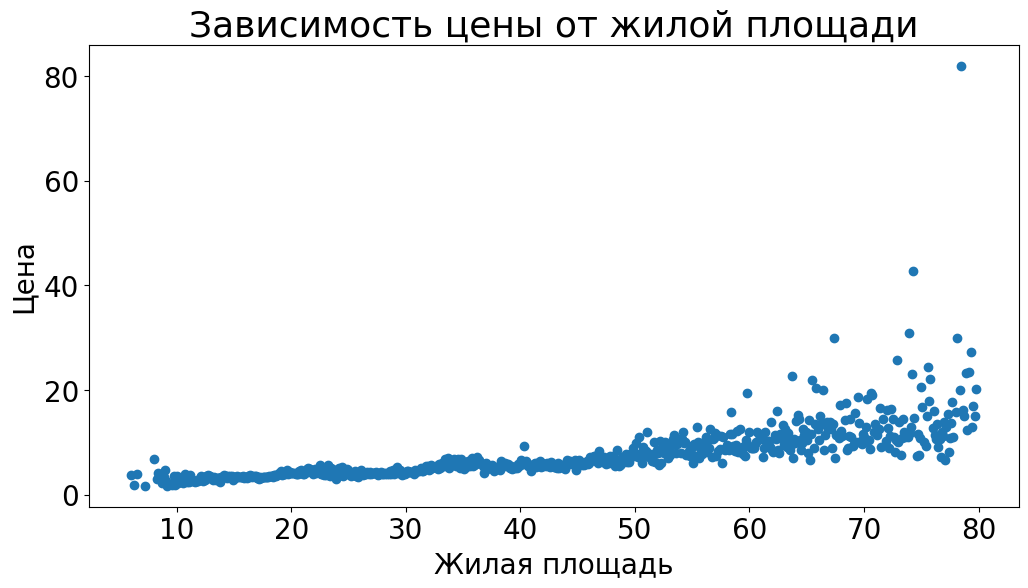

In [216]:
living_area_influence_price = filtered_living_area.pivot_table(
    index='living_area', 
    values='last_price', 
    aggfunc='median'
)
# Построение графика для общей площади
build_plot(living_area_influence_price, 'last_price', 'Зависимость цены от жилой площади', 'Жилая площадь')

<Axes: xlabel='living_area', ylabel='last_price'>

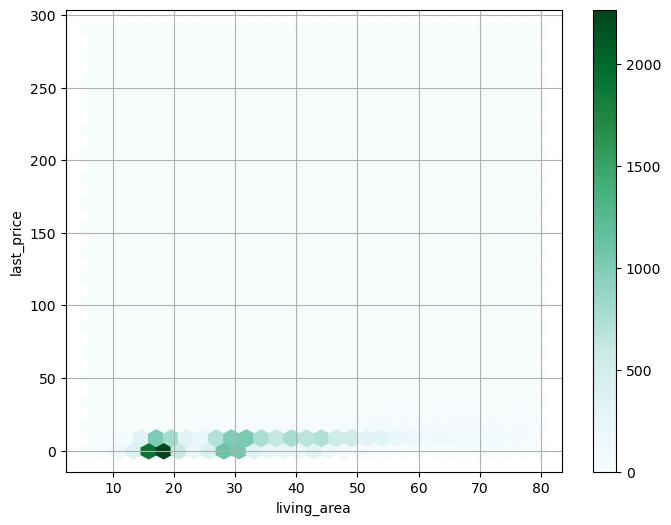

In [217]:
# Построим hexbin-график
filtered_living_area.plot(x='living_area', y='last_price', kind='hexbin', gridsize=30, figsize=(8, 6), grid=True)

Вычислим коэффициент корреляции Пирсона между конечной стоимостью и жилой площадью

In [218]:
filtered_living_area['living_area'].corr(filtered_living_area['last_price'])

0.5198970491583134

**Вывод**
На основании первого графика разброса (scatter), определили зависимость конечной стоимостью от жилой площади, но также обнаружили и большое количество выбросов, отфильтровав (избавившись от выбросов) и построив вновь графика разброса, определили прямую положительную с корреляцию этих двух параметров, коэффицент корреляции которой составил 0.62. Также на основании графика разброса можно сделать вывод, что начиная с 50 квадратных метров и более увеличивается и разброс стоимости жилья. 

На основании коэффицента корреляции в 0.62 можно предположить, что на итоговую стоимость влияют и другие не учтенные факторы.

Согласно hexbin-график видно, что наибольшая плотность набляюдается в двух пиках, а именно в области 18 квадратных метров со стоимостью от 2 500 000 до 4 500 000, а также в области от 26 до 32 квадратных метров со стоимостью от 3 000 000 до 5 500 000.

##### Влияние площади кухни на общую стоимость объекта

Аналогичным путем как в предыдущем подразделе проведем анализ влияния площади кухни на общую стоимость объекта

In [219]:
kitchen_area_influence_price = df.pivot_table(
    index='kitchen_area', 
    values='last_price', 
    aggfunc='median'
)
kitchen_area_influence_price

,last_price
kitchen_area,
0.0,2.700
1.3,4.250
2.0,2.720
2.3,2.940
2.4,2.200
...,...
56.1,22.520
56.2,19.312
58.0,21.500


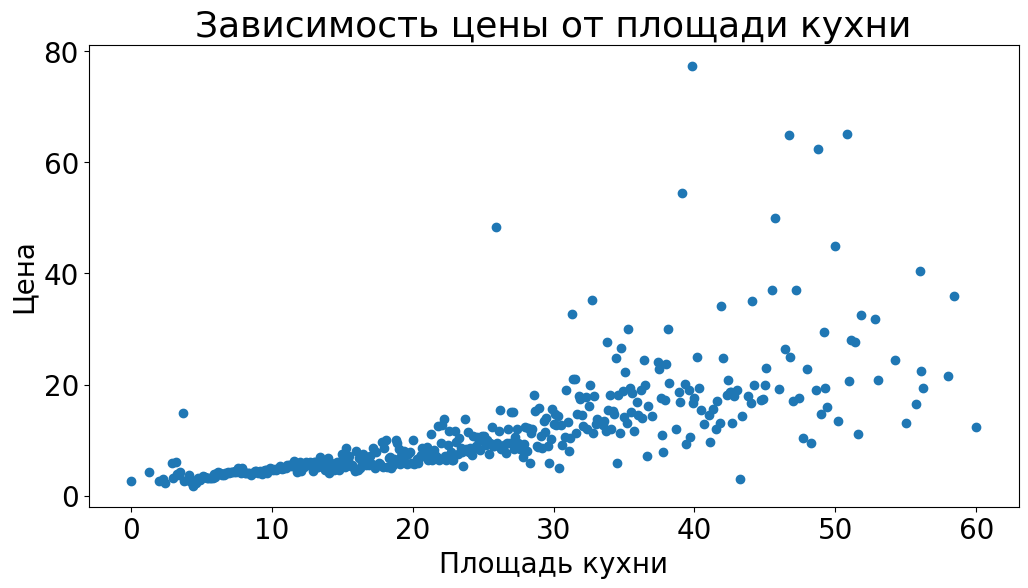

In [220]:
build_plot(kitchen_area_influence_price, 'last_price', 'Зависимость цены от площади кухни', 'Площадь кухни')

На графике видны множества выбросов, избавимся от них, применив срез по данным, в качестве границ для среза будем использовать данные, которые указаны в выводах к соответсвующим параметрам в разделе 2.5

In [221]:
# Создание среза по двум параметрам
filtered_kitchen_area = df.query('(last_price < 18000000) & (kitchen_area < 25)')

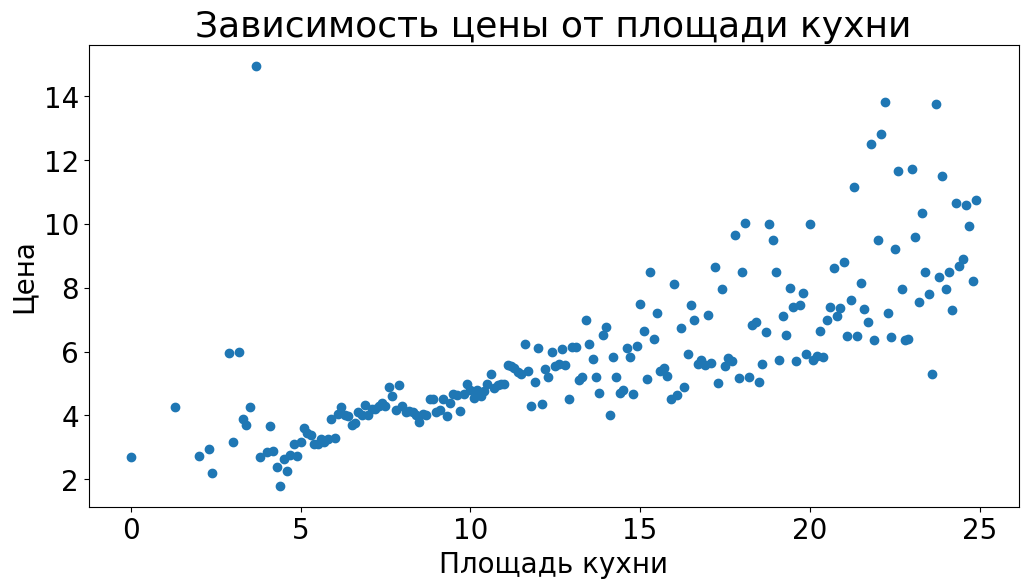

In [222]:
kitchen_area_influence_price = filtered_kitchen_area.pivot_table(
    index='kitchen_area', 
    values='last_price', 
    aggfunc='median'
)
# Построение графика для общей площади
build_plot(kitchen_area_influence_price, 'last_price', 'Зависимость цены от площади кухни', 'Площадь кухни')

<Axes: xlabel='kitchen_area', ylabel='last_price'>

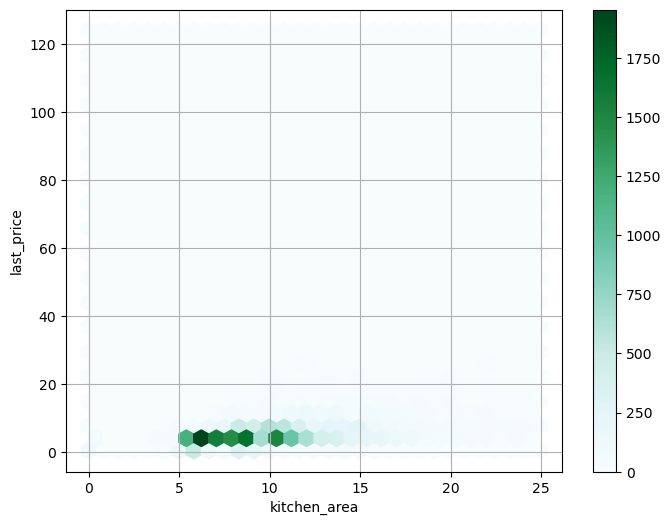

In [223]:
# Построим hexbin-график
filtered_kitchen_area.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=30, figsize=(8, 6), grid=True)

Вычислим коэффициент корреляции Пирсона между конечной стоимостью и жилой площадью

In [224]:
filtered_kitchen_area['kitchen_area'].corr(filtered_kitchen_area['last_price'])

0.4195981012812035

**Вывод**
 - Общий анализ:

  - На основании первого графика разброса (scatter) определили зависимость конечной стоимости от площади кухни.
  - Обнаружили большое количество выбросов.
 - Фильтрация данных:

  - Отфильтровали выбросы и построили новый график разброса, выявив прямую положительную корреляцию между площадью кухни и стоимостью жилья.
  - Коэффициент корреляции составил 0.46.
 - Анализ разброса стоимости:

  - Наблюдаем увеличение разброса стоимости жилья начиная с 12 квадратных метров площади кухни.
  - Замечаем разброс стоимости для площади кухни менее 4 квадратных метров, где корреляция отсутствует.
 - Выводы:

  - Предполагаем, что на конечную стоимость влияют и другие неучтенные факторы.
  - Hexbin-график подтверждает, что наибольшая плотность наблюдается в области от 5 до 12 квадратных метров с ценой от 23,500,000 до 5,500,000.

##### Влияние количество комнат на общую стоимость объекта

Аналогичным путем как в предыдущем подразделе проведем анализ влияния количества комнат на общую стоимость объекта

In [225]:
rooms_influence_price = df.pivot_table(
    index='rooms', 
    values='last_price', 
    aggfunc='median'
)
rooms_influence_price

,last_price
rooms,
0,2.7000
1,3.6000
2,4.7690
3,6.1900
4,8.8550
5,12.5000
6,13.3255
7,16.7500


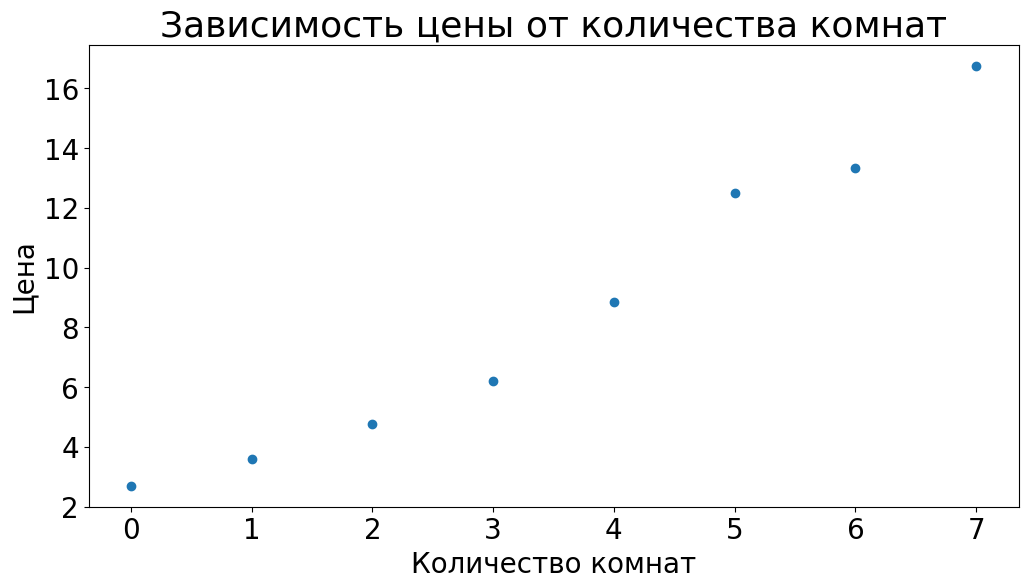

In [226]:
build_plot(rooms_influence_price, 'last_price', 'Зависимость цены от количества комнат', 'Количество комнат')

Вычислим коэффициент корреляции Пирсона между конечной стоимостью и количеством комнат

In [227]:
df['rooms'].corr(df['last_price'])

0.38447966182494236

**Вывод**
На основании графика разброса (scatter), определили зависимость конечной стоимостью от количества комнат. Эта зависимость имеет прямую положительную с корреляцию сэкспоненциальным характером.

На основании коэффицента корреляции в 0.44 можно предположить, что на итоговую стоимость большей мере также влияют и другие не учтенные факторы

##### Альтернативный метод определние влияния общей, жилой площади, площади кухни и количество комнат на стоимость объекта

C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

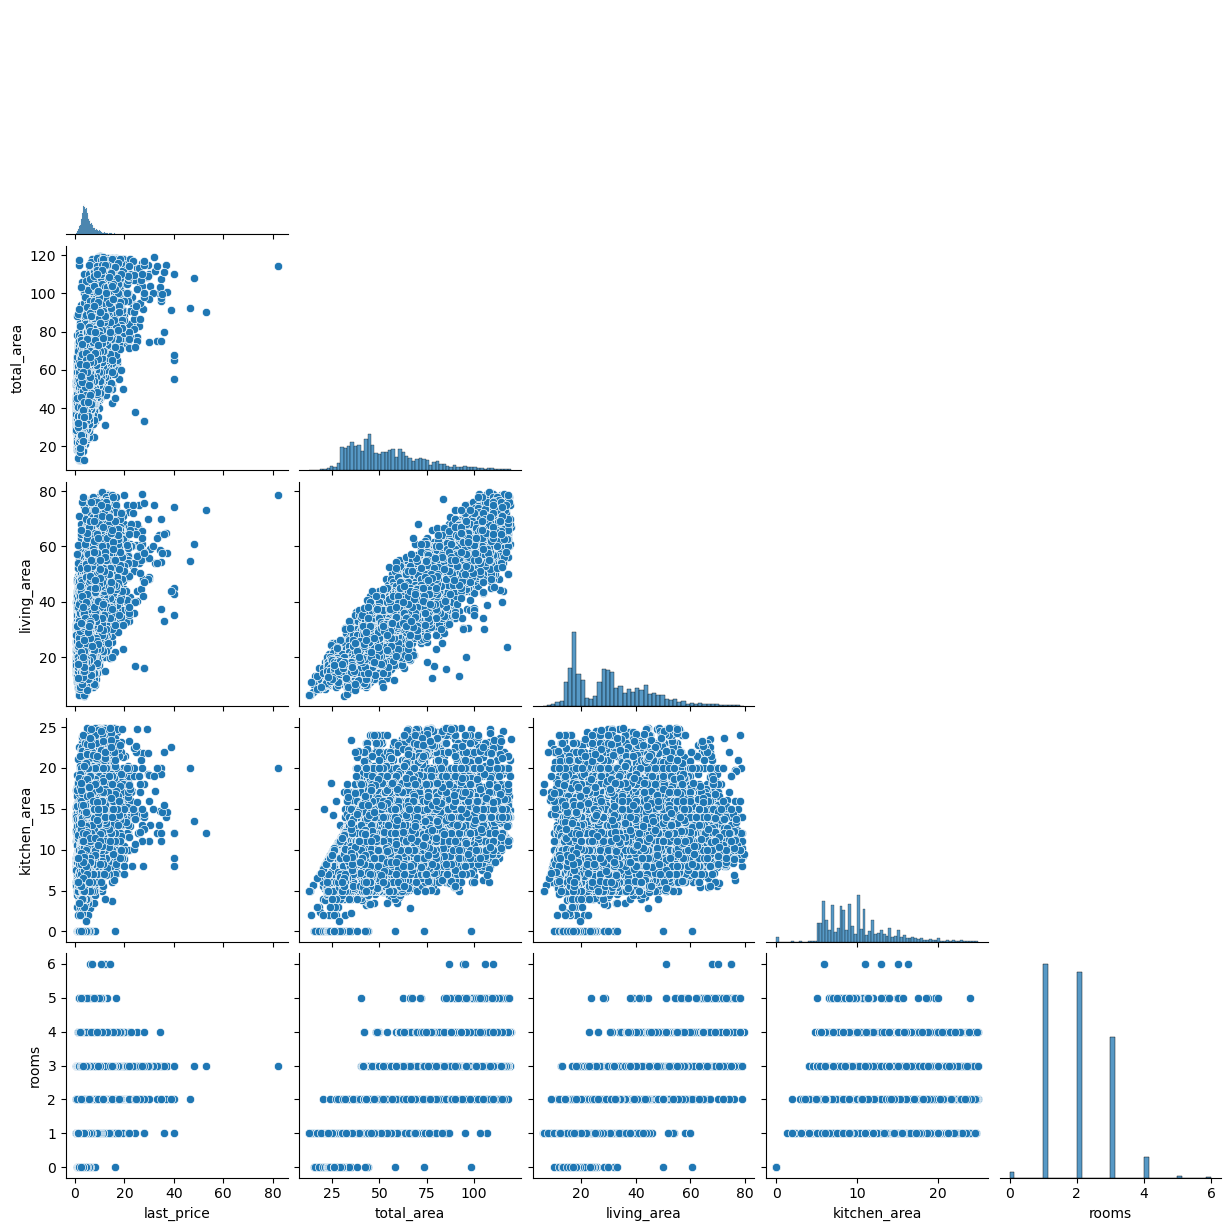

In [228]:
filtered_area = df.query('(last_price < 1800000) & (total_area < 120) & (living_area < 80) & (kitchen_area < 25)')
sns.pairplot(filtered_area[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']], corner=True);

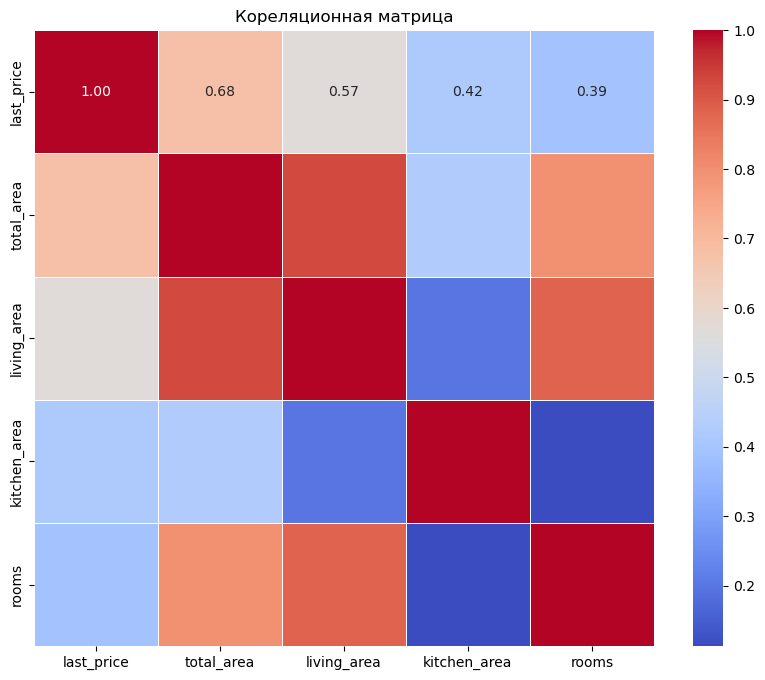

In [229]:
correlation_matrix = filtered_area[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Кореляционная матрица')
plt.show()

##### Влияние типа этажа на общую стоимость объекта

Аналогичным путем как в предыдущем подразделе проведем анализ влияния типа этажа на общую стоимость объекта

In [230]:
# Измененим порядок столбцов
floor_type_sort = ['первый', 'другой', 'последний']

# Создадим сводную таблицу
floor_type_influence_price = df.pivot_table(
    index='floor_type', 
    values='last_price', 
    aggfunc='median'
)

# Производим сортировку
floor_type_influence_price = floor_type_influence_price.reindex(floor_type_sort)

floor_type_influence_price

,last_price
floor_type,
первый,3.900
другой,4.800
последний,4.243


Создадим функцию "bild_bar" для построения графика.

In [231]:
def bild_bar(df, column, title, x_label, x_min=None, x_max=None, y_min=None, y_max=None, text_angle=text_size, show_values=True):
    # Создадим фигуру и ось, а также зададим размер графика (15 дюймов в ширину и 8 дюймов в высоту)
    fig, ax = plt.subplots(figsize=(15, 8))

    # Зададим размер оси y, если значения не None
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Зададим размер оси x, если значения не None
    if x_min is not None and x_max is not None:
        ax.set_xlim(x_min, x_max)
        
    # Создадим столбчатую диаграмму
    plt.bar(df.index, df[column], width=1, edgecolor="white", linewidth=0.7)

    # Определим названия осей
    ax.set_xlabel(x_label, fontsize=text_size)
    ax.set_ylabel('Цена, млн. рублей', fontsize=text_size)

    # Зададим название графика и определим размера шрифта
    ax.set_title(title, fontsize=26)

    # Установим конкретные значения к каждому параметру
    if show_values:
        for i, v in enumerate(df[column]):
            plt.text(i, v, f'{v}', ha='center', va='bottom', fontsize=text_angle)
    
    # Определим размер шрифта для подписей делений оси X и оси Y
    ax.tick_params(axis='x', labelsize=text_size)
    ax.tick_params(axis='y', labelsize=text_size)
        
    # Автоматически настроем распределение элементов на графике
    plt.tight_layout()

    plt.show()


Построим график

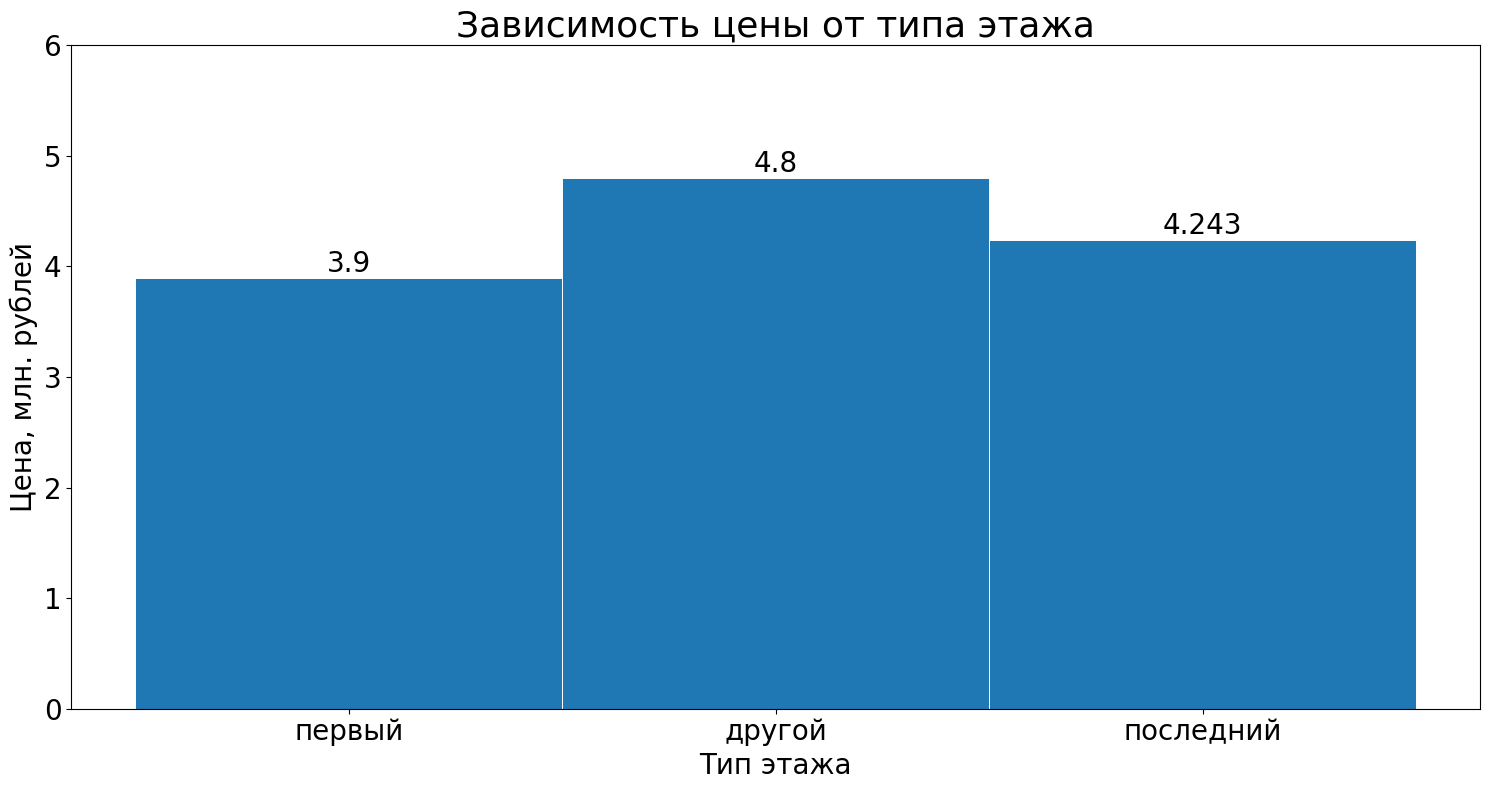

In [232]:
bild_bar(floor_type_influence_price, 'last_price', 'Зависимость цены от типа этажа', 'Тип этажа', y_min=0, y_max=6)

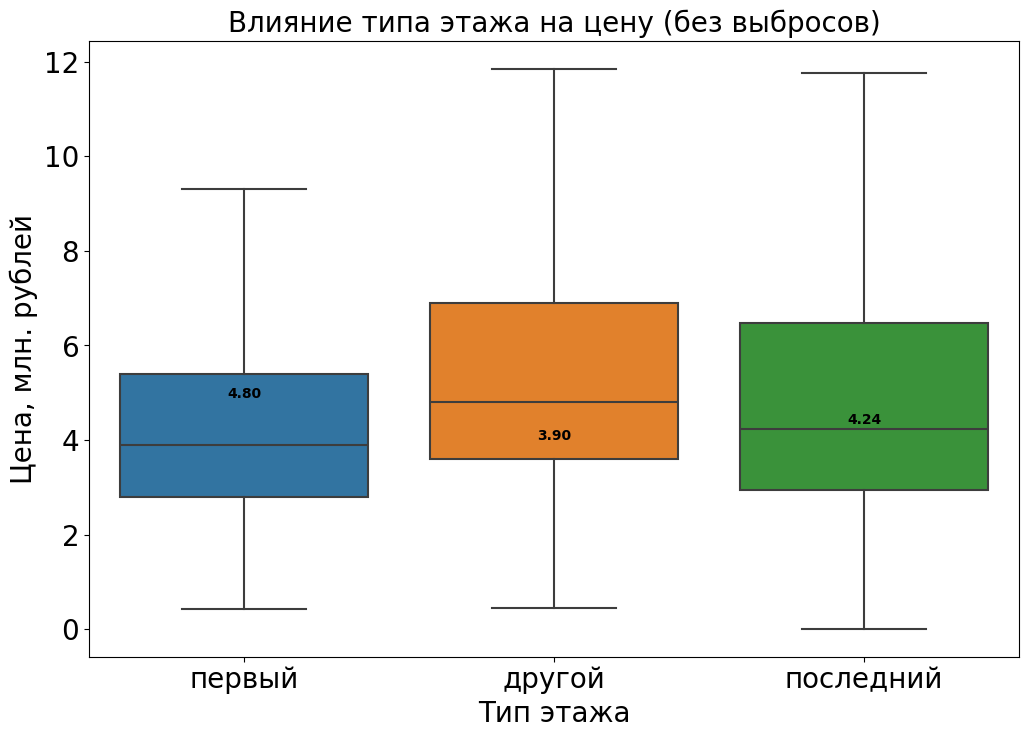

In [233]:
def bild_boxplot_new(df, x_column, y_column, title, x_label, y_label):
    # Создаем ящиковую диаграмму без выбросов
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x=x_column, y=y_column, data=df, order=floor_type_sort, showfliers=False)

    # Рассчитываем медианное значение для каждой категории
    medians = df.groupby(x_column)[y_column].median()

    # Добавляем медианные значения на график с белым текстом
    for i, median_value in enumerate(medians):
        ax.text(i, median_value + 0.1, f'{median_value:.2f}', ha='center', size='medium', color='black', weight='semibold')

    ax.tick_params(axis='x', labelsize=text_size)
    ax.tick_params(axis='y', labelsize=text_size)    
    ax.set_xlabel(x_label, fontsize=text_size)
    ax.set_ylabel(y_label, fontsize=text_size)
    plt.title(title, fontsize=text_size)
    plt.show()

bild_boxplot_new(df, 'floor_type', 'last_price', 'Влияние типа этажа на цену (без выбросов)', 'Тип этажа', 'Цена, млн. рублей')

**Вывод** 
На основании графика можно сделать следующее заключение:
- Медианная стоимость помещений на первых этажах наимньшая. Это может быть связана с тем, вносит ряд неудобств в части проживания, а именно возможность заглядывания в окна.
- Медианная стоимость помещений последнем этаже больше чем для первого этажа, но все же ниже для других этажей. Приемуществом по сравнению с первым этажем, является вид, а минусом по сравнению с остальными этажами это наличие крыши, что в свою очередь настораживает клиентов в части возможных протечек, посторонних шумов и др.
- Наибольшую медианную цену имеют квартиры расположенные не на крайних этажах дома.

##### Влияние дня недели размещения на общую стоимость объекта

Аналогичным путем как в предыдущем подразделе проведем анализ влияния типа этажа на общую стоимость объекта

In [234]:
# Создадим сводную таблицу для столбца publication_weekday
weekday_influence_price = df.pivot_table(
    index='publication_weekday', 
    values='last_price', 
    aggfunc='median'
)
weekday_influence_price

,last_price
publication_weekday,
0,4.60
1,4.70
2,4.65
3,4.60
4,4.55
5,4.50
6,4.50


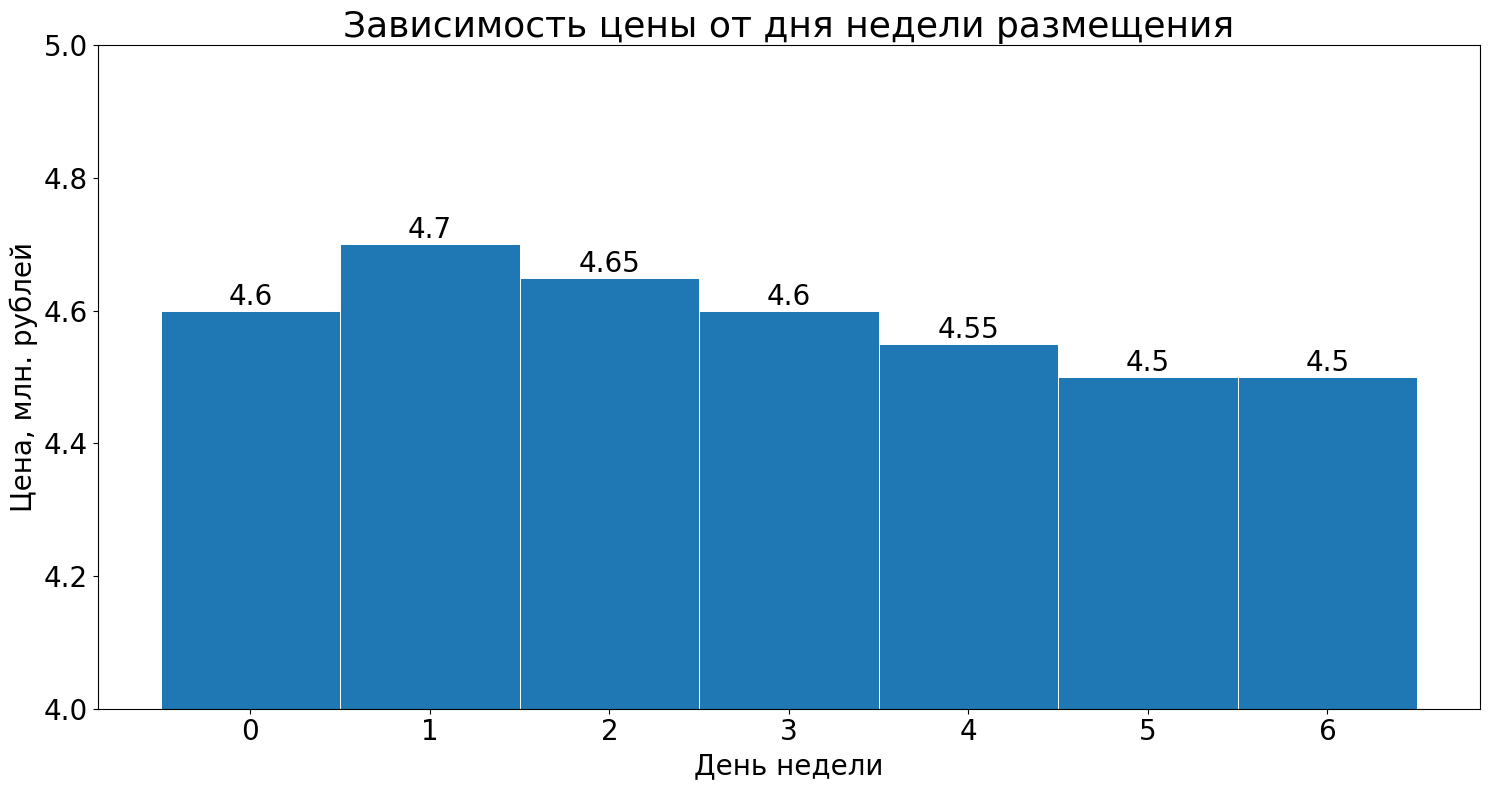

In [235]:
bild_bar(weekday_influence_price, 
         'last_price', 
         'Зависимость цены от дня недели размещения', 
         'День недели', 
         y_min=4, y_max=5
        )

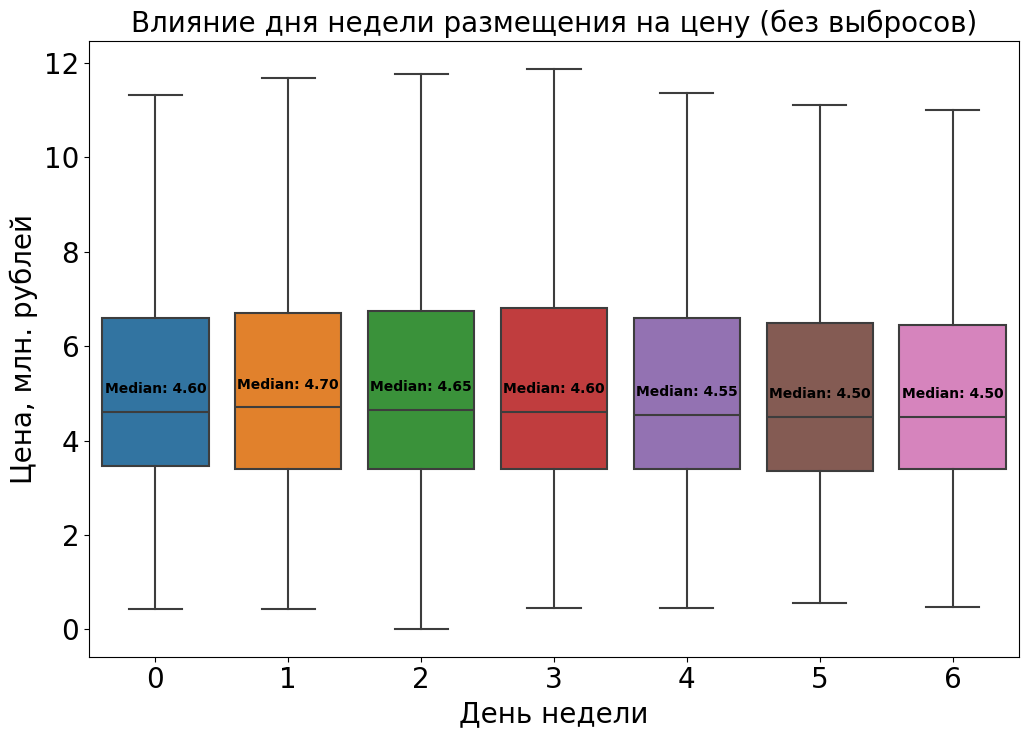

In [236]:
# Создаем ящиковую диаграмму без выбросов
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='publication_weekday', y='last_price', data=df, showfliers=False)

# Рассчитываем медианное значение для каждой категории
medians = df.groupby('publication_weekday')['last_price'].median()

# Добавляем медианные значения на график с белым текстом
for i, median_value in enumerate(medians):
    ax.text(i, median_value + 0.4, f'Median: {median_value:.2f}', ha='center', size='medium', color='black', weight='semibold')

ax.tick_params(axis='x', labelsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)    
ax.set_xlabel('День недели', fontsize=text_size)
ax.set_ylabel('Цена, млн. рублей', fontsize=text_size)
plt.title('Влияние дня недели размещения на цену (без выбросов)', fontsize=text_size)
plt.show()

**Вывод** 
На основании графика можно сделать следующее заключение, что медианное значение цены наибольшая во вторник и с последующим падением в течении остальных дней недели.

##### Влияние месяца размещения на общую стоимость объекта

In [237]:
# Создадим сводную таблицу для столбца publication_month
month_influence_price = df.pivot_table(
    index='publication_month', 
    values='last_price', 
    aggfunc='median'
)
month_influence_price

,last_price
publication_month,
1,4.600
2,4.600
3,4.610
4,4.761
5,4.500
6,4.400
7,4.600
8,4.550
9,4.650


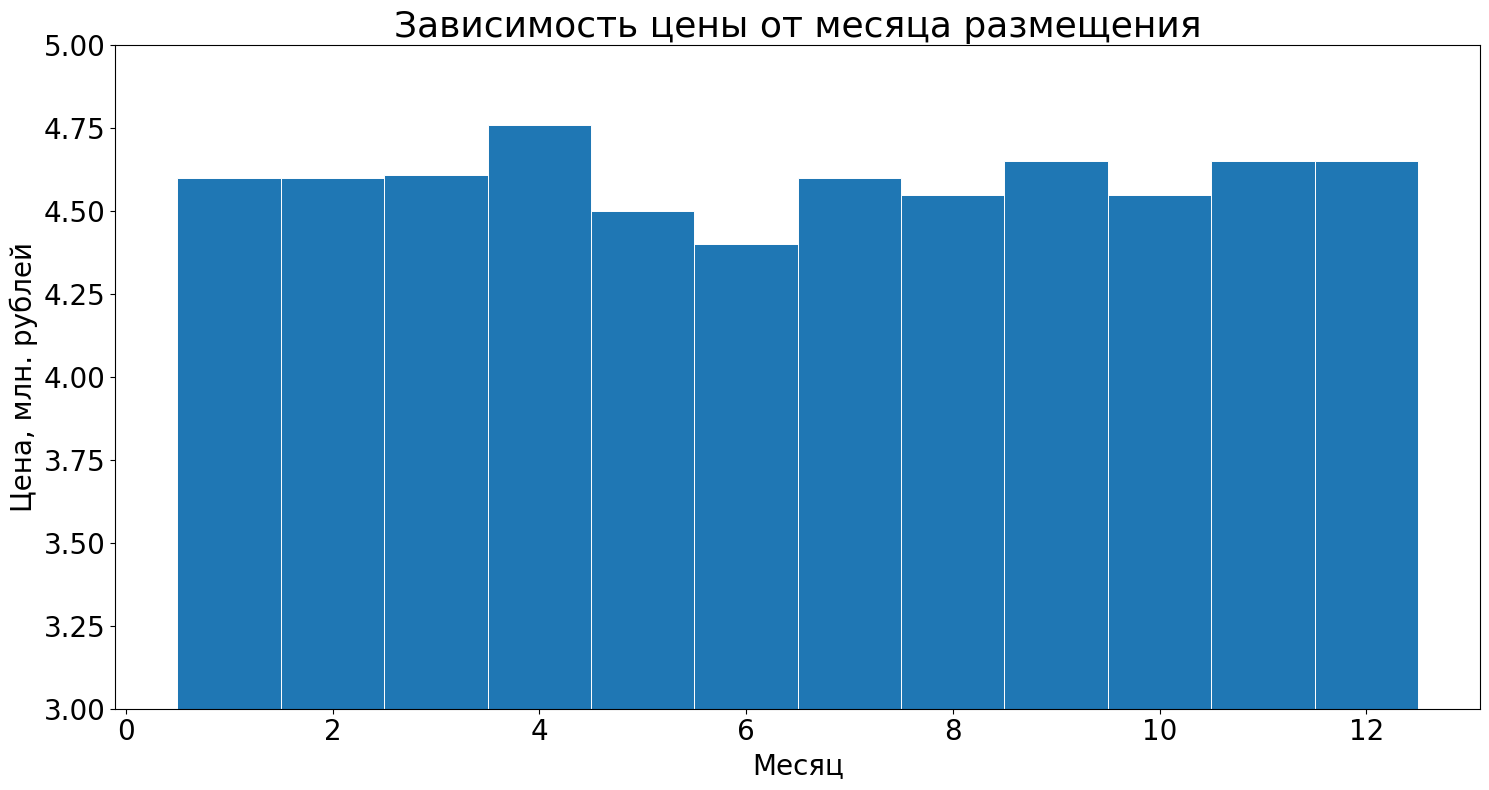

In [238]:
bild_bar(month_influence_price, 
         'last_price', 
         'Зависимость цены от месяца размещения', 
         'Месяц', 
         y_min=3, y_max=5, 
         show_values=False
        )

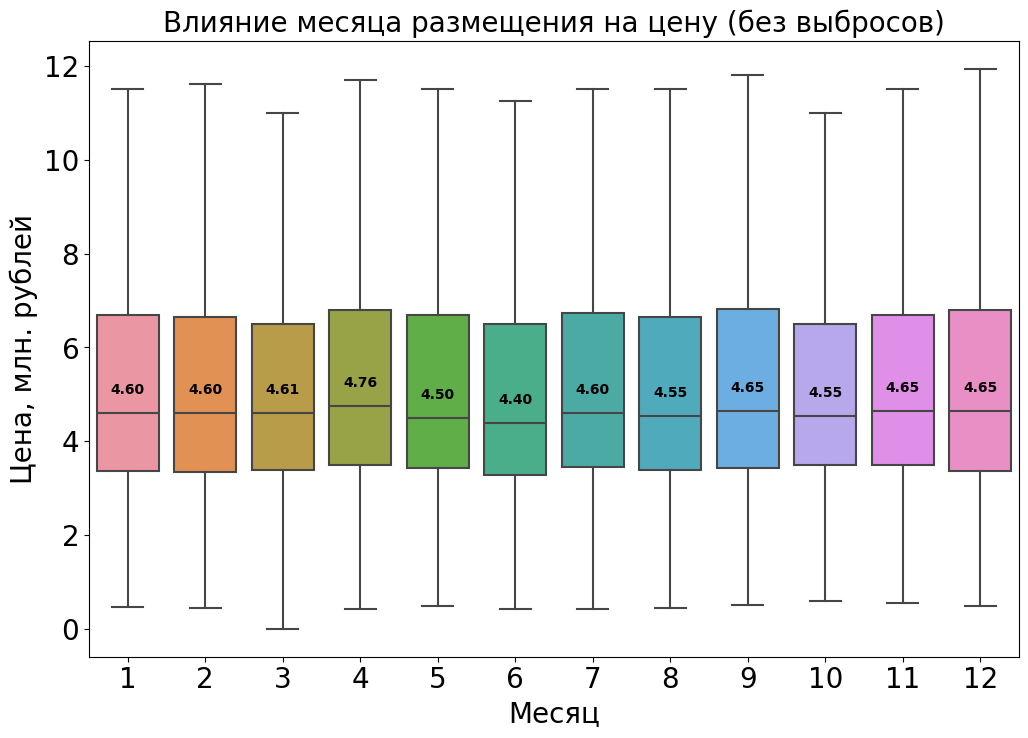

In [239]:
# Создаем ящиковую диаграмму без выбросов
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='publication_month', y='last_price', data=df, showfliers=False)

# Рассчитываем медианное значение для каждой категории
medians = df.groupby('publication_month')['last_price'].median()

# Добавляем медианные значения на график с белым текстом
for i, median_value in enumerate(medians):
    ax.text(i, median_value + 0.4, f'{median_value:.2f}', ha='center', size='medium', color='black', weight='semibold')

ax.tick_params(axis='x', labelsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)    
ax.set_xlabel('Месяц', fontsize=text_size)
ax.set_ylabel('Цена, млн. рублей', fontsize=text_size)
plt.title('Влияние месяца размещения на цену (без выбросов)', fontsize=text_size)
plt.show()

**Вывод** 
На основании графика можно сделать следующее заключение, что месяц публикации не зависит от стоимости жилья, а изменения на графике не значительны. Согласно сводной таблице, медианное значение колеблится от 4 400 000 до 4 600 000. Медианное значение для апреля составляет 4 757 967.5. Необходимо дополнительно проанализировать данные опубликованные в апрелях.

##### Влияние года размещения на общую стоимость объекта

In [240]:
# Создадим сводную таблицу для столбца publication_year
year_influence_price = df.pivot_table(
    index='publication_year', 
    values='last_price', 
    aggfunc='median'
)
year_influence_price

,last_price
publication_year,
2014,7.580
2015,5.215
2016,4.500
2017,4.500
2018,4.550
2019,5.000


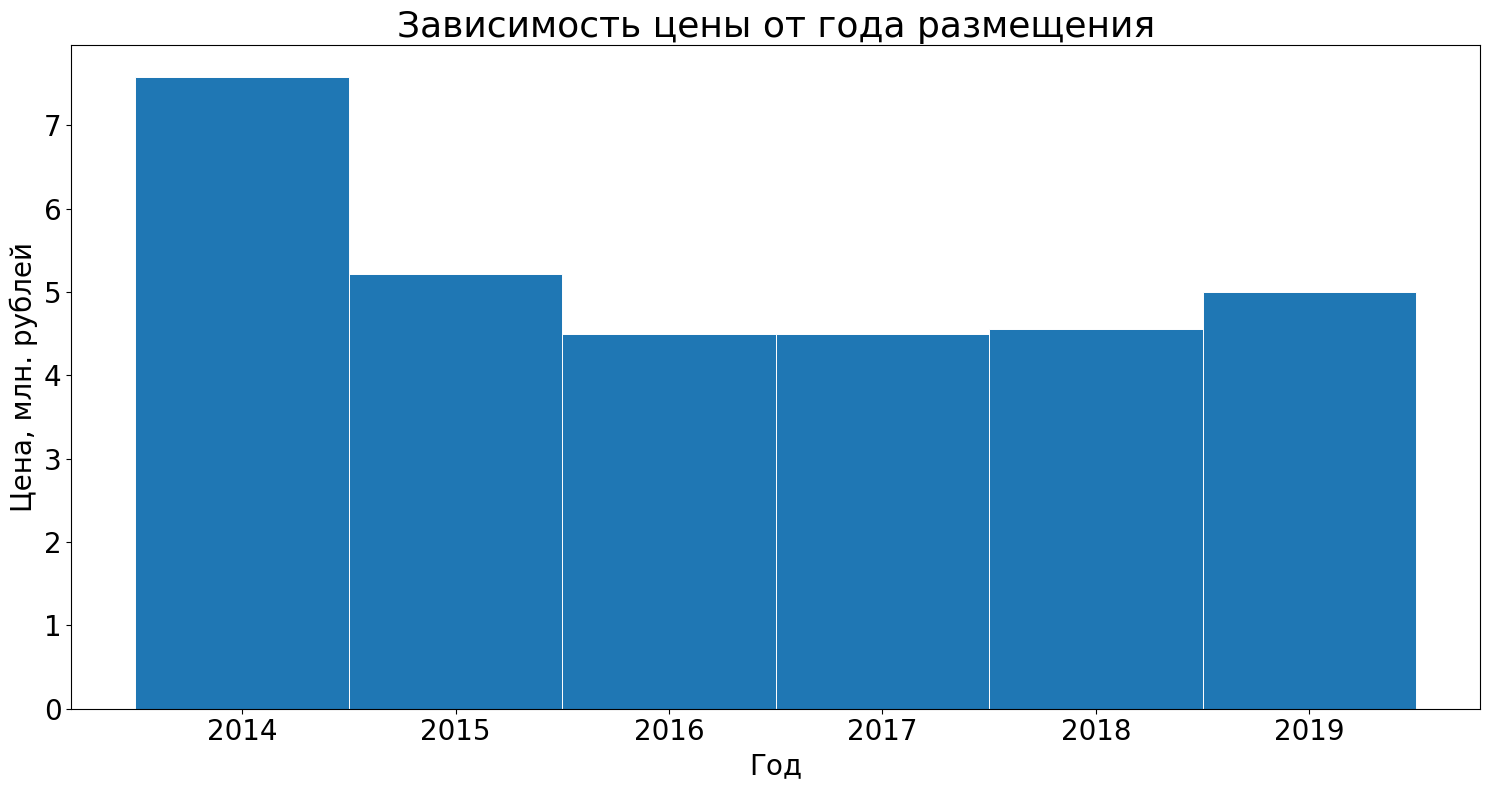

In [241]:
bild_bar(year_influence_price, 
         'last_price', 
         'Зависимость цены от года размещения', 
         'Год',
        show_values=False
        )

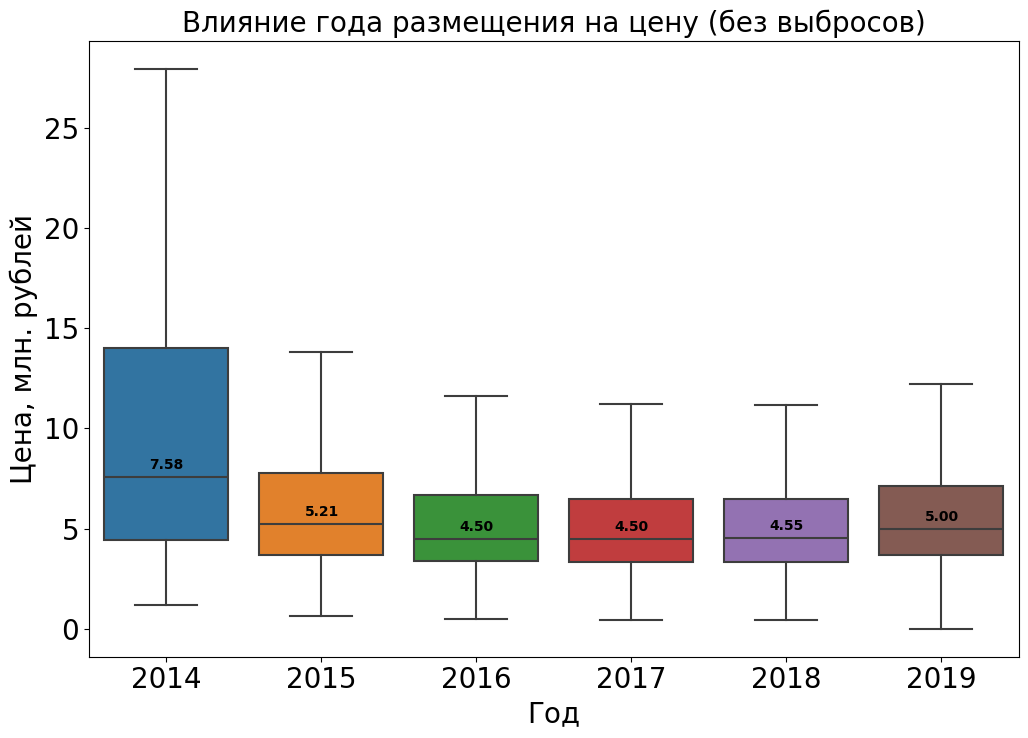

In [242]:
# Создаем ящиковую диаграмму без выбросов
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='publication_year', y='last_price', data=df, showfliers=False)

# Рассчитываем медианное значение для каждой категории
medians = df.groupby('publication_year')['last_price'].median()

# Добавляем медианные значения на график с белым текстом
for i, median_value in enumerate(medians):
    ax.text(i, median_value + 0.4, f'{median_value:.2f}', ha='center', size='medium', color='black', weight='semibold')

ax.tick_params(axis='x', labelsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)    
ax.set_xlabel('Год', fontsize=text_size)
ax.set_ylabel('Цена, млн. рублей', fontsize=text_size)
plt.title('Влияние года размещения на цену (без выбросов)', fontsize=text_size)
plt.show()

**Вывод** На основани графика можно сделать вывод, что с 2014 по 2016 медианная цена падала, после держалась на постоянном уровне и только начиная с 2019 года начала расти. Одной из причины такого поведения может быть связаны с событиями в 2014 году возникшие в экономике страны после возращения Крыма в состав РФ.

#### Поиск населённых пунктов с самой высокой и низкой стоимостью квадратного метра

In [243]:
# Выбираем 10 населённых пунктов с наибольшим числом объявлений
top_localities = df['locality_name'].value_counts().head(10).index

# Создаем DataFrame с данными только по этим населённым пунктам
top_localities_df = df[df['locality_name'].isin(top_localities)]

# Рассчитываем среднюю цену за квадратный метр для каждого населённого пункта
avg_price_sqm = top_localities_df.groupby('locality_name')['price_sqm'].mean()

# Определяем населённые пункты с самой высокой и низкой стоимостью квадратного метра
highest_price_locality = avg_price_sqm.idxmax()
lowest_price_locality = avg_price_sqm.idxmin()

# Выводим результаты
print(f"Средняя цена за квадратный метр в 10 населённых пунктах:")
print(avg_price_sqm.sort_values(ascending=False))


print(f"\nНаселённый пункт с самой высокой стоимостью квадратного метра: {highest_price_locality}")
print(f"Наcелённый пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality}")

Средняя цена за квадратный метр в 10 населённых пунктах:
locality_name
Санкт-Петербург      0.113198
Пушкин               0.103122
деревня Кудрово      0.092315
поселок Парголово    0.090613
поселок Мурино       0.085802
поселок Шушары       0.078934
Колпино              0.075282
Гатчина              0.068954
Всеволожск           0.068841
Выборг               0.058128
Name: price_sqm, dtype: float64

Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Наcелённый пункт с самой низкой стоимостью квадратного метра: Выборг


#### Средняя цена каждого километра от центра города по отношению к стоимостью помещения

In [244]:
# Выделяем квартиры в Санкт-Петербурге
spb_apartments = df[df['locality_name'] == 'Санкт-Петербург']

# Рассчитываем среднюю цену для каждого километра
avg_price_per_km = spb_apartments.groupby('city_centers_nearest')['last_price'].mean()

# Отображаем результаты
avg_price_per_km

city_centers_nearest
0.18     31.099
0.21      5.800
0.22     10.990
0.29     10.545
0.32     43.829
          ...  
28.81     4.370
29.26     4.850
29.34     4.200
29.49     2.450
31.90     3.500
Name: last_price, Length: 1914, dtype: float64

Построим график

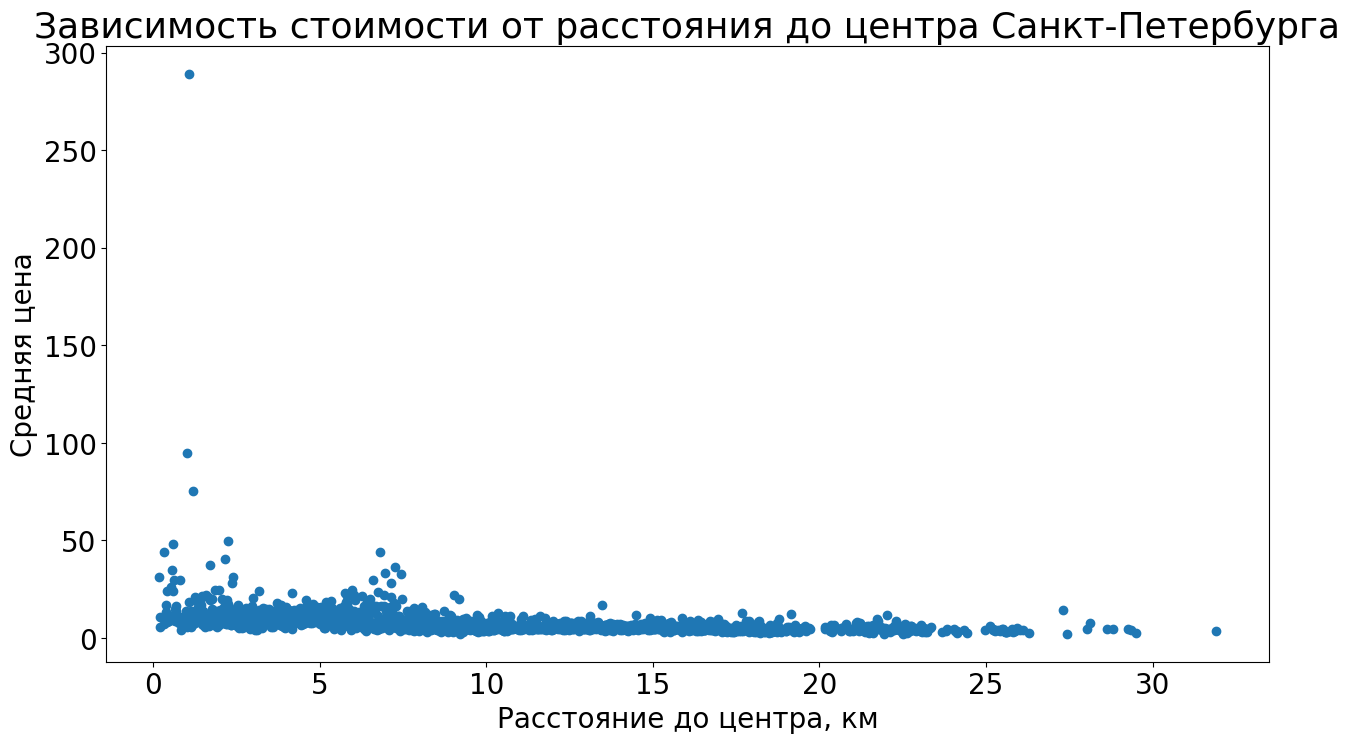

In [245]:
# Создадим фигуру, а также зададим размер графика (15 дюймов в ширину и 8 дюймов в высоту)
fig, ax = plt.subplots(figsize=(15, 8))
        
# Построим график
ax.scatter(avg_price_per_km.index, avg_price_per_km.values)
        
# Зададим название графика и определим размера шрифта
ax.set_title('Зависимость стоимости от расстояния до центра Санкт-Петербурга', fontsize=26)
        
# Определим названия осей
ax.set_xlabel('Расстояние до центра, км', fontsize=text_size)
ax.set_ylabel('Средняя цена', fontsize=text_size)
    
# Определим размер шрифта для подписей делений оси X и оси Y
ax.tick_params(axis='x', labelsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)

plt.show()

In [246]:
# Создание среза по двум параметрам
filtered_avg_price_per_km = df.query('last_price < 18000000')

In [247]:
# Выделяем квартиры в Санкт-Петербурге
spb_apartments = filtered_avg_price_per_km[filtered_avg_price_per_km['locality_name'] == 'Санкт-Петербург']

# Рассчитываем среднюю цену для каждого километра
avg_price_per_km = spb_apartments.groupby('city_centers_nearest')['last_price'].mean()

# Отображаем результаты
avg_price_per_km

city_centers_nearest
0.18     31.099
0.21      5.800
0.22     10.990
0.29     10.545
0.32     43.829
          ...  
28.81     4.370
29.26     4.850
29.34     4.200
29.49     2.450
31.90     3.500
Name: last_price, Length: 1914, dtype: float64

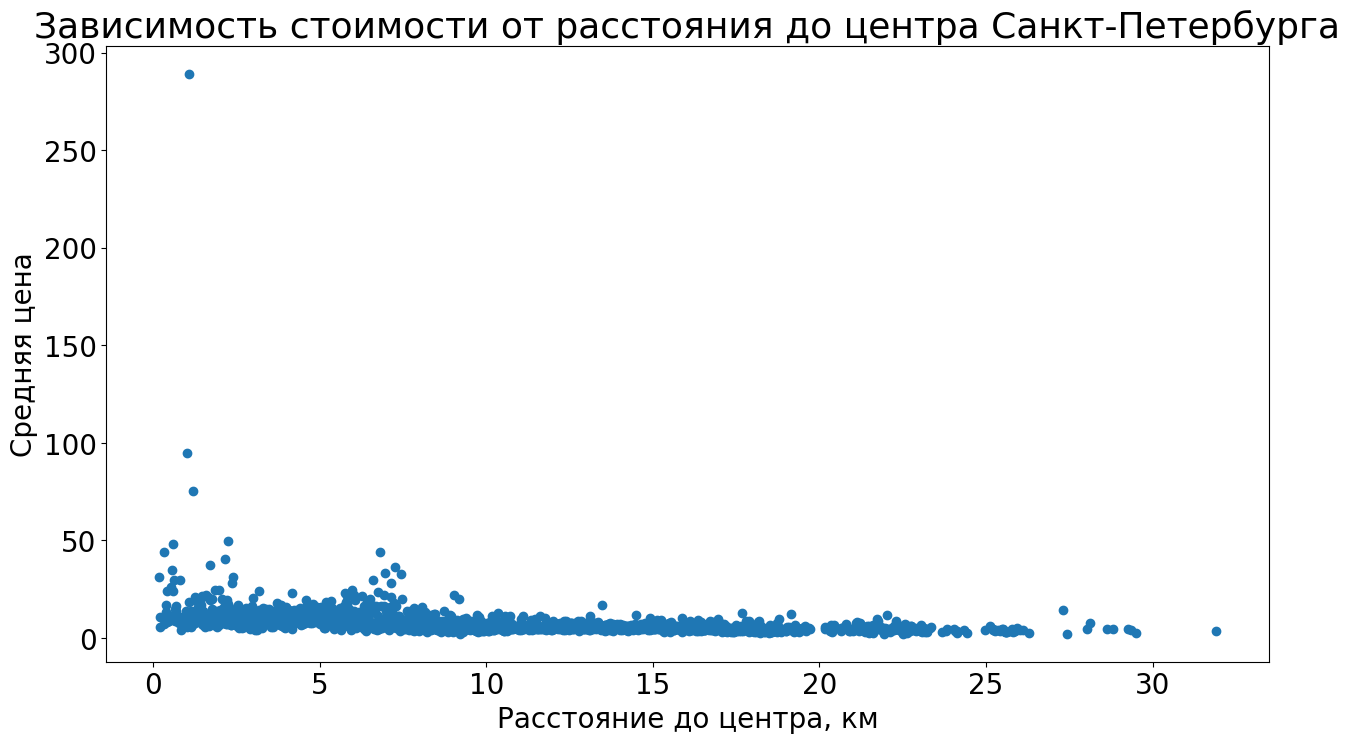

In [248]:
# Создадим фигуру, а также зададим размер графика (15 дюймов в ширину и 8 дюймов в высоту)
fig, ax = plt.subplots(figsize=(15, 8))
        
# Построим график
ax.scatter(avg_price_per_km.index, avg_price_per_km.values)
        
# Зададим название графика и определим размера шрифта
ax.set_title('Зависимость стоимости от расстояния до центра Санкт-Петербурга', fontsize=26)
        
# Определим названия осей
ax.set_xlabel('Расстояние до центра, км', fontsize=text_size)
ax.set_ylabel('Средняя цена', fontsize=text_size)
    
# Определим размер шрифта для подписей делений оси X и оси Y
ax.tick_params(axis='x', labelsize=text_size)
ax.tick_params(axis='y', labelsize=text_size)

plt.show()

In [249]:
print(f"Коэффициент корреляции Пирсона: {np.corrcoef(avg_price_per_km.index, avg_price_per_km.values)[0, 1]}")

Коэффициент корреляции Пирсона: -0.3409026463083373


**Вывод** На основании первого графика разброса (scatter), определили зависимость конечной стоимостью от расстояния до центра города, но также обнаружили и большое количество выбросов, отфильтровав (избавившись от выбросов) и построив вновь графика разброса, определили прямую отрицательную корреляцию этих двух параметров, коэффицент корреляции составил -0.64 Также на основании графика разброса можно сделать вывод, что чем ближе дом к центру города тем больше цена 1 километра, а также с увеличением расстояниие разброс цены уменьшается.

На основании коэффицента корреляции в -0.64 можно предположить, что на итоговую стоимость влияют и другие не учтенные факторы.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 4 "ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ":**
В данном разделе были описаны ряд параметров, а именно:
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолка
- этаж квартиры
- тпи этажа квартиры
- общее количество этажей в дома
- расстояние до центра города
- расстояние до ближайшего города
- расстояние до ближайшего парка
- день и месяц опубликования объявление

Для всех вышеперечисленных данных были построены гистограммы и вычесленные основные статистические данные, и на основании этих метрик были сделаны выводы.

Далее определены влияния различных факторов на общую стоимость объектов, а именно влияние следующих факторов:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- тип этажа
- время (день недели, месяц и год) размещения

Из всех перечисленных факторов наибольшую (сильную положительную) прямую корреляцию по отношению к стоимость помещения имеет общая площадь. Также была предложена причина падения стоимость с годами. Также была определено, что большинство факторов имеют прямую корреляцию с разной силой со стоимостью жилья. А также, что наибольшую цену имеют помещения расположенные не на первом и последнем этаже.

В ходе исследований из числа лидеров по представленным объявлений были определены населенные пункты с самой высокой и низкой стоимостью жилья, а именно город Санкт-Петербург и город Выборг соответственно.

В конце была определена средняя цена каждого километра от центра города по отношению к стоимости помещения.

Более подробные выводы по каждому пункту представлены в соответствующий подразделах 4 раздела.

### Общий вывод

В результате проведенного исследовательского анализа данных были выявлены основные характеристики и закономерности рынка недвижимости в Санкт-Петербурге и соседних населенных пунктах. Вот основные выводы:

1. **Общий обзор данных:**
   - Данные содержат информацию о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.
   - Обнаружены пропуски в данных и аномалии, которые были подвергнуты обработке.

2. **Заполнение пропусков и предобработка данных:**
   - Пропуски в данных были обработаны в соответствии с характером информации и возможностью замены.
   - Типы данных были изменены для улучшения точности анализа.
   - Дубликаты в названиях населенных пунктов были удалены.

3. **Исследование параметров:**
   - Проведено исследование основных параметров, таких как общая площадь, цена, количество комнат и другие.
   - Определено влияние различных факторов на стоимость жилья.

4. **Выводы:**
   - Наибольшую положительную корреляцию с ценой имеет общая площадь жилья.
   - Квартиры, расположенные не на первом и не на последнем этаже, имеют более высокую стоимость.
   - Средняя цена за квадратный метр уменьшается с удалением от центра города.

5. **Выводы по населенным пунктам:**
   - Санкт-Петербург является лидером по числу объявлений и имеет самые высокие цены на жилье.
   - Выборг выделяется как населенный пункт с наименьшими ценами.

6. **Выводы по времени размещения объявлений:**
   - Выделены дни недели и месяцы, когда наиболее активно размещаются объявления о продаже недвижимости.

7. **Общий вывод:**
   - Проведен анализ ключевых параметров рынка недвижимости, что позволяет понять влияние различных факторов на стоимость жилья в Санкт-Петербурге и близлежащих населенных пунктах.

Эти выводы могут быть использованы для более глубокого понимания рынка недвижимости и принятия обоснованных решений при покупке или продаже жилья, а также для создания моделей прогноза стоимости жилья.

**Рекомендации заказчику:**
В первую очередь необходимо внедрения дополнительной функции для определения факта продажи квартиры, например: при удалении с сайта объявлений уточнить у пользователя причину удаления. Также внедрить оповещение для пользователей чье объявления долгое время находятся на сайте. 

Необходимо внедрить дополнительные параметры, а именно близость к жд станциям и метро, а также наличия коммерческий помещений, паркинга, количества сан-узлов, категории видов из окон, количество квартир на этаже, наличие пандусов и наличие и количество лифтов, год постройки и тип постройки.

Вместо рукописного ввода названия населеного пункта внедрить список с стандартизированными названиями.

Для минимизирования пропущенных данных использовать автоматическое заполнение данных при их отсутствии.